In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
np.random.seed(42)

## Load data



In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

## Initial data exploration




In [ ]:
df.info()
display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top                August                       NaN   
freq                13877                       NaN   
mean                  NaN                 27.165173   
std                   NaN                 13.605138   
min                   NaN                  1.000000   
25%                   NaN                 16.000000   
50%                   NaN                 28.000000   
75%                   NaN                 38.000000   
max                   NaN                 53.000000   

        arrival_date_day_of_month  stays_in_weekend_nights  \
count               119390.000000            119390.000000   
unique                        NaN                      NaN   
top                           NaN                      NaN   
freq                          NaN                      NaN   
mean                    15.798241                 0.927599   
std                      8.780829                 0.998613   
min                      1.000000                 0.000000   
25%                      8.000000                 0.000000   
50%                     16.000000                 1.000000   
75%                     23.000000                 2.000000   
max                     31.000000                19.000000   

        stays_in_week_nights         adults  ...  deposit_type          agent  \
count          119390.000000  119390.000000  ...        119390  103050.000000   
unique                   NaN            NaN  ...             3            NaN   
top                      NaN            NaN  ...    No Deposit            NaN   
freq                     NaN            NaN  ...        104641            NaN   
mean                2.500302       1.856403  ...           NaN      86.693382   
std                 1.908286       0.579261  ...           NaN     110.774548   
min                 0.000000       0.000000  ...           NaN       1.000000   
25%                 1.000000       2.000000  ...           NaN       9.000000   
50%                 2.000000       2.000000  ...           NaN      14.000000   
75%                 3.000000       2.000000  ...           NaN     229.000000   
max                50.000000      55.000000  ...           NaN     535.000000   

            company days_in_waiting_list customer_type            adr  \
count   6797.000000        119390.000000        119390  119390.000000   
unique          NaN                  NaN             4            NaN   
top             NaN                  NaN     Transient            NaN   
freq            NaN                  NaN         89613            NaN   
mean     189.266735             2.321149           NaN     101.831122   
std      131.655015            17.594721           NaN      50.535790   
min        6.000000             0.000000           NaN      -6.380000   
25%       62.000000             0.000000           NaN      69.290000   
50%      179.000000             0.000000           NaN      94.575000   
75%      270.000000             0.000000           

## split columns


In [ ]:
continuous_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].nunique() < 50:
        categorical_cols.append(col)
    else:
        continuous_cols.append(col)

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

Categorical Columns: ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']
Continuous Columns: ['lead_time', 'arrival_date_week_number', 'country', 'previous_bookings_not_canceled', 'agent', 'company', 'days_in_waiting_list', 'adr', 'reservation_status_date']


## Display feature lists



In [ ]:
print("Continuous Columns:", continuous_cols)
print("Categorical Columns:", categorical_cols)

Continuous Columns: ['lead_time', 'arrival_date_week_number', 'country', 'previous_bookings_not_canceled', 'agent', 'company', 'days_in_waiting_list', 'adr', 'reservation_status_date']
Categorical Columns: ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status']


## Univariate eda for continuous columns


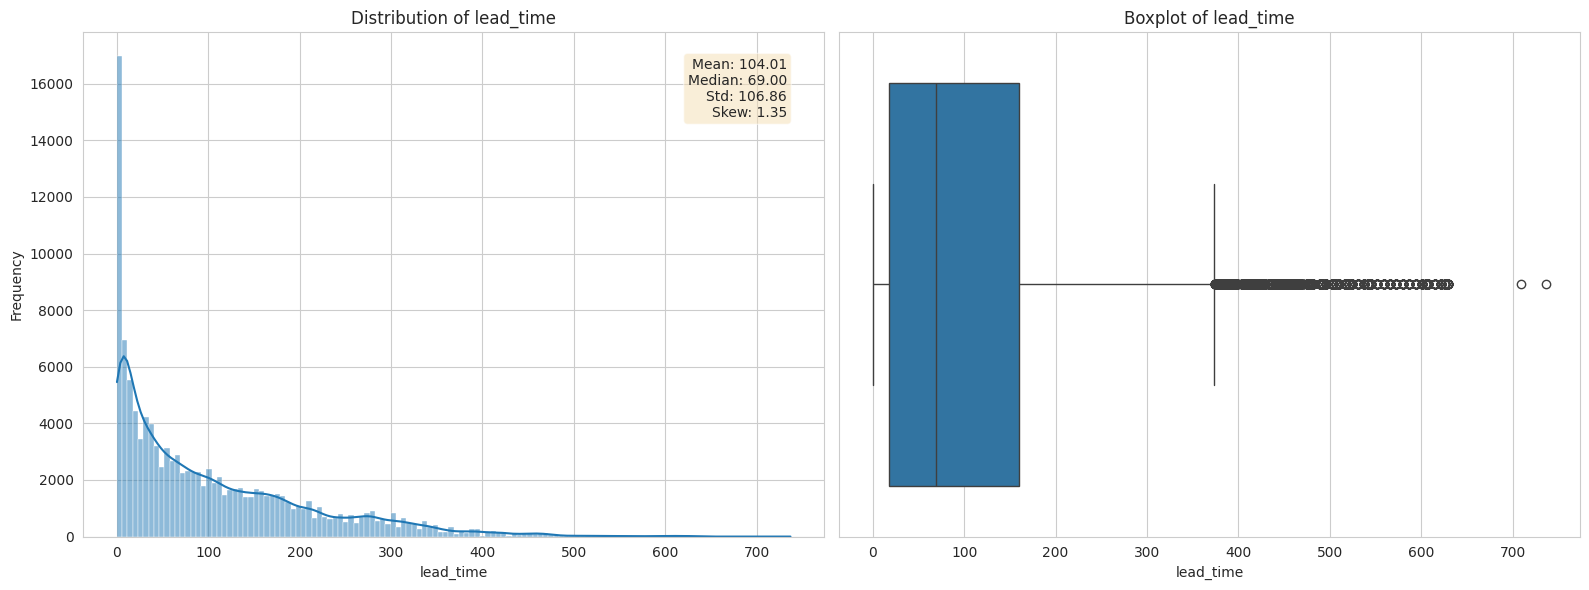

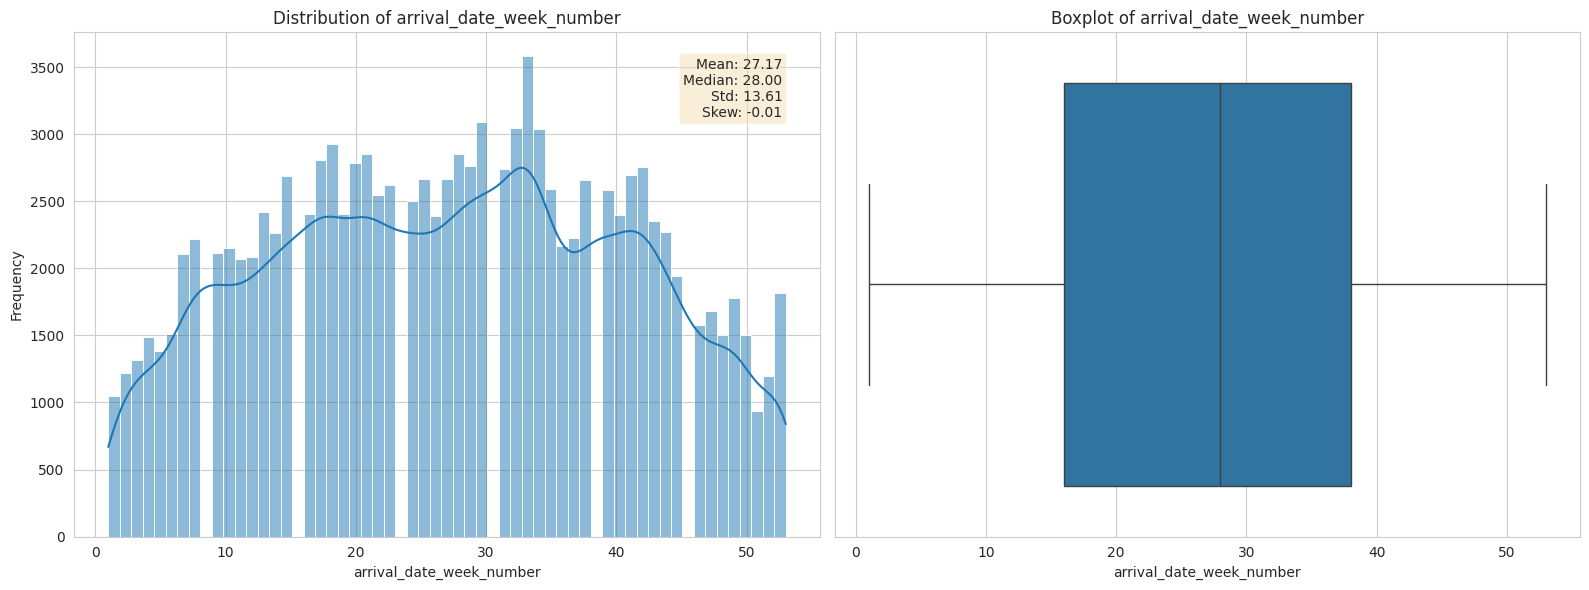

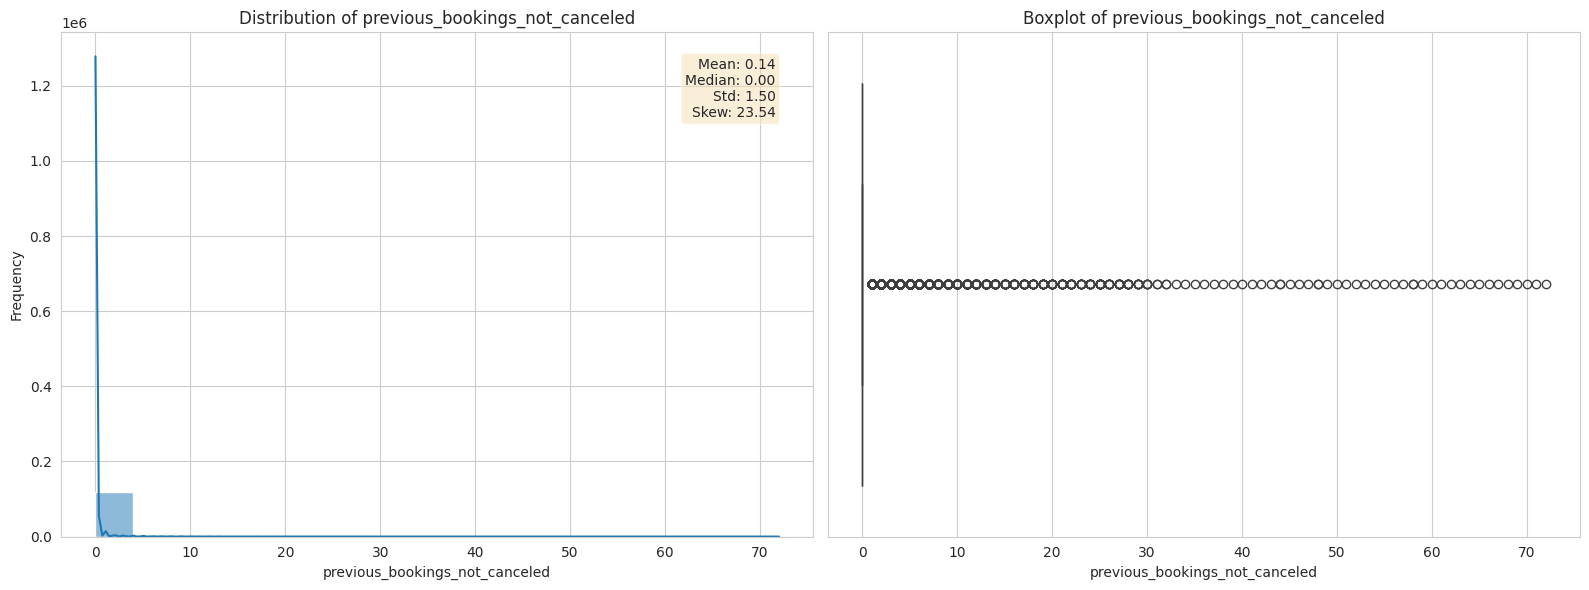

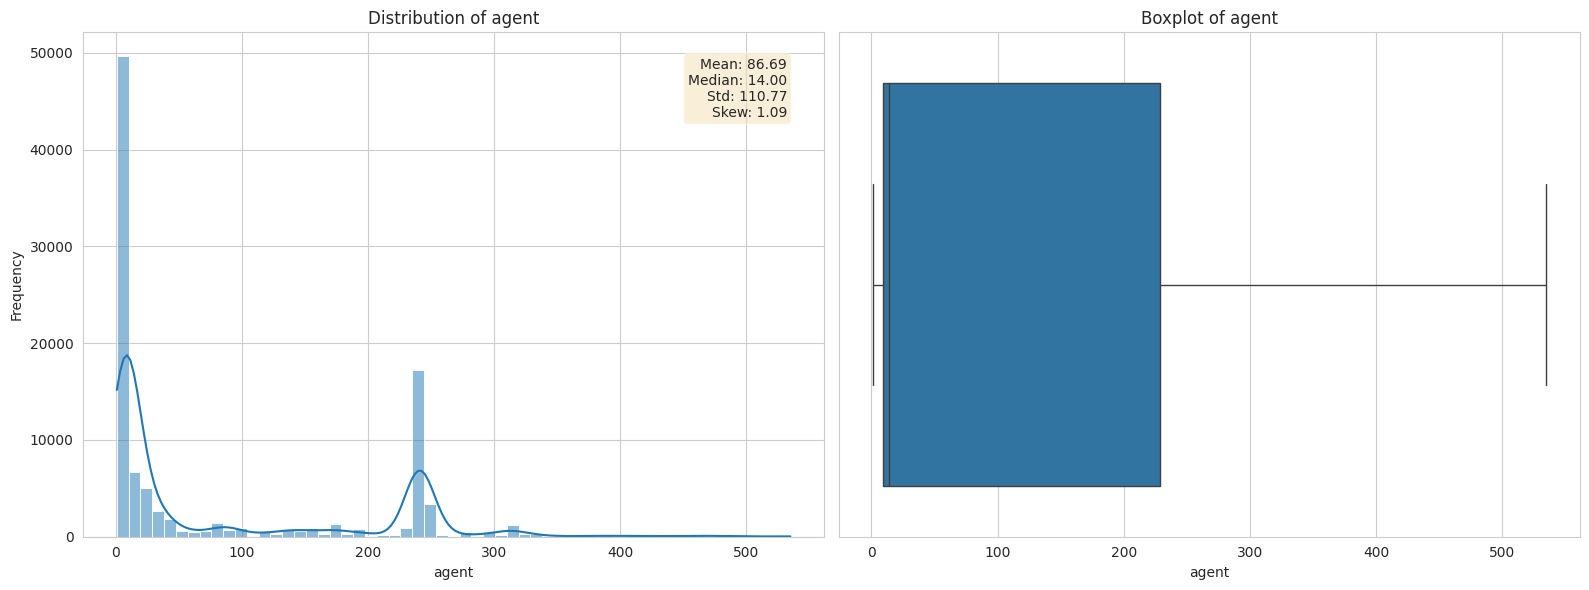

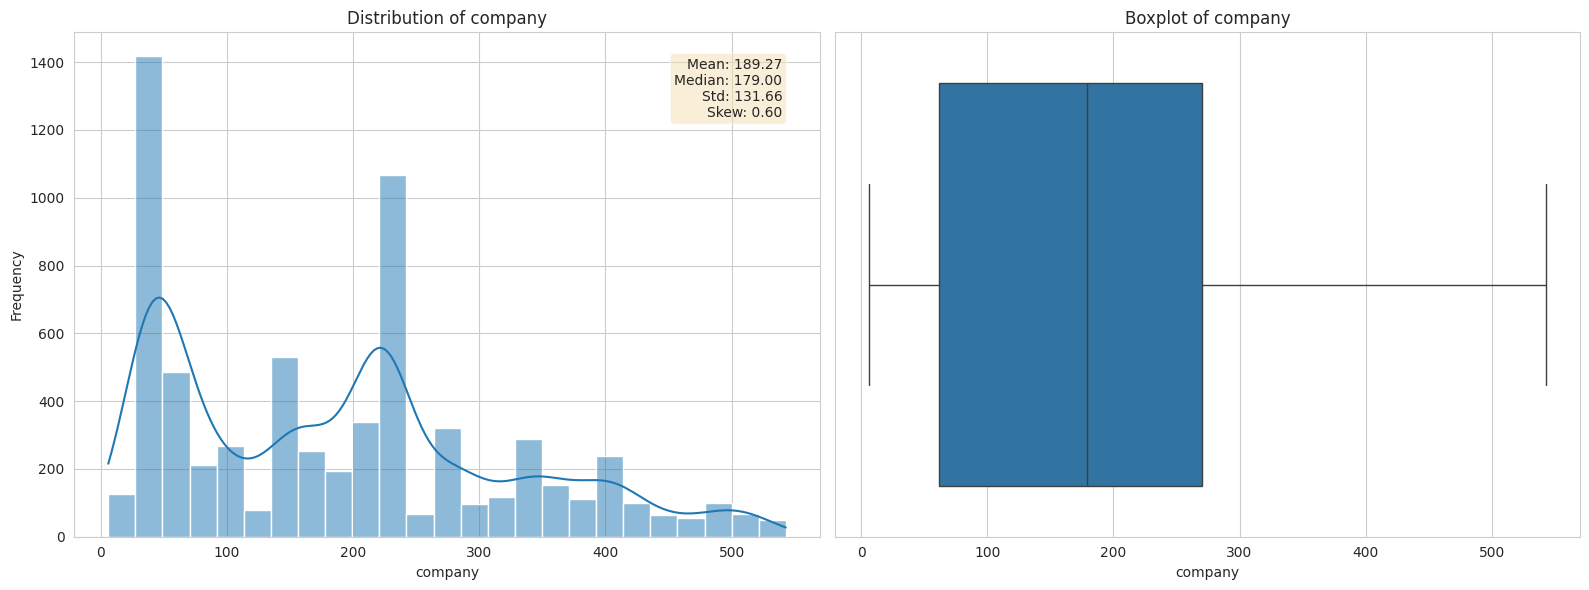

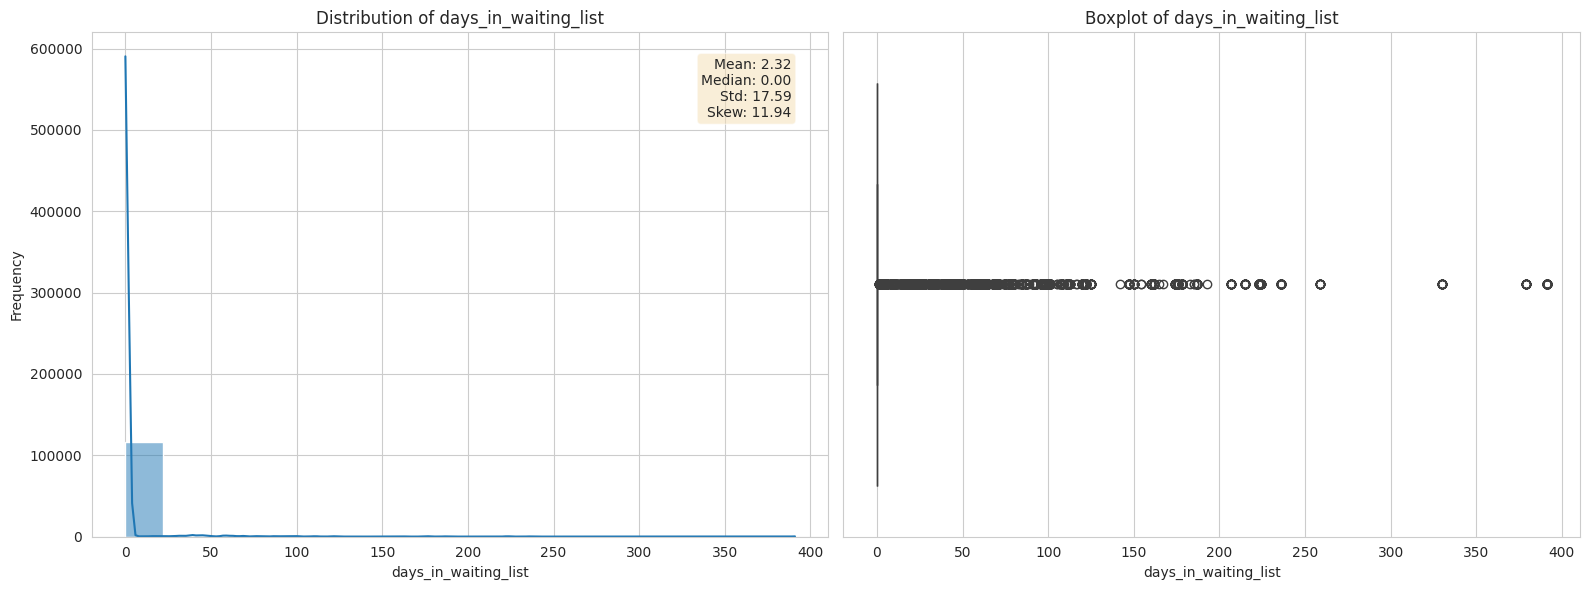

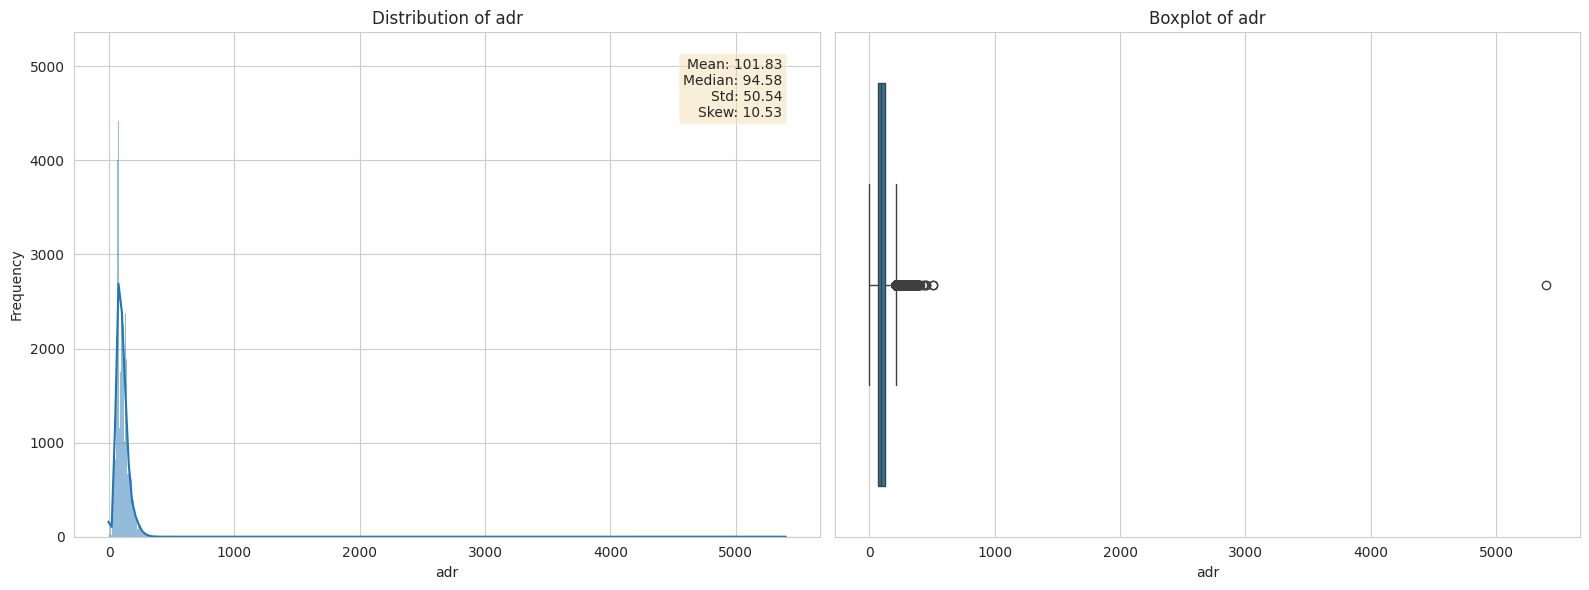

In [ ]:
def plot_continuous_features(df, continuous_cols):
    for col in continuous_cols:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))

            # Histogram with KDE
            sns.histplot(data=df, x=col, kde=True, ax=axes[0])
            axes[0].set_title(f'Distribution of {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')

            # Calculate and annotate statistics
            mean_val = df[col].mean()
            median_val = df[col].median()
            std_val = df[col].std()
            skew_val = df[col].skew()

            textstr = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}'
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            axes[0].text(0.95, 0.95, textstr, transform=axes[0].transAxes, fontsize=10,
                    verticalalignment='top', horizontalalignment='right', bbox=props)

            # Boxplot
            sns.boxplot(data=df, x=col, ax=axes[1])
            axes[1].set_title(f'Boxplot of {col}')
            axes[1].set_xlabel(col)

            plt.tight_layout()
            plt.show()

plot_continuous_features(df, continuous_cols)

## Univariate eda for categorical columns



Column: hotel
Cardinality: 2

Top 10 Categories:


Count  Percentage (%)
hotel                              
City Hotel    79330           66.45
Resort Hotel  40060           33.55

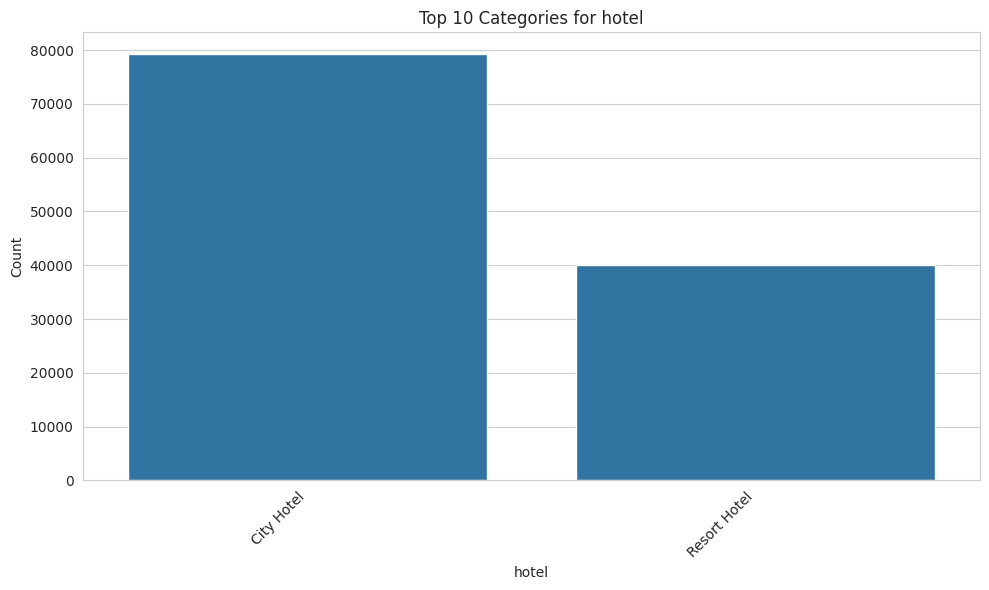

Column: is_canceled
Cardinality: 2

Top 10 Categories:


Count  Percentage (%)
is_canceled                       
0            75166           62.96
1            44224           37.04

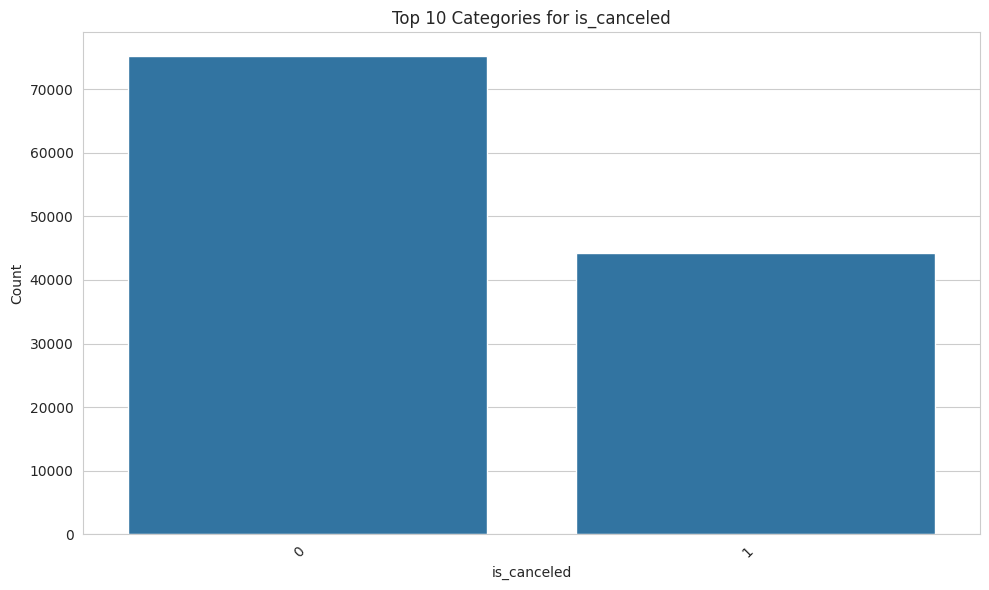

Column: arrival_date_year
Cardinality: 3

Top 10 Categories:


Count  Percentage (%)
arrival_date_year                       
2016               56707           47.50
2017               40687           34.08
2015               21996           18.42

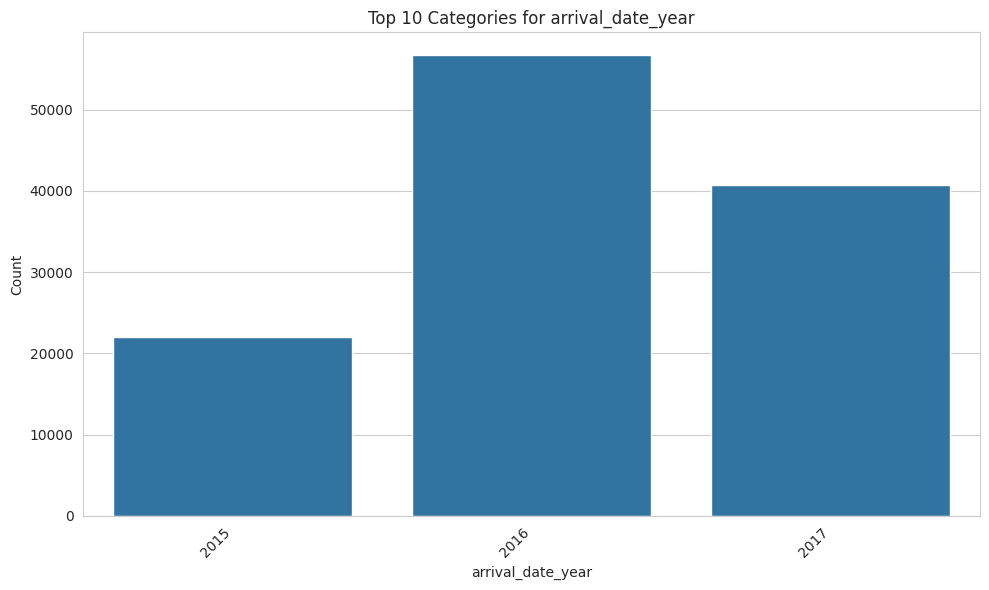

Column: arrival_date_month
Cardinality: 12

Top 10 Categories:


Count  Percentage (%)
arrival_date_month                       
August              13877           11.62
July                12661           10.60
May                 11791            9.88
October             11160            9.35
April               11089            9.29
June                10939            9.16
September           10508            8.80
March                9794            8.20
February             8068            6.76
November             6794            5.69

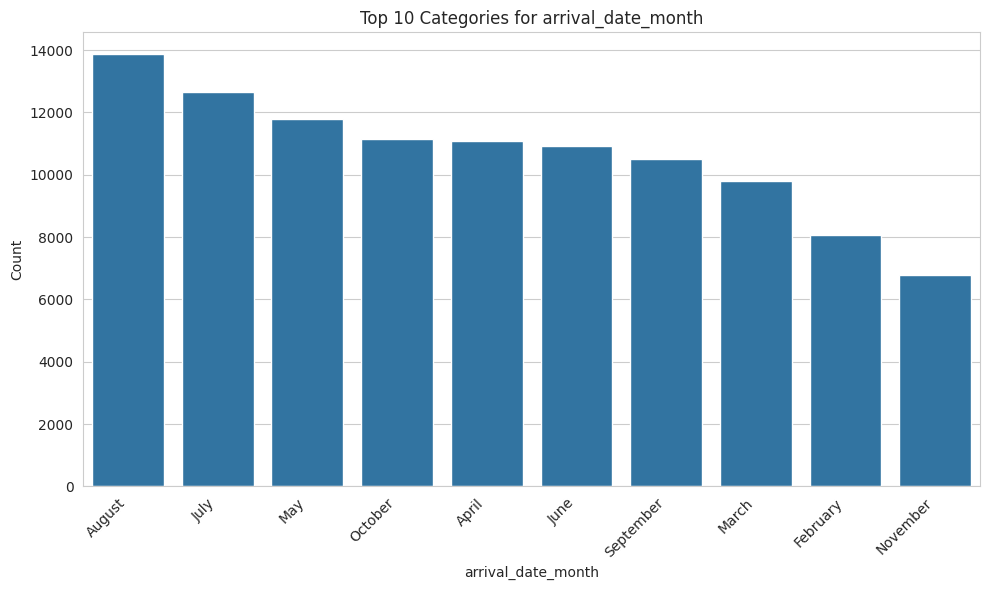

Column: arrival_date_day_of_month
Cardinality: 31

Top 10 Categories:


Count  Percentage (%)
arrival_date_day_of_month                       
17                          4406            3.69
5                           4317            3.62
15                          4196            3.51
25                          4160            3.48
26                          4147            3.47
9                           4096            3.43
12                          4087            3.42
16                          4078            3.42
2                           4055            3.40
19                          4052            3.39

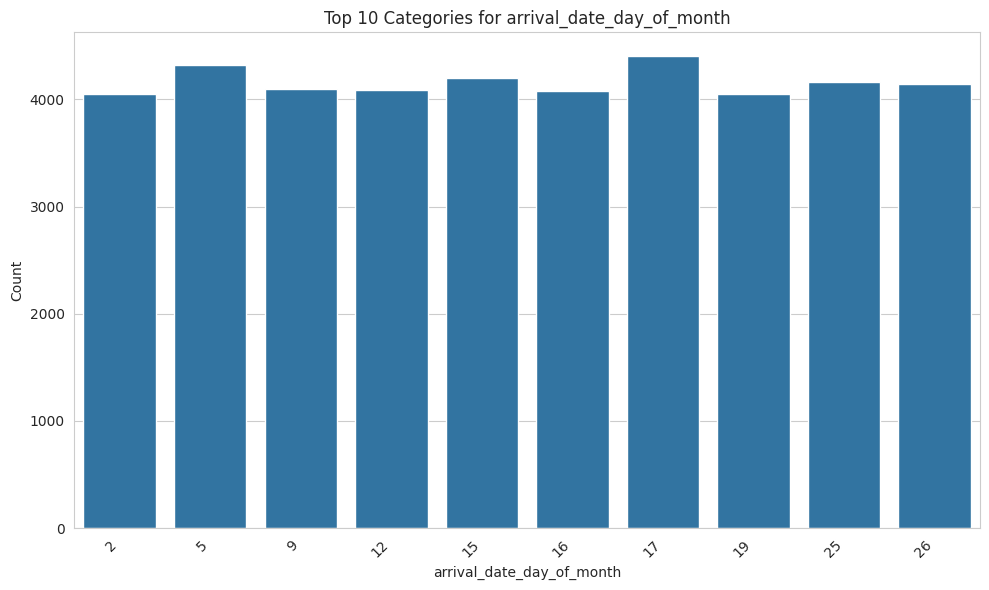

Column: stays_in_weekend_nights
Cardinality: 17

Top 10 Categories:


Count  Percentage (%)
stays_in_weekend_nights                       
0                        51998           43.55
2                        33308           27.90
1                        30626           25.65
4                         1855            1.55
3                         1259            1.05
6                          153            0.13
5                           79            0.07
8                           60            0.05
7                           19            0.02
9                           11            0.01

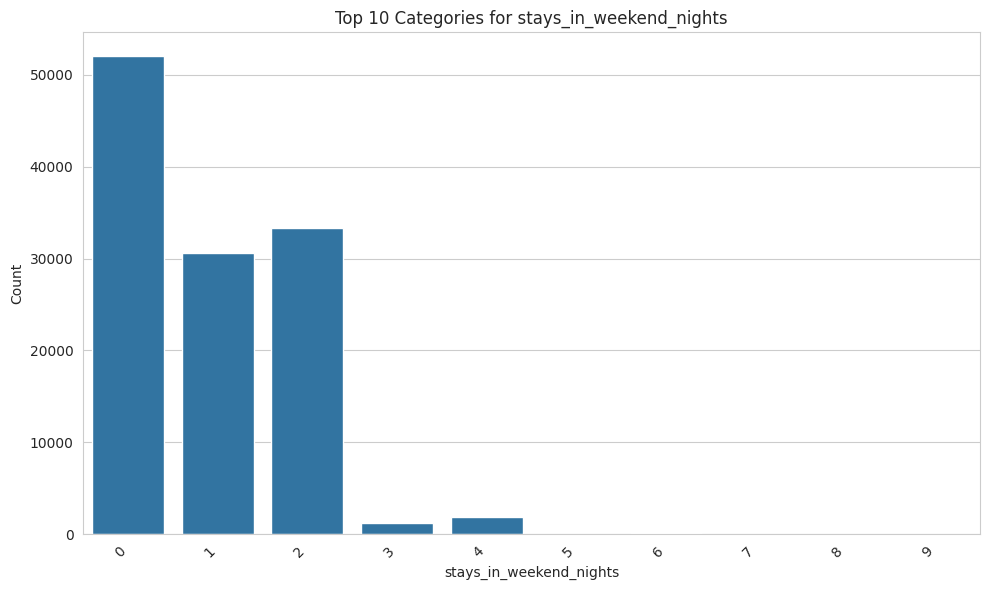

Column: stays_in_week_nights
Cardinality: 35

Top 10 Categories:


Count  Percentage (%)
stays_in_week_nights                       
2                     33684           28.21
1                     30310           25.39
3                     22258           18.64
5                     11077            9.28
4                      9563            8.01
0                      7645            6.40
6                      1499            1.26
10                     1036            0.87
7                      1029            0.86
8                       656            0.55

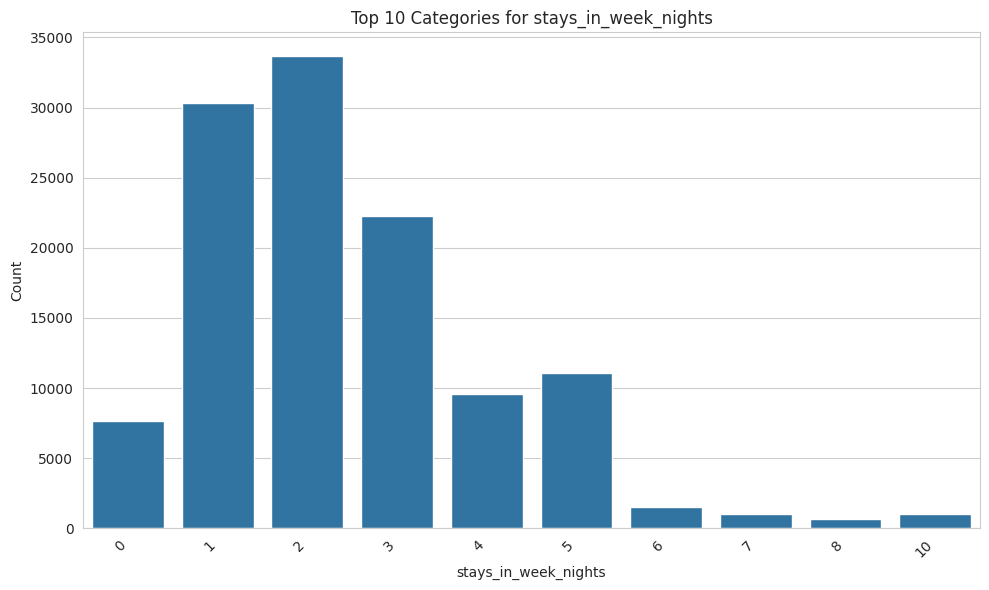

Column: adults
Cardinality: 14

Top 10 Categories:


Count  Percentage (%)
adults                       
2       89680           75.12
1       23027           19.29
3        6202            5.19
0         403            0.34
4          62            0.05
26          5            0.00
5           2            0.00
27          2            0.00
20          2            0.00
40          1            0.00

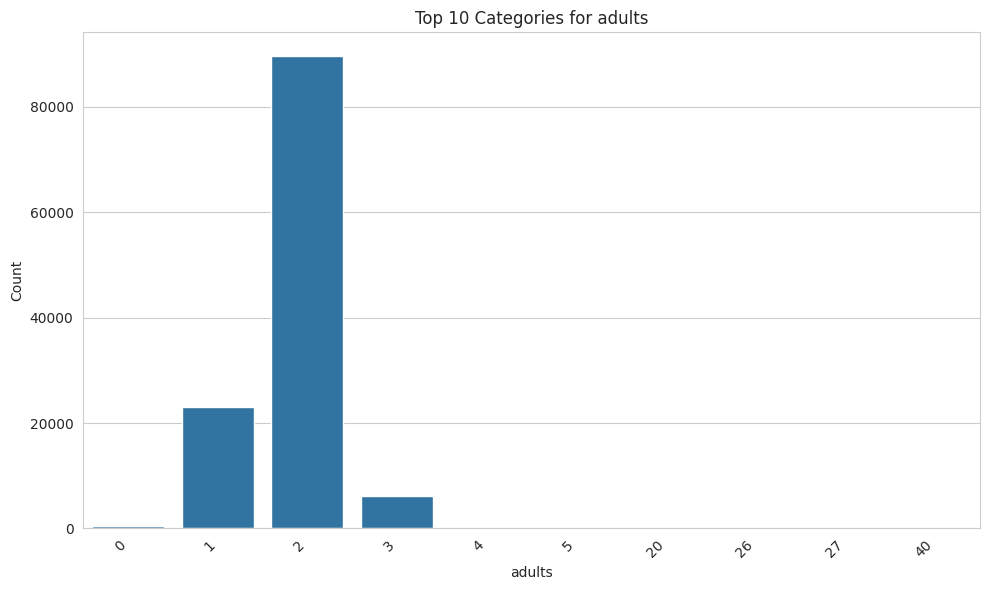

Column: children
Cardinality: 5

Top 10 Categories:


Count  Percentage (%)
children                        
0.0       110796           92.80
1.0         4861            4.07
2.0         3652            3.06
3.0           76            0.06
10.0           1            0.00

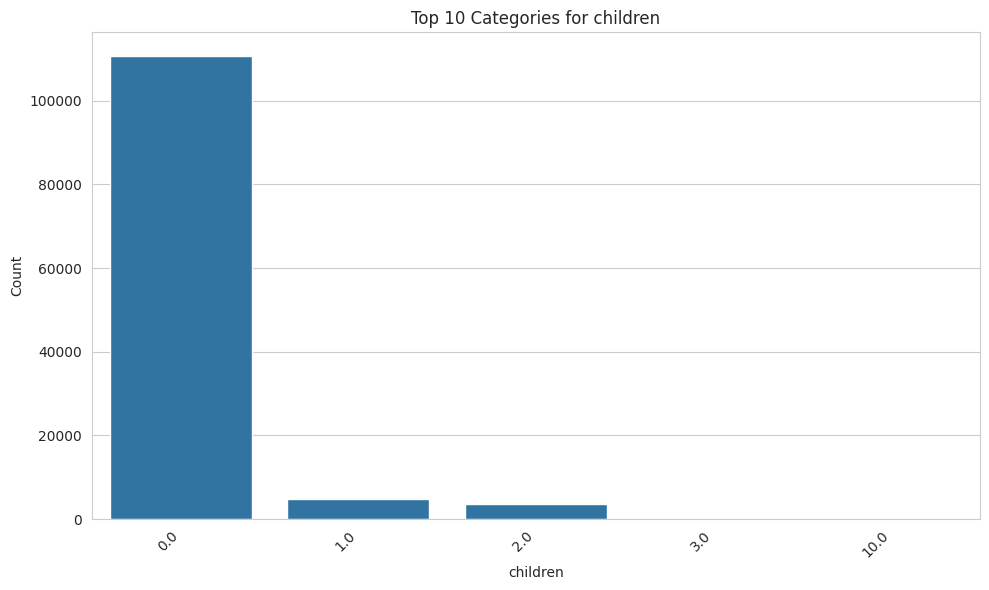

Column: babies
Cardinality: 5

Top 10 Categories:


Count  Percentage (%)
babies                        
0       118473           99.23
1          900            0.75
2           15            0.01
10           1            0.00
9            1            0.00

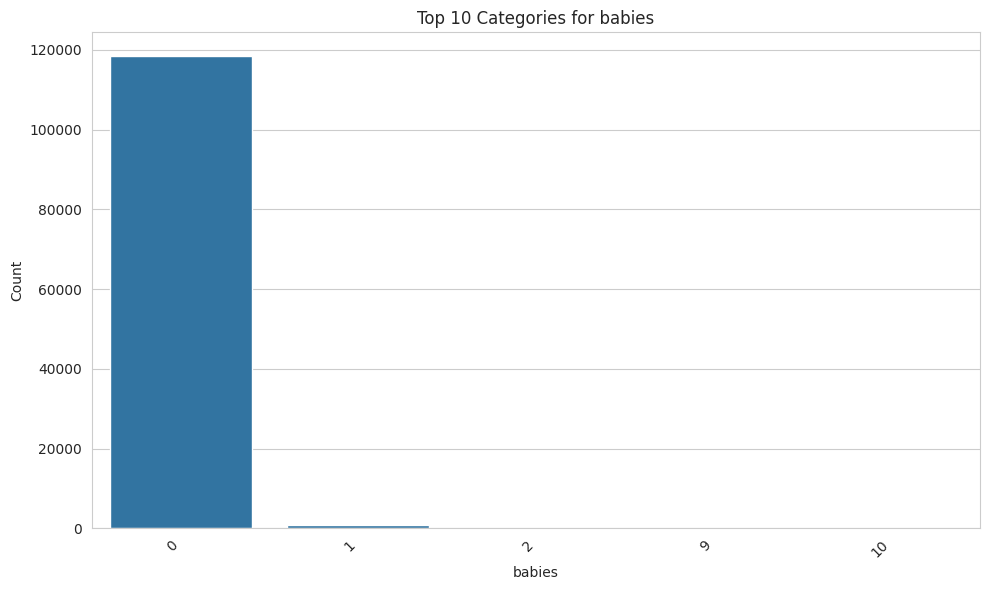

Column: meal
Cardinality: 5

Top 10 Categories:


Count  Percentage (%)
meal                            
BB         92310           77.32
HB         14463           12.11
SC         10650            8.92
Undefined   1169            0.98
FB           798            0.67

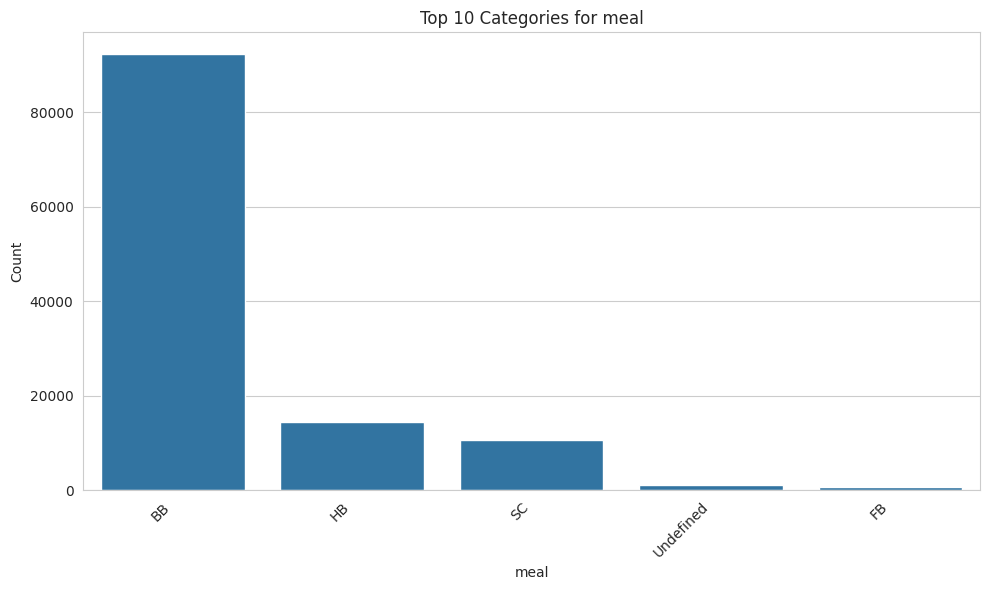

Column: market_segment
Cardinality: 8

Top 10 Categories:


Count  Percentage (%)
market_segment                       
Online TA       56477           47.30
Offline TA/TO   24219           20.29
Groups          19811           16.59
Direct          12606           10.56
Corporate        5295            4.44
Complementary     743            0.62
Aviation          237            0.20
Undefined           2            0.00

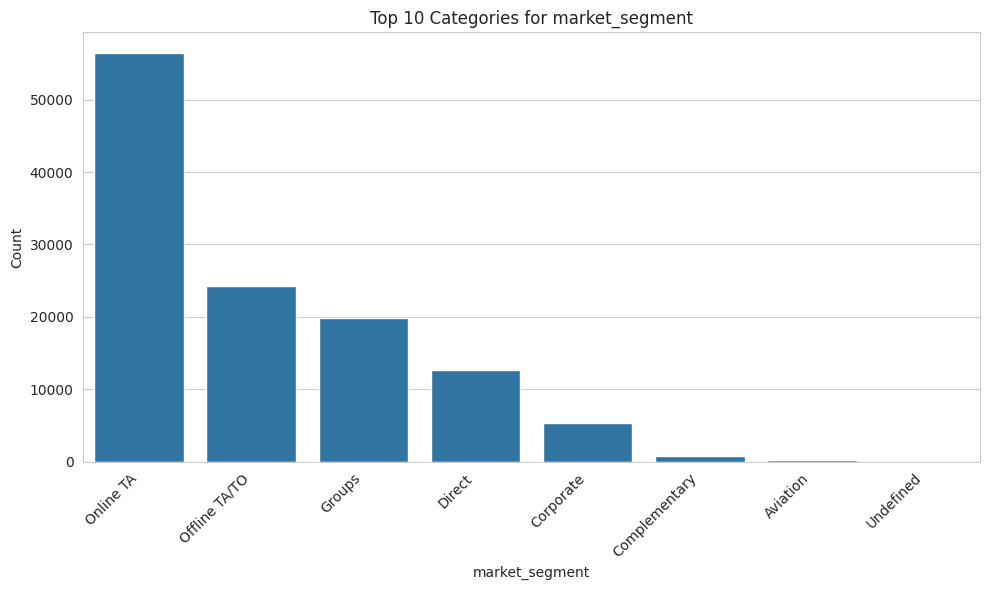

Column: distribution_channel
Cardinality: 5

Top 10 Categories:


Count  Percentage (%)
distribution_channel                       
TA/TO                 97870           81.98
Direct                14645           12.27
Corporate              6677            5.59
GDS                     193            0.16
Undefined                 5            0.00

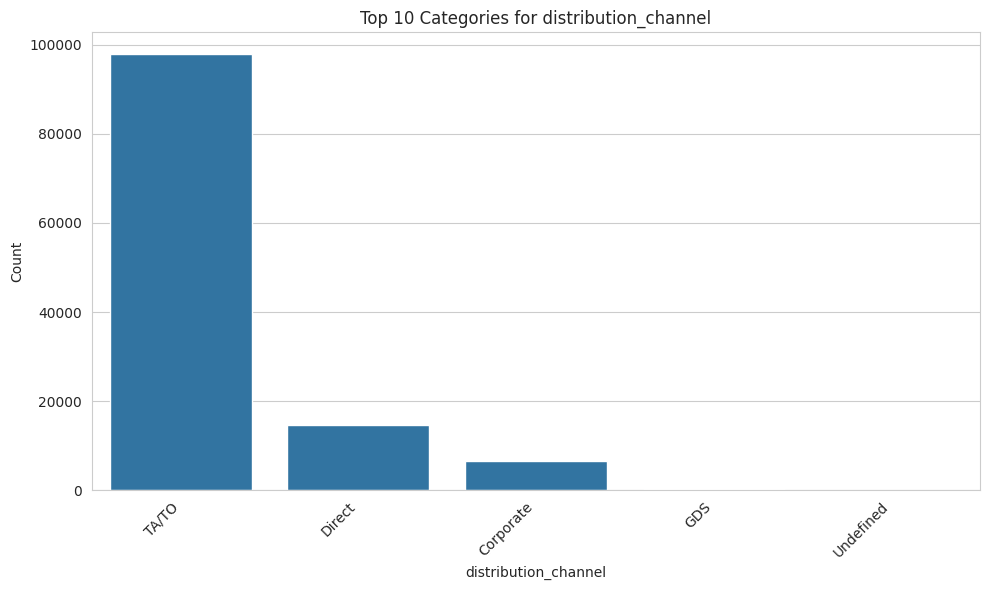

Column: is_repeated_guest
Cardinality: 2

Top 10 Categories:


Count  Percentage (%)
is_repeated_guest                        
0                  115580           96.81
1                    3810            3.19

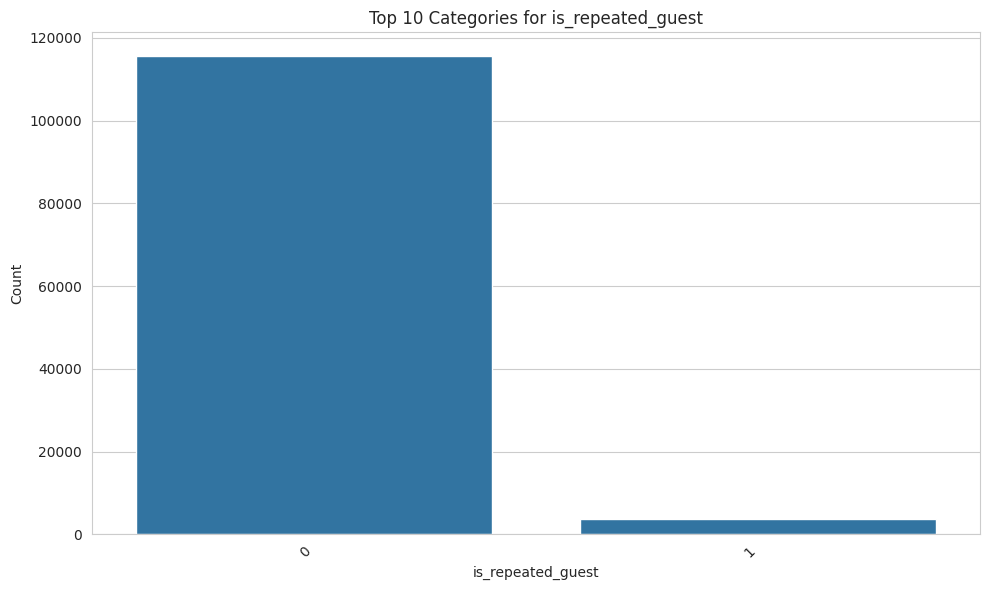

Column: previous_cancellations
Cardinality: 15

Top 10 Categories:


Count  Percentage (%)
previous_cancellations                        
0                       112906           94.57
1                         6051            5.07
2                          116            0.10
3                           65            0.05
24                          48            0.04
11                          35            0.03
4                           31            0.03
26                          26            0.02
25                          25            0.02
6                           22            0.02

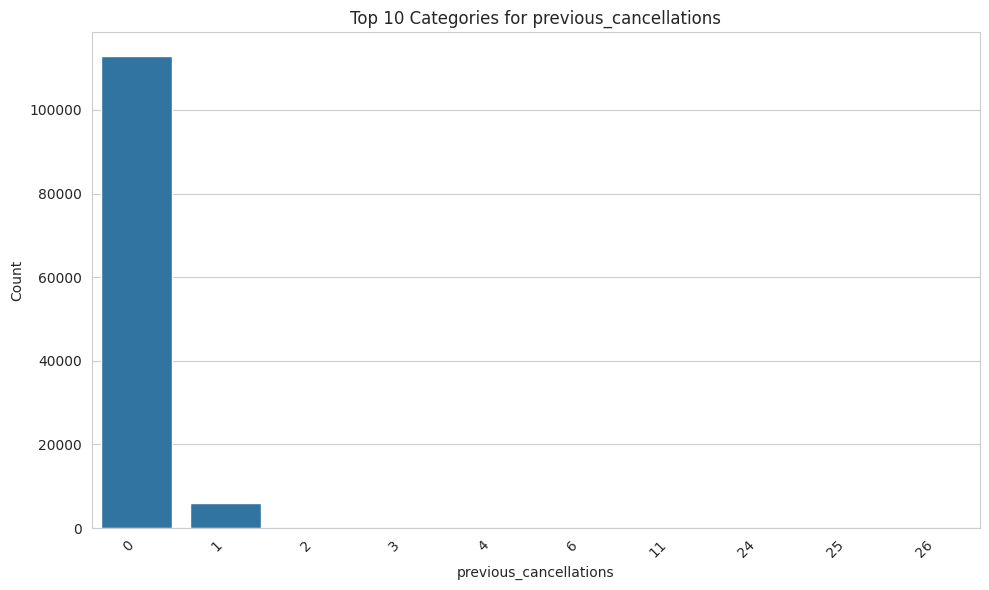

Column: reserved_room_type
Cardinality: 10

Top 10 Categories:


Count  Percentage (%)
reserved_room_type                       
A                   85994           72.03
D                   19201           16.08
E                    6535            5.47
F                    2897            2.43
G                    2094            1.75
B                    1118            0.94
C                     932            0.78
H                     601            0.50
P                      12            0.01
L                       6            0.01

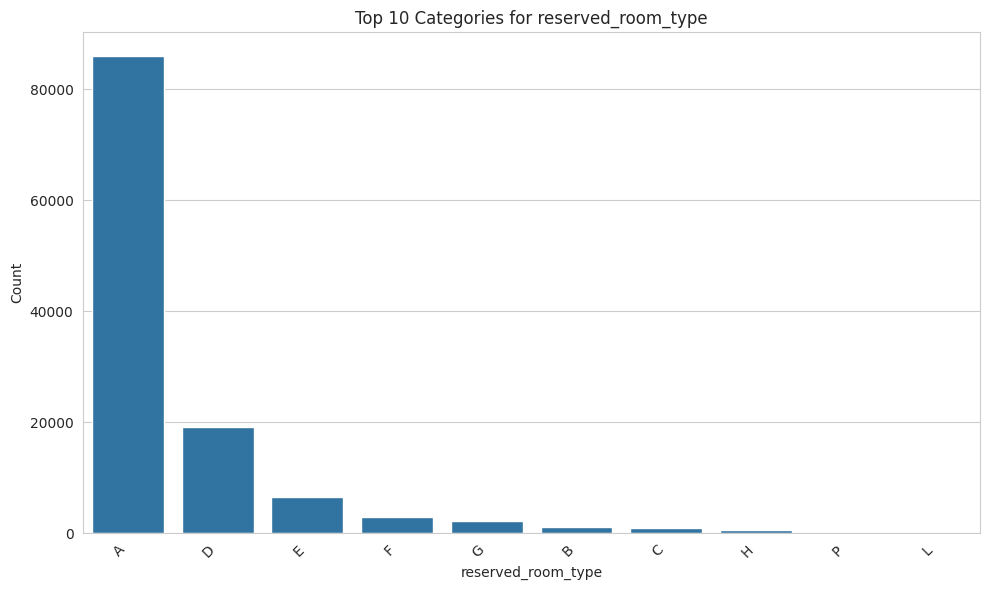

Column: assigned_room_type
Cardinality: 12

Top 10 Categories:


Count  Percentage (%)
assigned_room_type                       
A                   74053           62.03
D                   25322           21.21
E                    7806            6.54
F                    3751            3.14
G                    2553            2.14
C                    2375            1.99
B                    2163            1.81
H                     712            0.60
I                     363            0.30
K                     279            0.23

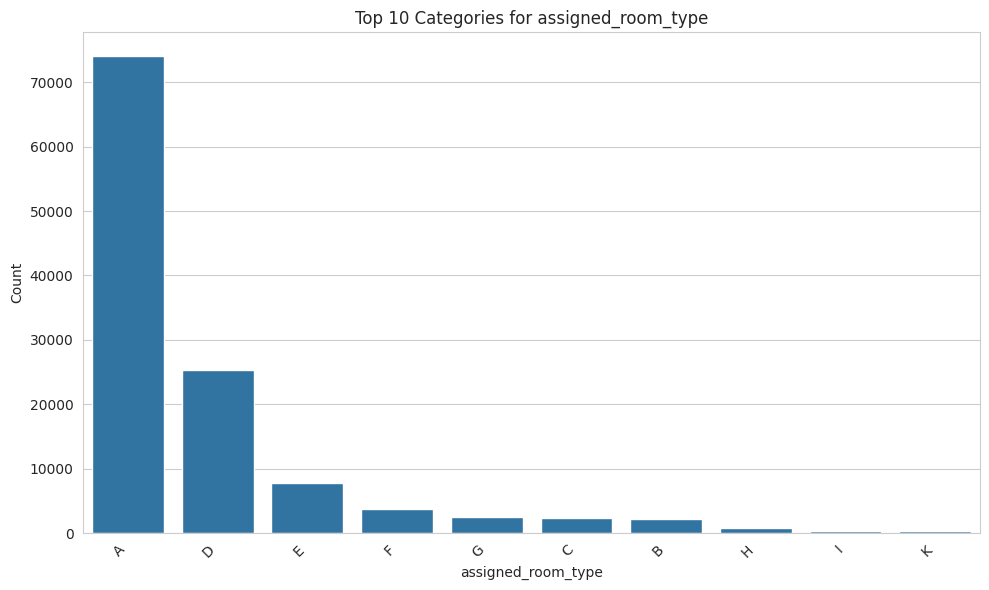

Column: booking_changes
Cardinality: 21

Top 10 Categories:


Count  Percentage (%)
booking_changes                        
0                101314           84.86
1                 12701           10.64
2                  3805            3.19
3                   927            0.78
4                   376            0.31
5                   118            0.10
6                    63            0.05
7                    31            0.03
8                    17            0.01
9                     8            0.01

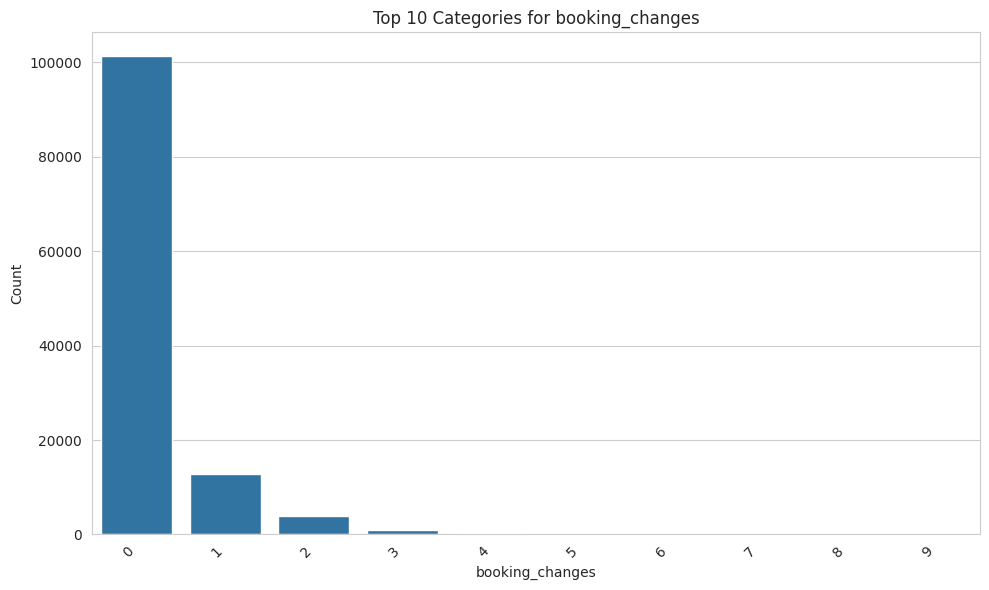

Column: deposit_type
Cardinality: 3

Top 10 Categories:


Count  Percentage (%)
deposit_type                        
No Deposit    104641           87.65
Non Refund     14587           12.22
Refundable       162            0.14

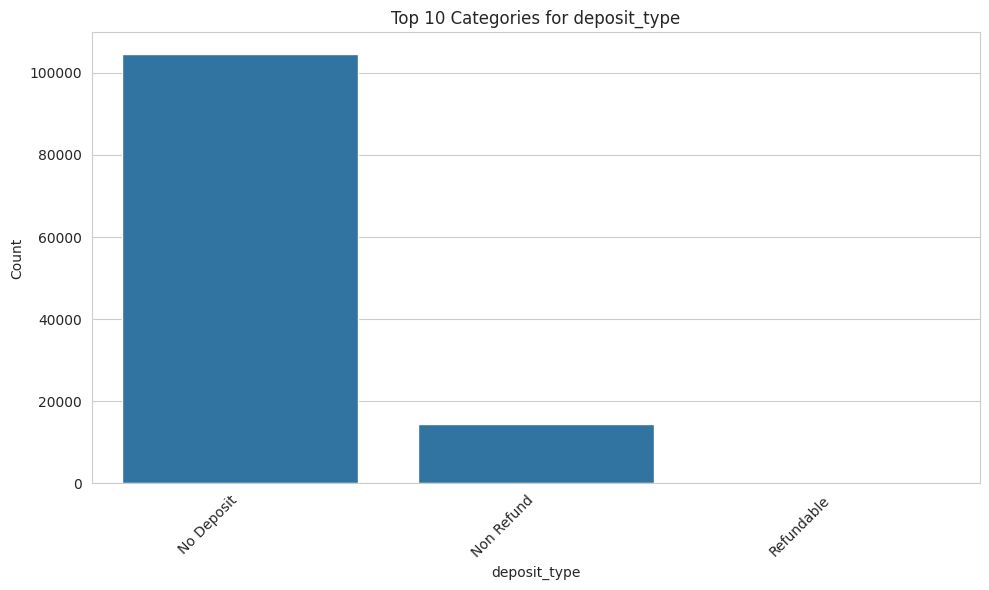

Column: customer_type
Cardinality: 4

Top 10 Categories:


Count  Percentage (%)
customer_type                         
Transient        89613           75.06
Transient-Party  25124           21.04
Contract          4076            3.41
Group              577            0.48

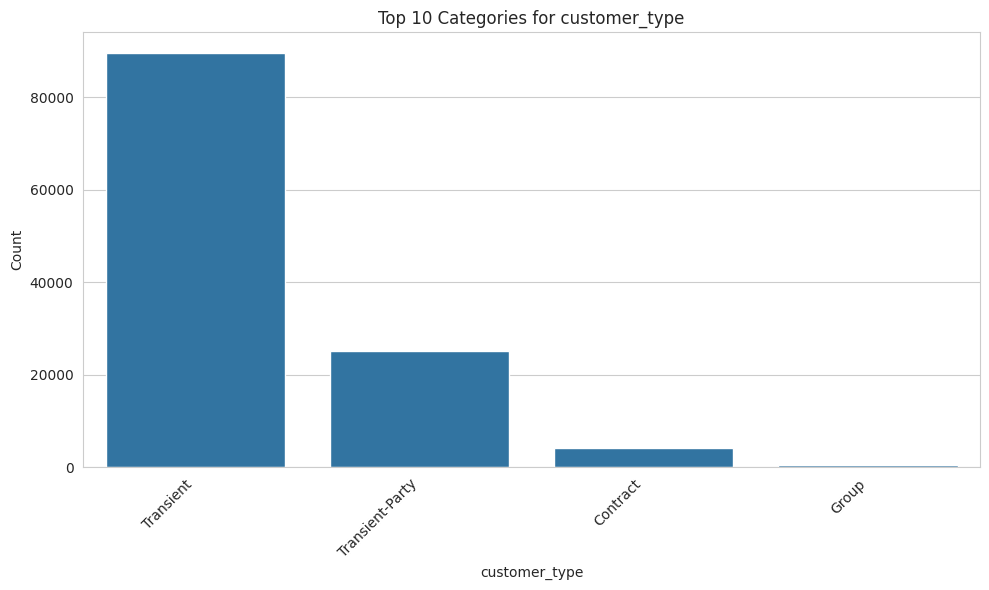

Column: required_car_parking_spaces
Cardinality: 5

Top 10 Categories:


Count  Percentage (%)
required_car_parking_spaces                        
0                            111974           93.79
1                              7383            6.18
2                                28            0.02
3                                 3            0.00
8                                 2            0.00

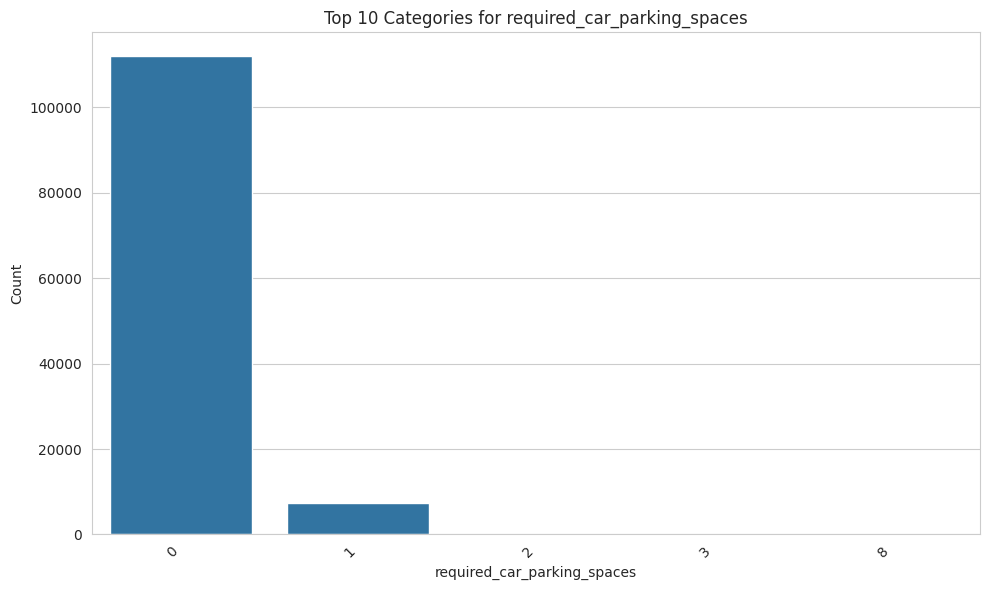

Column: total_of_special_requests
Cardinality: 6

Top 10 Categories:


Count  Percentage (%)
total_of_special_requests                       
0                          70318           58.90
1                          33226           27.83
2                          12969           10.86
3                           2497            2.09
4                            340            0.28
5                             40            0.03

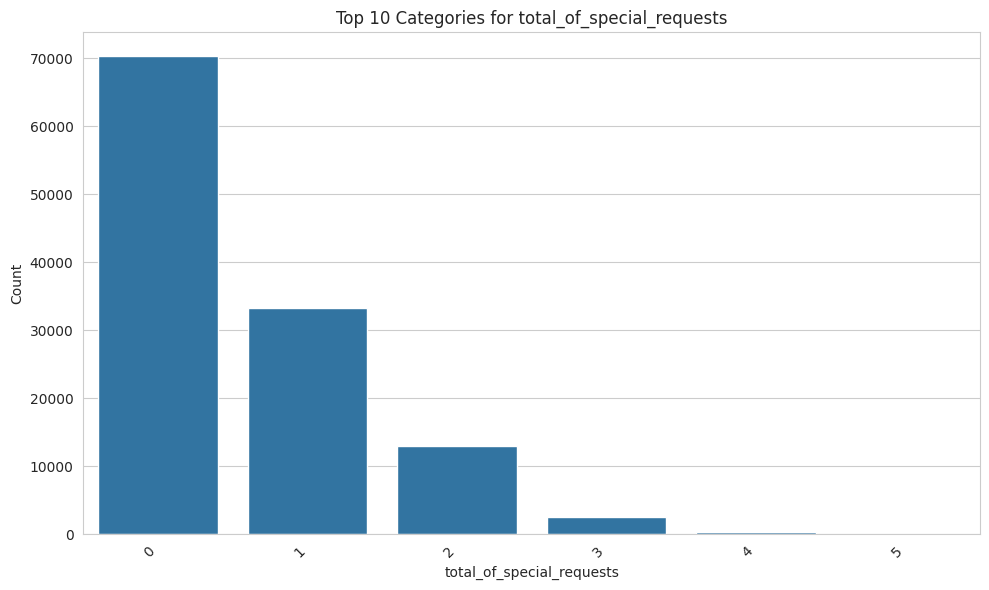

Column: reservation_status
Cardinality: 3

Top 10 Categories:


Count  Percentage (%)
reservation_status                       
Check-Out           75166           62.96
Canceled            43017           36.03
No-Show              1207            1.01

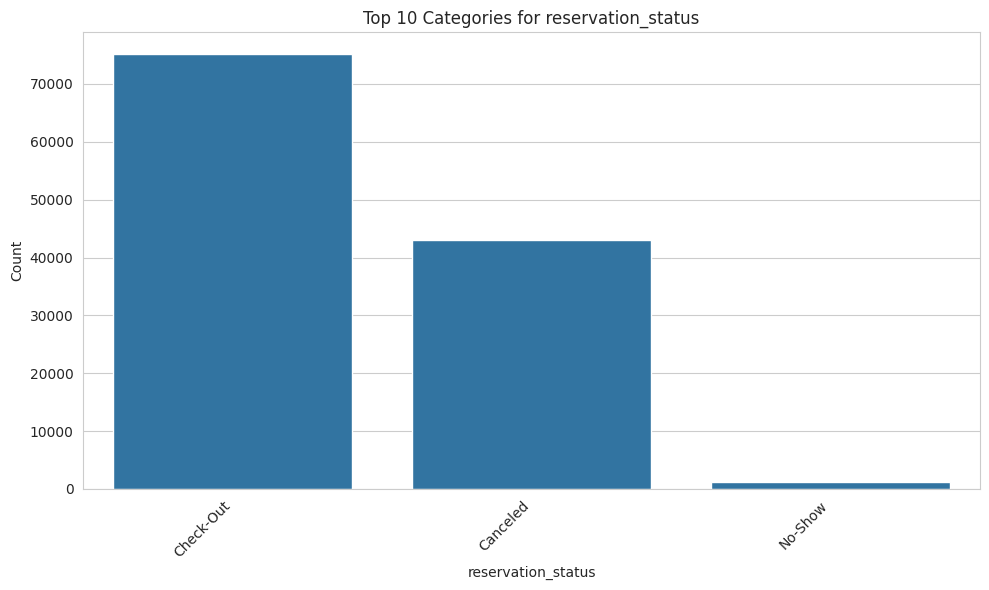

In [ ]:
def plot_categorical_features(df, categorical_cols, k=10):
    for col in categorical_cols:
        print(f"Column: {col}")
        print(f"Cardinality: {df[col].nunique()}")

        value_counts = df[col].value_counts()
        top_k_values = value_counts.head(k)
        top_k_percentages = value_counts.head(k) / len(df) * 100

        print(f"\nTop {k} Categories:")
        top_k_table = pd.DataFrame({'Count': top_k_values, 'Percentage (%)': top_k_percentages.round(2)})
        display(top_k_table)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_k_values.index, y=top_k_values.values)
        plt.title(f'Top {k} Categories for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

plot_categorical_features(df, categorical_cols)

## Missingness analysis



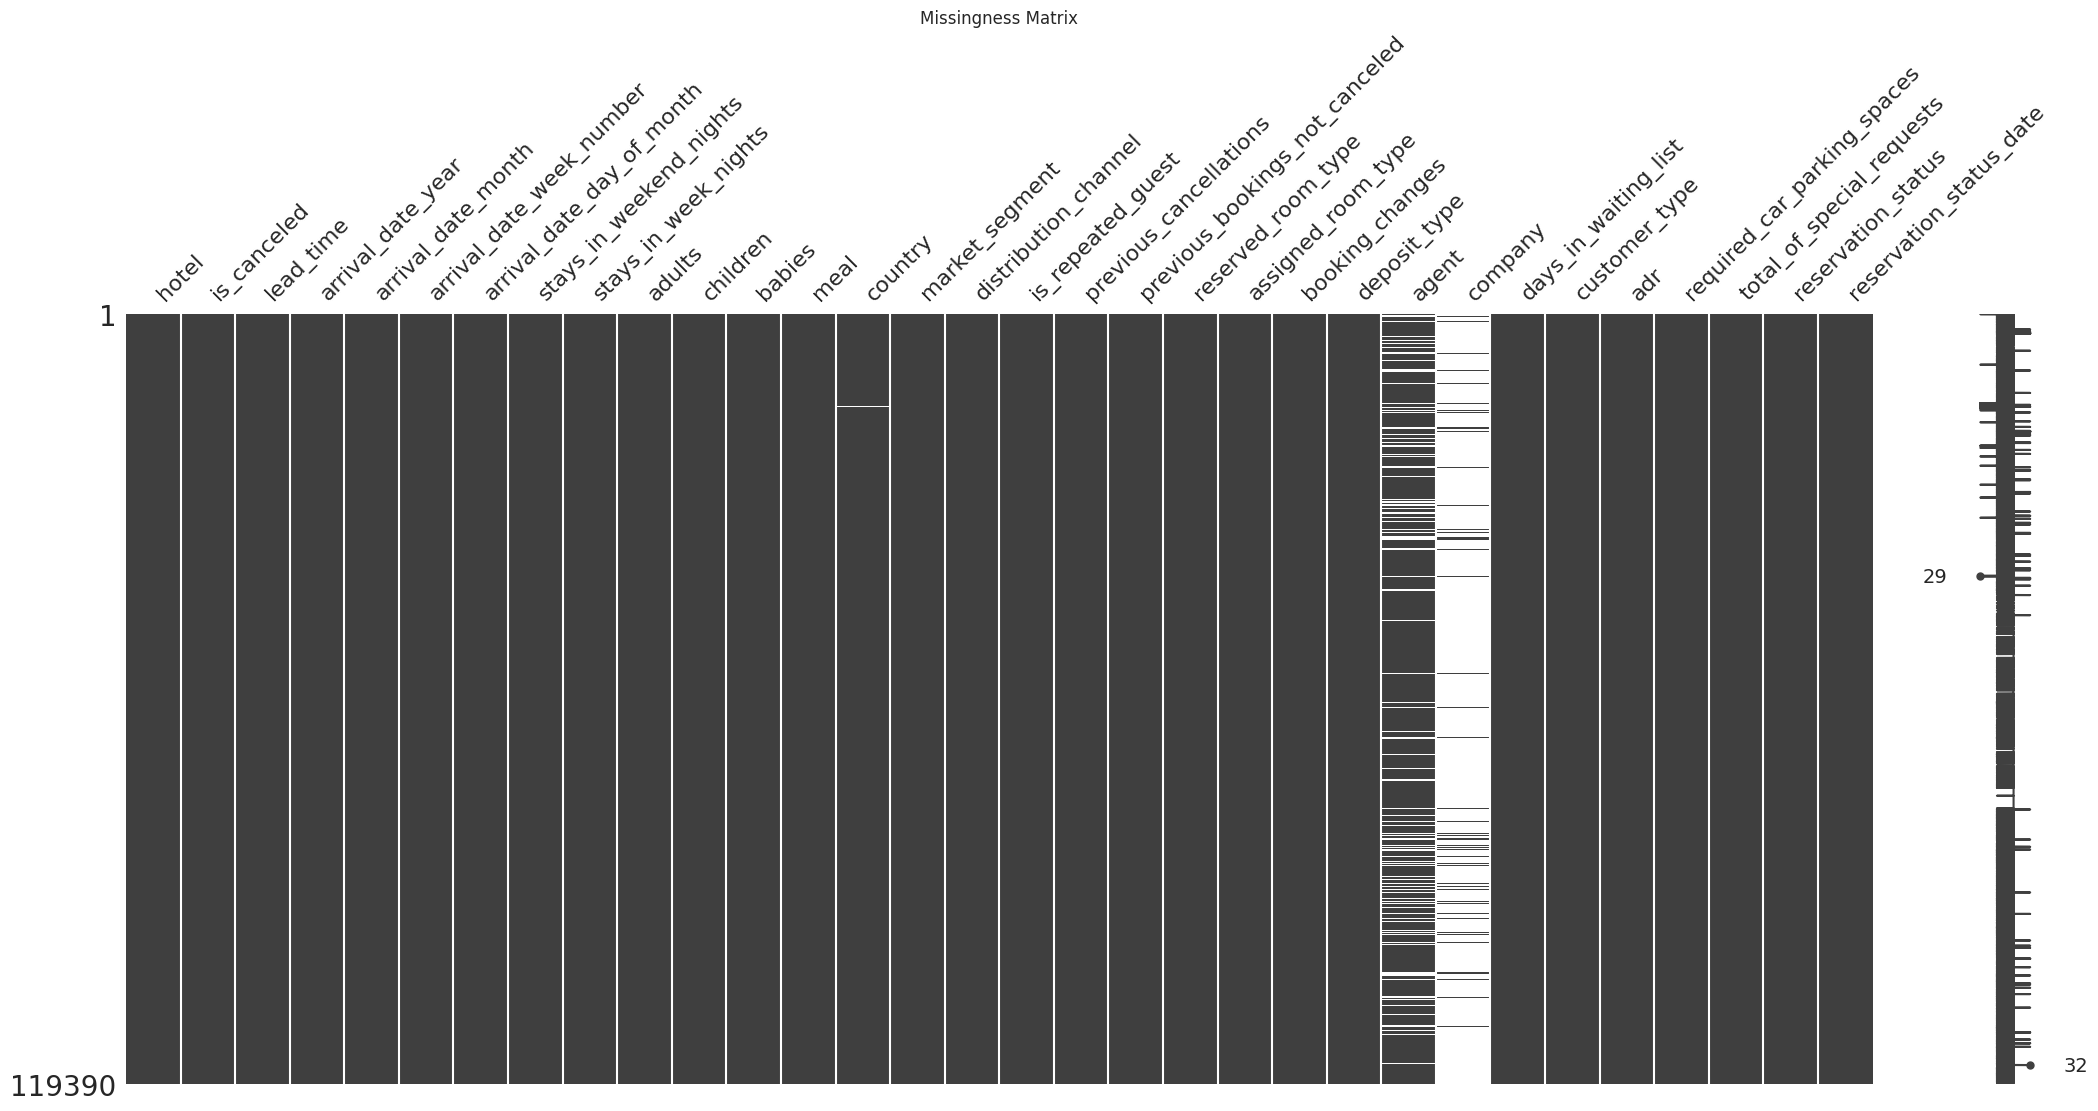

Missing Count  Missing Percentage
company          112593               94.31
agent             16340               13.69
country             488                0.41
children              4                0.00

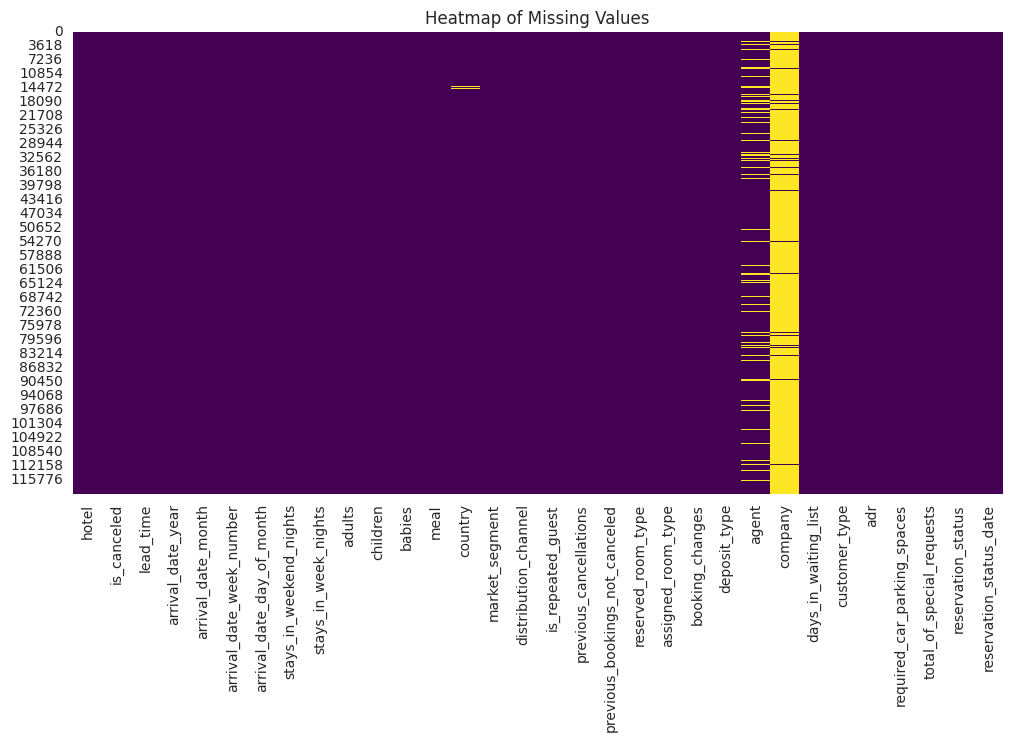

In [ ]:
import missingno as msno

# Generate missingness matrix plot
msno.matrix(df)
plt.title('Missingness Matrix')
plt.show()

# Calculate missing values count and percentage
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame for missing values
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage.round(2)
})

# Display the missing values DataFrame
display(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

# Generate a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Outlier detection



In [ ]:
def calculate_outliers_iqr(series, multiplier, col_name):
    """
    Calculates outliers using the IQR method.

    Args:
        series (pd.Series): The input data series.
        multiplier (float): The IQR multiplier (e.g., 1.5 or 3).
        col_name (str): The name of the column.

    Returns:
        pd.Series: A series containing the outlier values.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Apply the function to 'adr' and 'lead_time' with different multipliers
adr_outliers_1_5 = calculate_outliers_iqr(df['adr'], 1.5, 'adr')
adr_outliers_3 = calculate_outliers_iqr(df['adr'], 3, 'adr')
lead_time_outliers_1_5 = calculate_outliers_iqr(df['lead_time'], 1.5, 'lead_time')
lead_time_outliers_3 = calculate_outliers_iqr(df['lead_time'], 3, 'lead_time')

print(f"Number of 'adr' outliers (1.5x IQR): {len(adr_outliers_1_5)}")
print(f"Number of 'adr' outliers (3x IQR): {len(adr_outliers_3)}")
print(f"Number of 'lead_time' outliers (1.5x IQR): {len(lead_time_outliers_1_5)}")
print(f"Number of 'lead_time' outliers (3x IQR): {len(lead_time_outliers_3)}")

Number of 'adr' outliers (1.5x IQR): 3793
Number of 'adr' outliers (3x IQR): 327
Number of 'lead_time' outliers (1.5x IQR): 3005
Number of 'lead_time' outliers (3x IQR): 181


## Outlier visualization and reporting



Number of 'adr' outliers (1.5x IQR): 3793
Number of 'adr' outliers (3x IQR): 327
Number of 'lead_time' outliers (1.5x IQR): 3005
Number of 'lead_time' outliers (3x IQR): 181


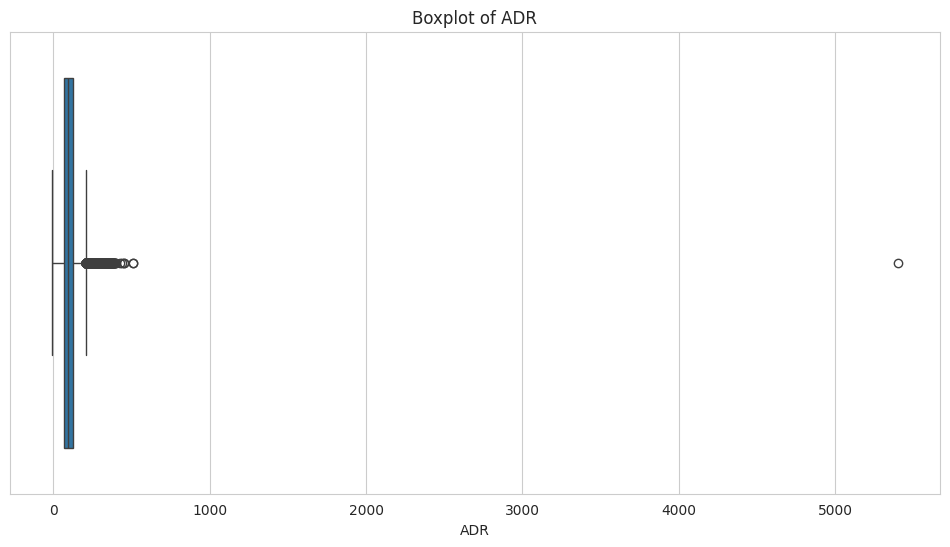

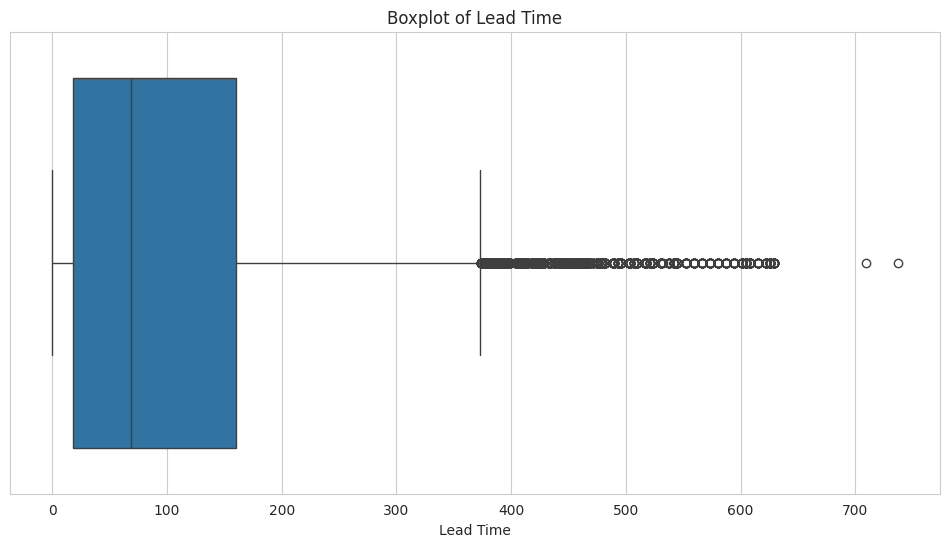

In [ ]:
print(f"Number of 'adr' outliers (1.5x IQR): {len(adr_outliers_1_5)}")
print(f"Number of 'adr' outliers (3x IQR): {len(adr_outliers_3)}")
print(f"Number of 'lead_time' outliers (1.5x IQR): {len(lead_time_outliers_1_5)}")
print(f"Number of 'lead_time' outliers (3x IQR): {len(lead_time_outliers_3)}")

# Generate boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of ADR')
plt.xlabel('ADR')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['lead_time'])
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time')
plt.show()

## Correlation analysis



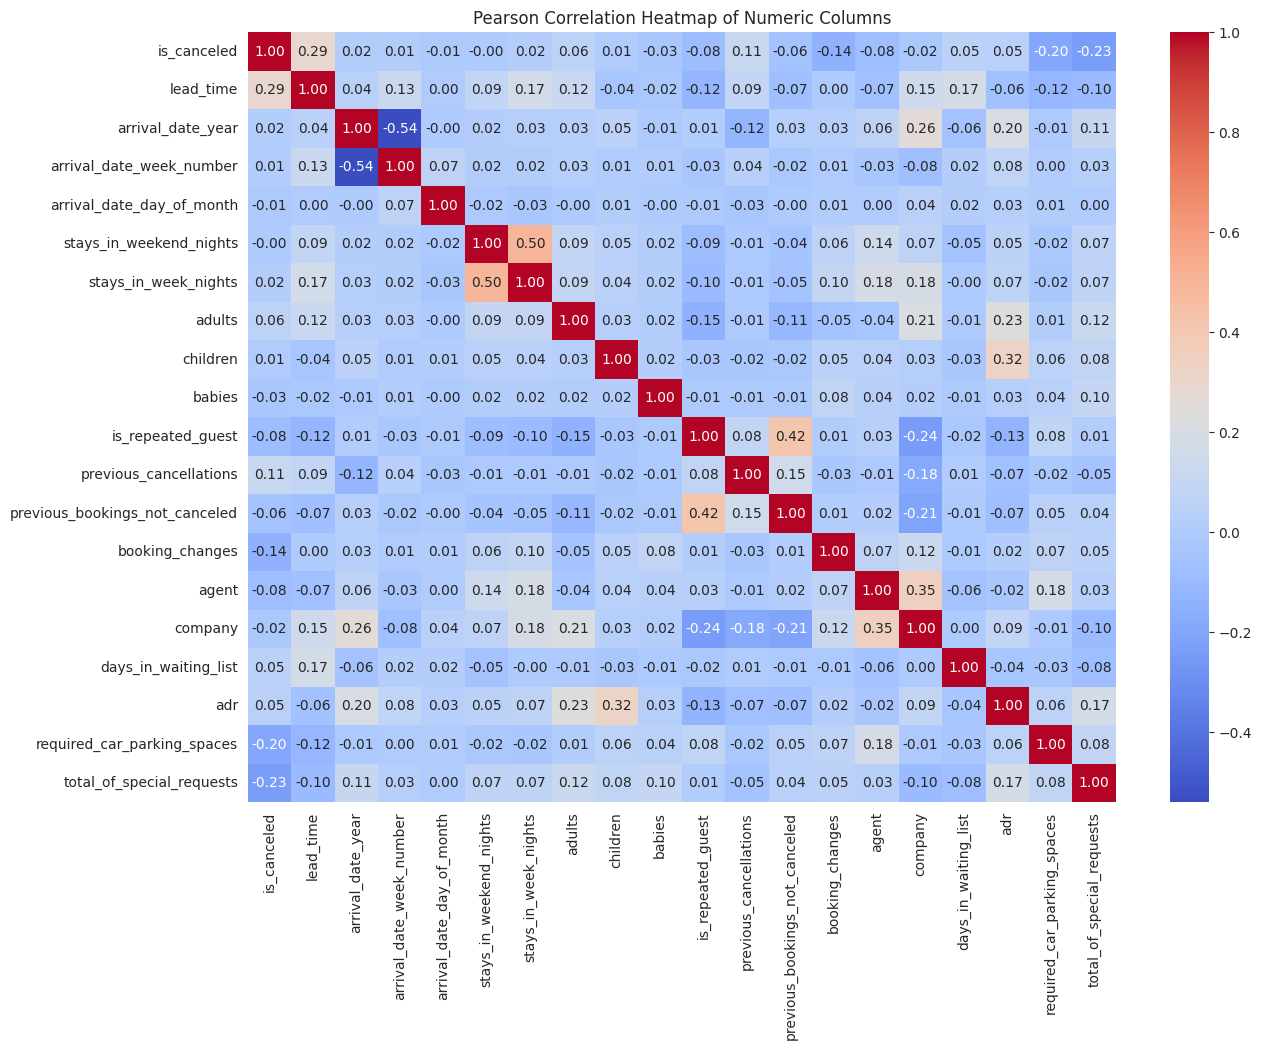

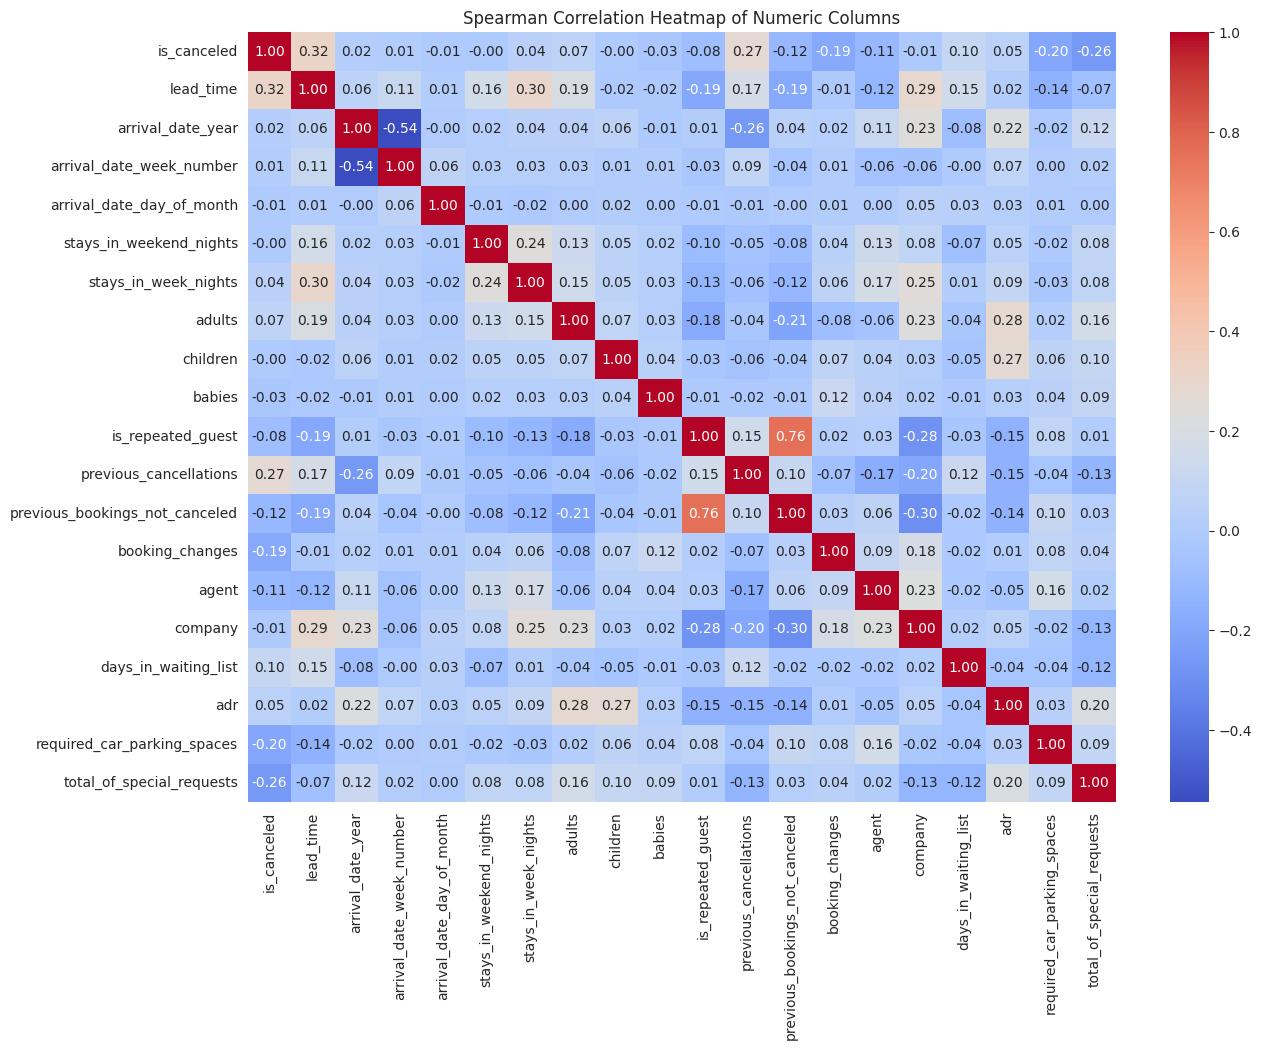

In [ ]:
numeric_df = df.select_dtypes(include=np.number)

# Pearson correlation heatmap
plt.figure(figsize=(14, 10))
pearson_corr = numeric_df.corr()
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Numeric Columns')
plt.show()

# Spearman correlation heatmap
plt.figure(figsize=(14, 10))
spearman_corr = numeric_df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap of Numeric Columns')
plt.show()

## Visualize top correlated pairs


Top 5 most correlated continuous variable pairs (Pearson correlation):
stays_in_week_nights            stays_in_weekend_nights    0.498969
previous_bookings_not_canceled  is_repeated_guest          0.418056
company                         agent                      0.350746
children                        adr                        0.324854
lead_time                       is_canceled                0.293123
dtype: float64


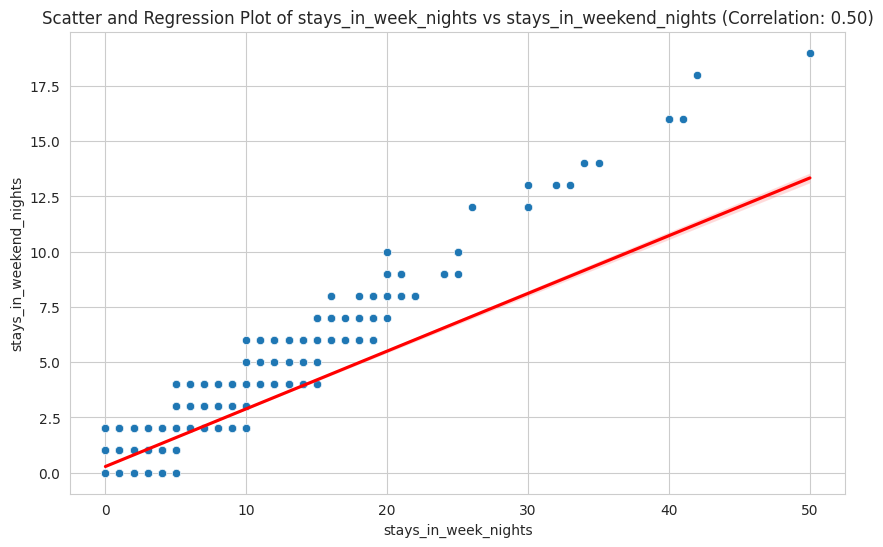

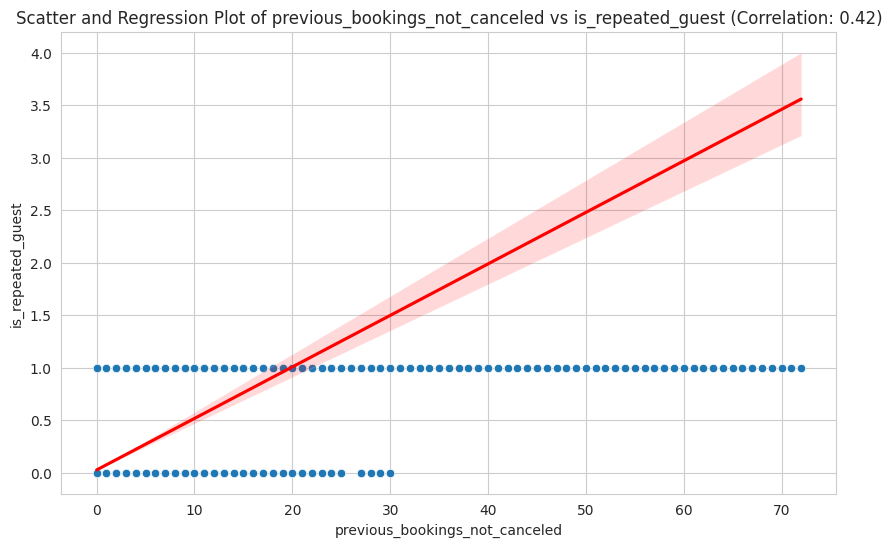

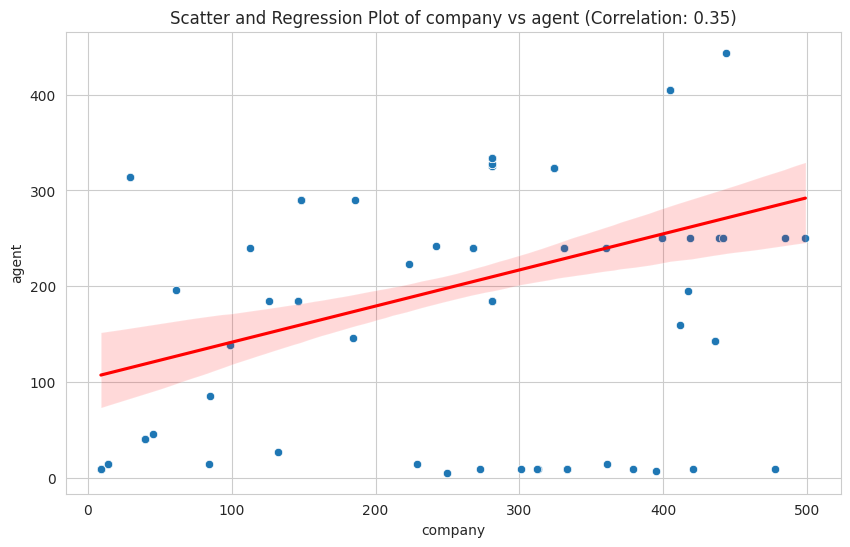

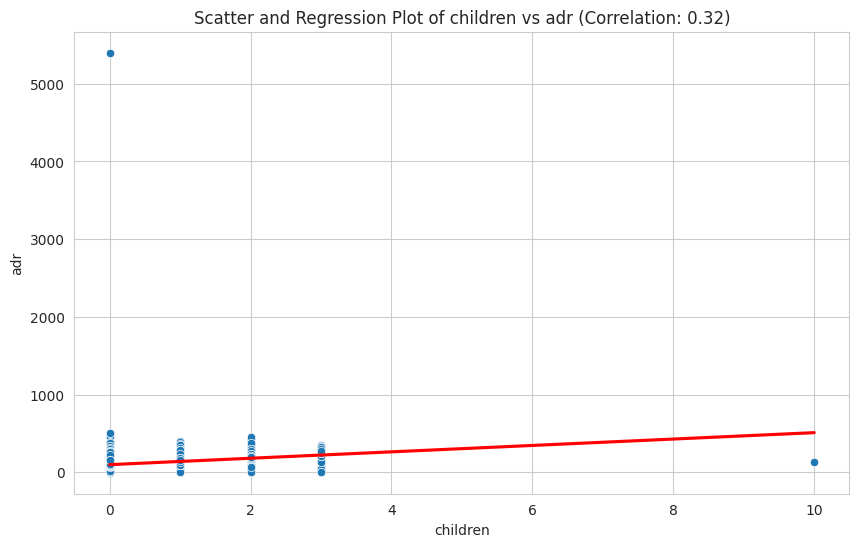

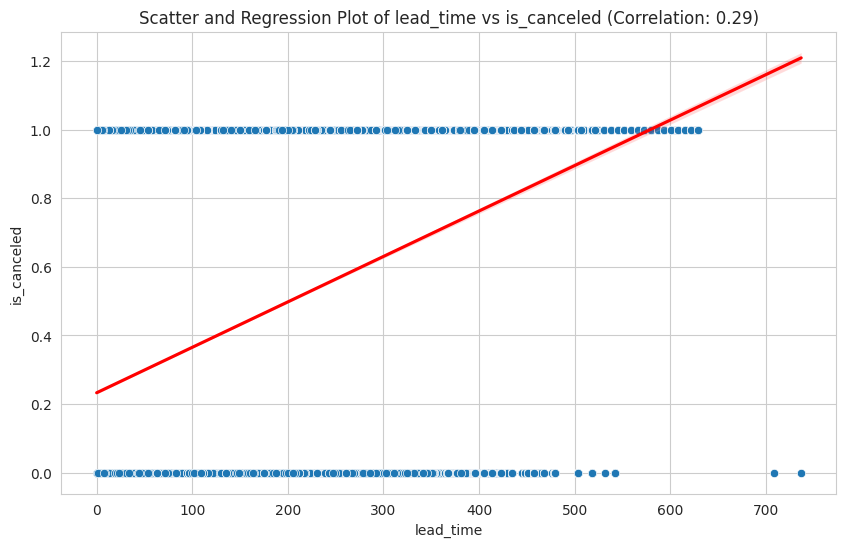

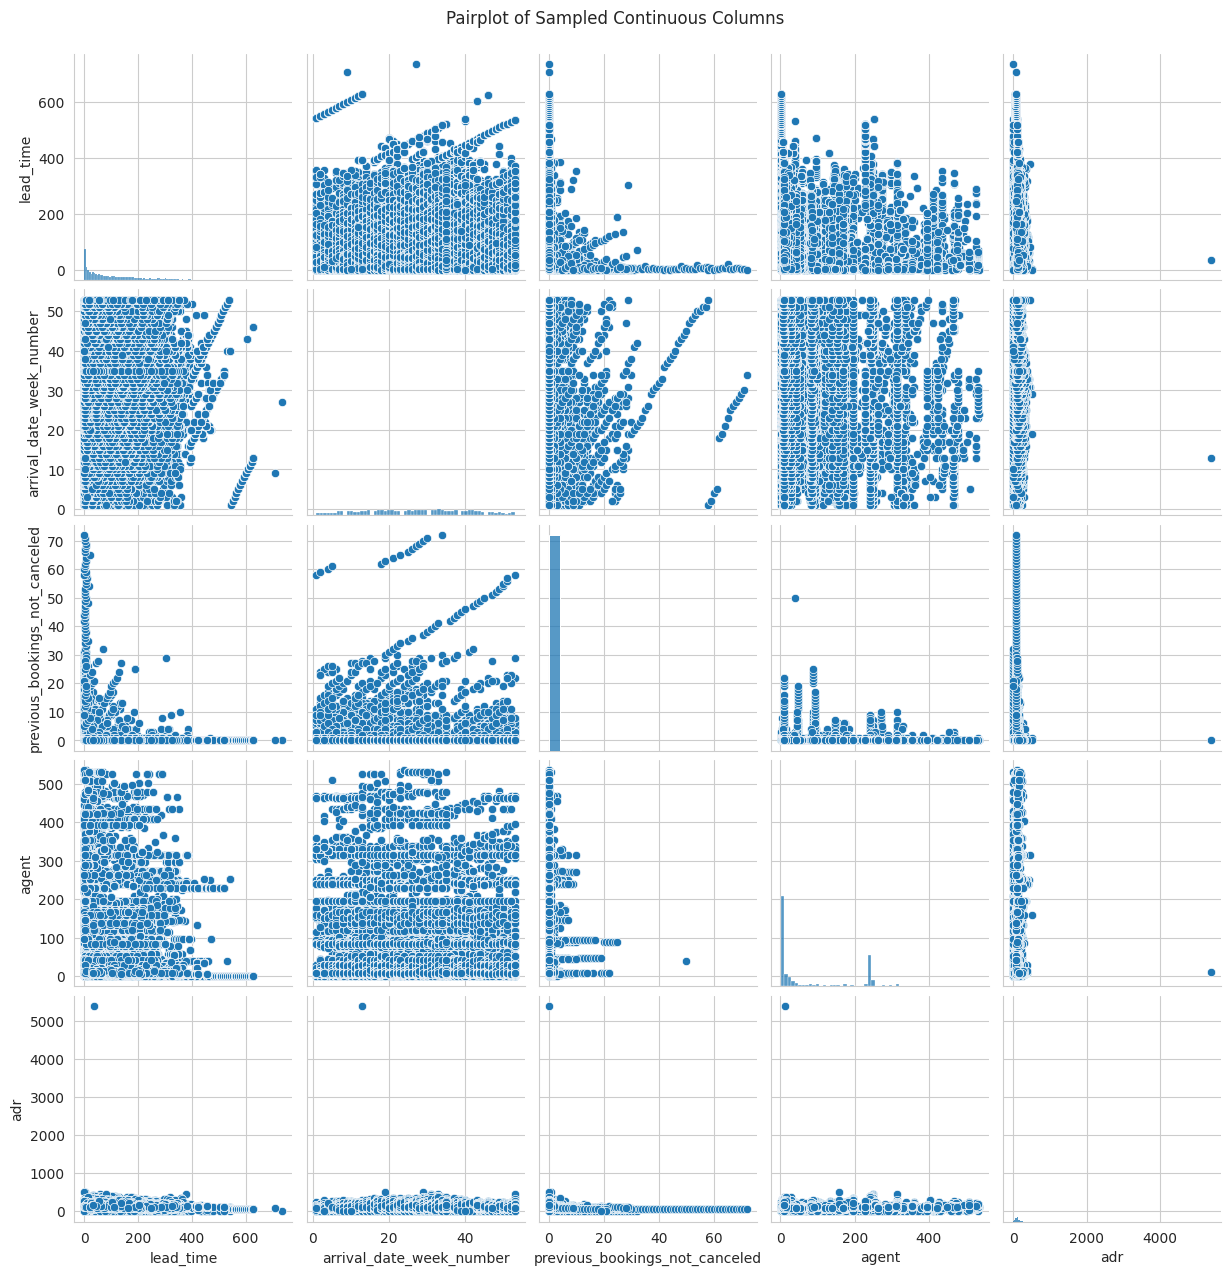

In [ ]:
# Identify the top 5 most correlated pairs
corr_pairs = pearson_corr.unstack().sort_values(kind="quicksort", ascending=False)
# Remove self-correlation and duplicate pairs
corr_pairs = corr_pairs[corr_pairs != 1.0]
corr_pairs = corr_pairs[::2] # Take every second element to avoid duplicates

top_5_corr_pairs = corr_pairs.head(5)
print("Top 5 most correlated continuous variable pairs (Pearson correlation):")
print(top_5_corr_pairs)

# Plot scatter/regression plots for top 5 correlated pairs
for (col1, col2), corr_value in top_5_corr_pairs.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2)
    sns.regplot(data=df, x=col1, y=col2, scatter=False, color='red')
    plt.title(f'Scatter and Regression Plot of {col1} vs {col2} (Correlation: {corr_value:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Create a pairplot for a sample of continuous columns
continuous_cols_sample = ['lead_time', 'arrival_date_week_number', 'previous_bookings_not_canceled', 'agent', 'adr']
sns.pairplot(df[continuous_cols_sample])
plt.suptitle('Pairplot of Sampled Continuous Columns', y=1.02)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, f_oneway

# Chi-square tests for categorical columns vs is_canceled
print("Chi-square tests for Categorical Columns vs is_canceled:")
for col in categorical_cols:
    if col != 'is_canceled':
        contingency_table = pd.crosstab(df[col], df['is_canceled'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"- {col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")

# ANOVA tests for continuous columns vs is_canceled
print("\nANOVA tests for Continuous Columns vs is_canceled:")
# Ensure the target variable is treated correctly for grouping
canceled_group = df[df['is_canceled'] == 1]
not_canceled_group = df[df['is_canceled'] == 0]

for col in continuous_cols:
    # Check if the column is numeric before performing ANOVA
    if pd.api.types.is_numeric_dtype(df[col]):
        # Drop NaN values to avoid errors in ANOVA
        canceled_data = canceled_group[col].dropna()
        not_canceled_data = not_canceled_group[col].dropna()

        # Perform ANOVA only if both groups have data
        if len(canceled_data) > 0 and len(not_canceled_data) > 0:
            f_statistic, p_value = f_oneway(canceled_data, not_canceled_data)
            print(f"- {col}: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")
        else:
            print(f"- {col}: ANOVA skipped due to insufficient data in one or both groups.")

Chi-square tests for Categorical Columns vs is_canceled:
- hotel: Chi2 = 2224.92, p-value = 0.0000
- arrival_date_year: Chi2 = 81.63, p-value = 0.0000
- arrival_date_month: Chi2 = 588.69, p-value = 0.0000
- arrival_date_day_of_month: Chi2 = 323.08, p-value = 0.0000
- stays_in_weekend_nights: Chi2 = 108.72, p-value = 0.0000
- stays_in_week_nights: Chi2 = 1702.47, p-value = 0.0000
- adults: Chi2 = 902.59, p-value = 0.0000
- children: Chi2 = 98.57, p-value = 0.0000
- babies: Chi2 = 140.94, p-value = 0.0000
- meal: Chi2 = 304.24, p-value = 0.0000
- market_segment: Chi2 = 8497.22, p-value = 0.0000
- distribution_channel: Chi2 = 3745.79, p-value = 0.0000
- is_repeated_guest: Chi2 = 857.41, p-value = 0.0000
- previous_cancellations: Chi2 = 9274.83, p-value = 0.0000
- reserved_room_type: Chi2 = 647.84, p-value = 0.0000
- assigned_room_type: Chi2 = 4918.69, p-value = 0.0000
- booking_changes: Chi2 = 4223.78, p-value = 0.0000
- deposit_type: Chi2 = 27677.33, p-value = 0.0000
- customer_type: Chi

## Numeric distributions by categorical groups



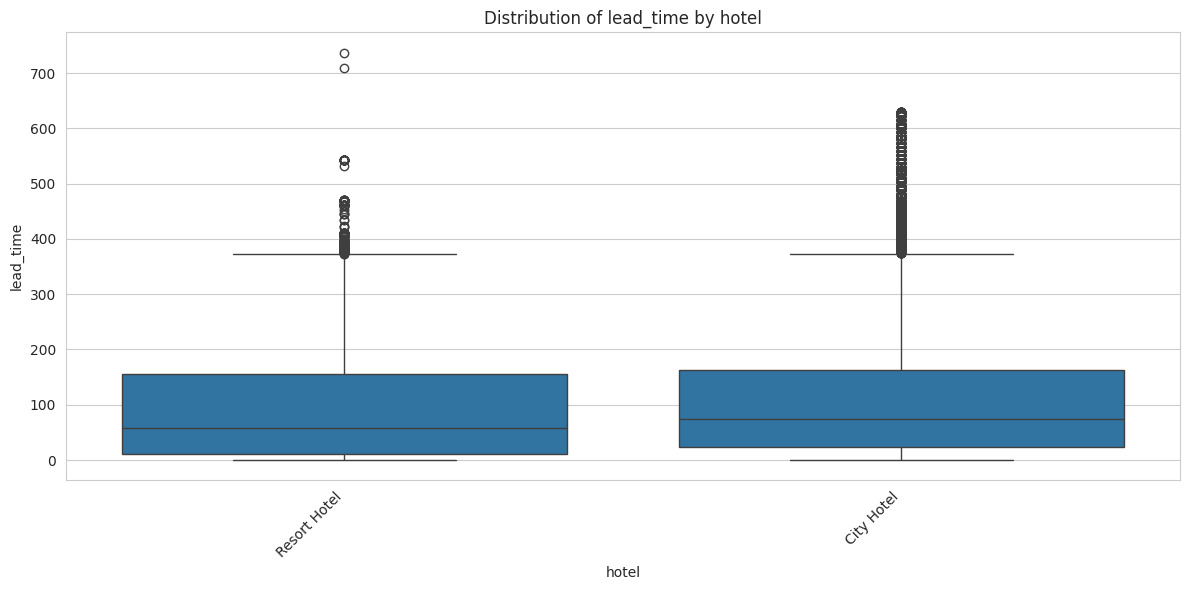

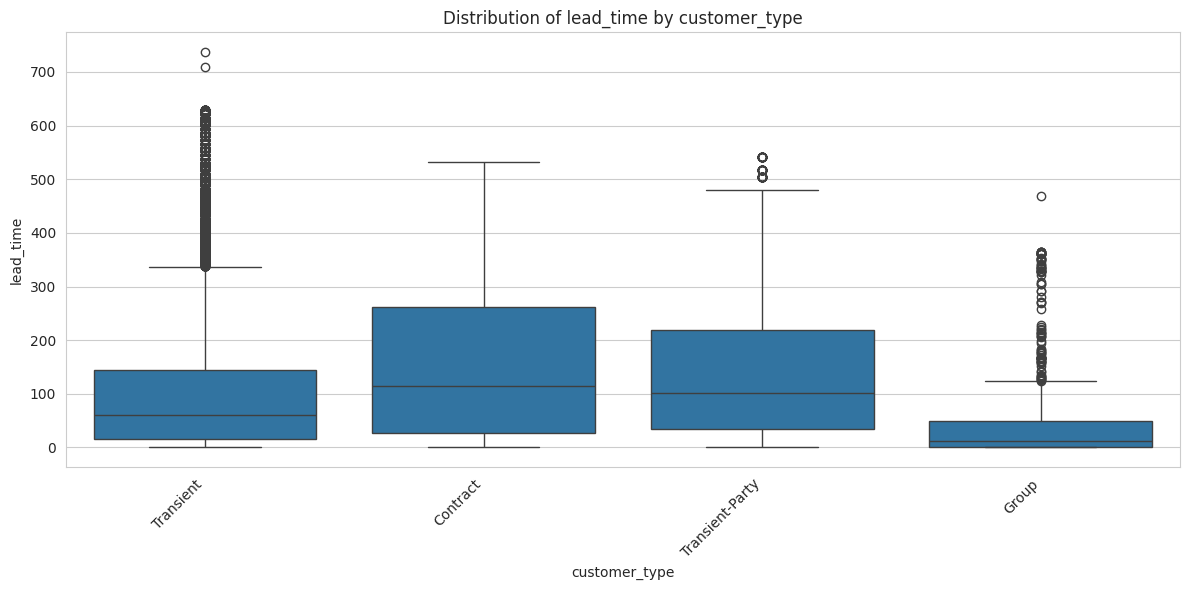

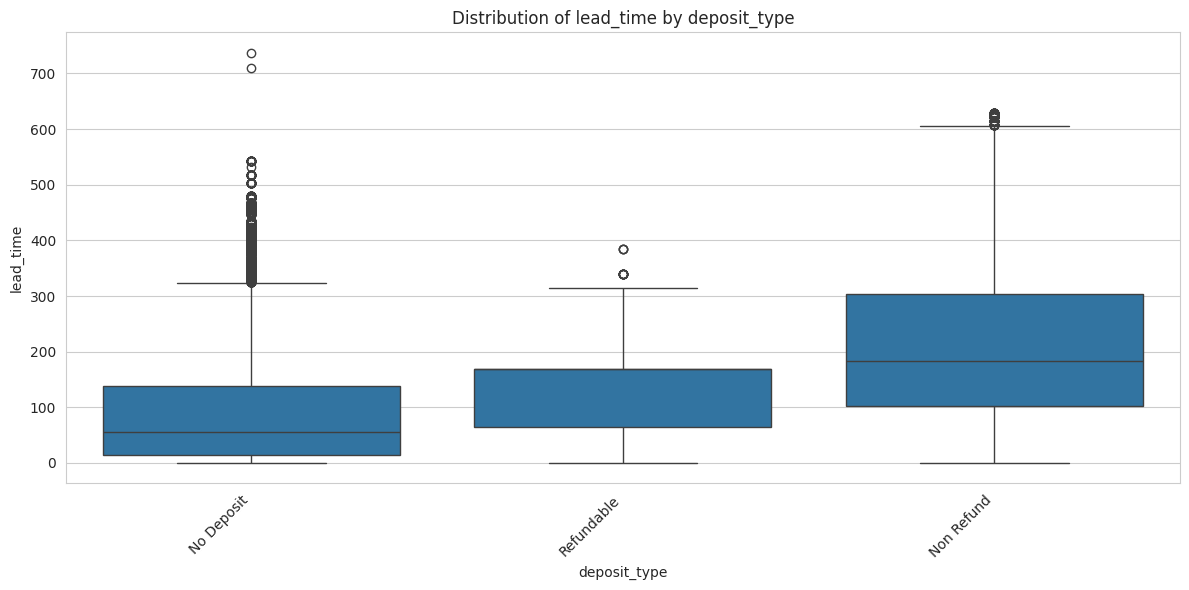

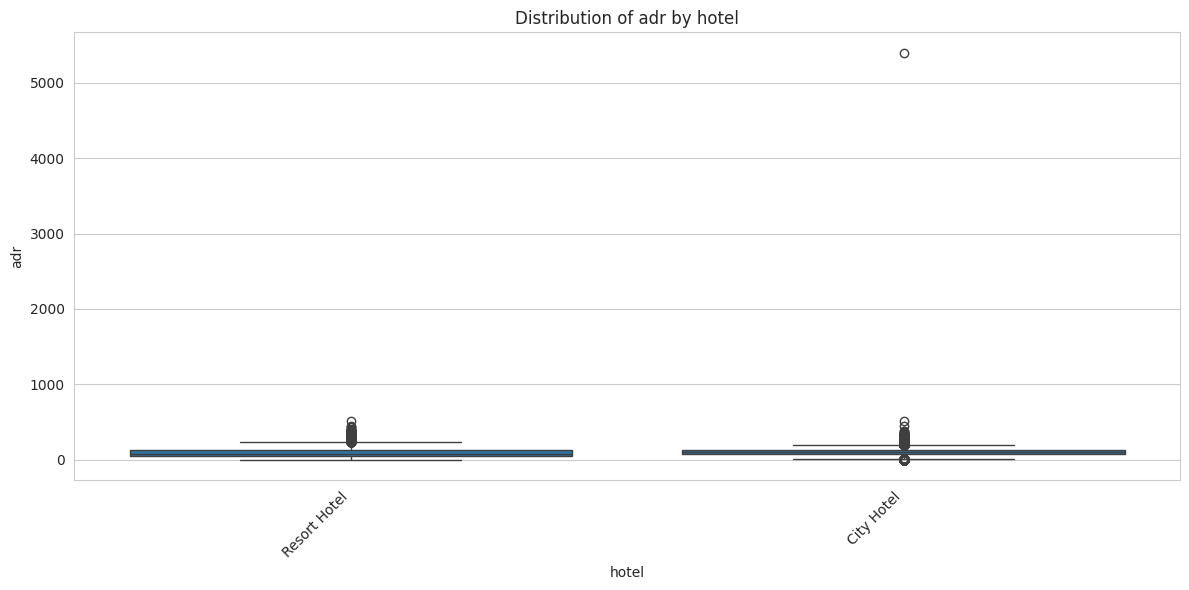

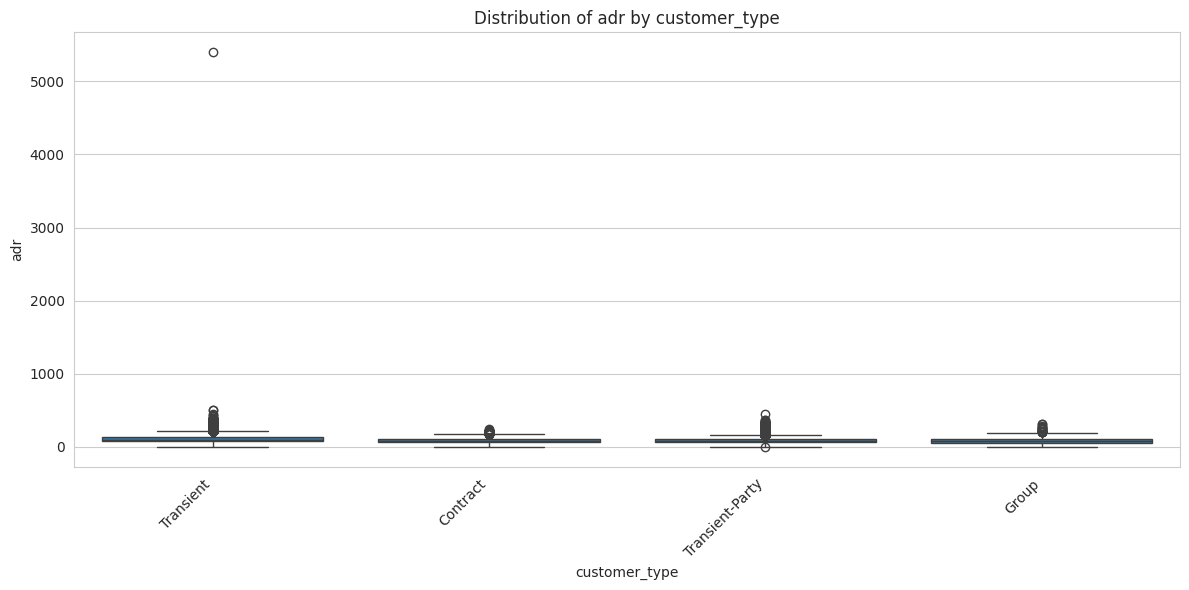

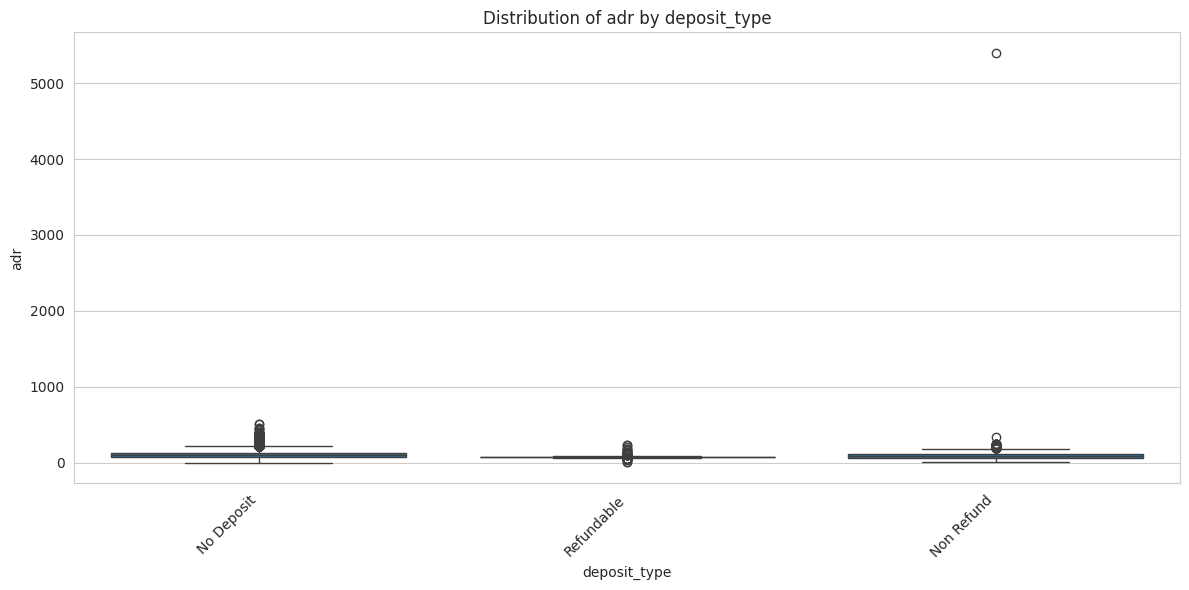

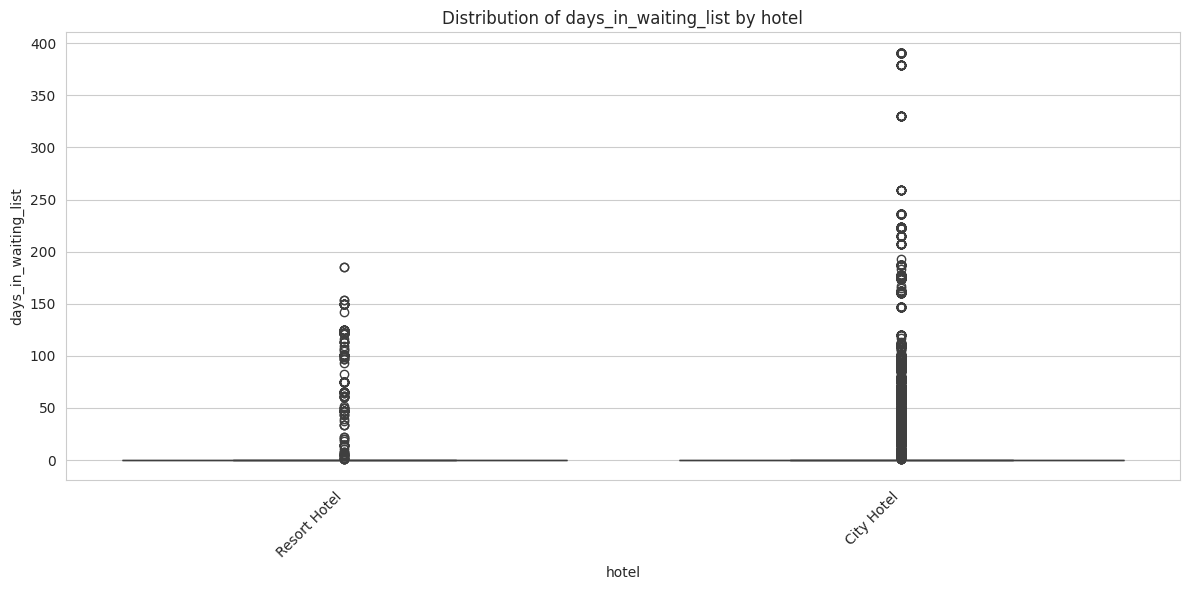

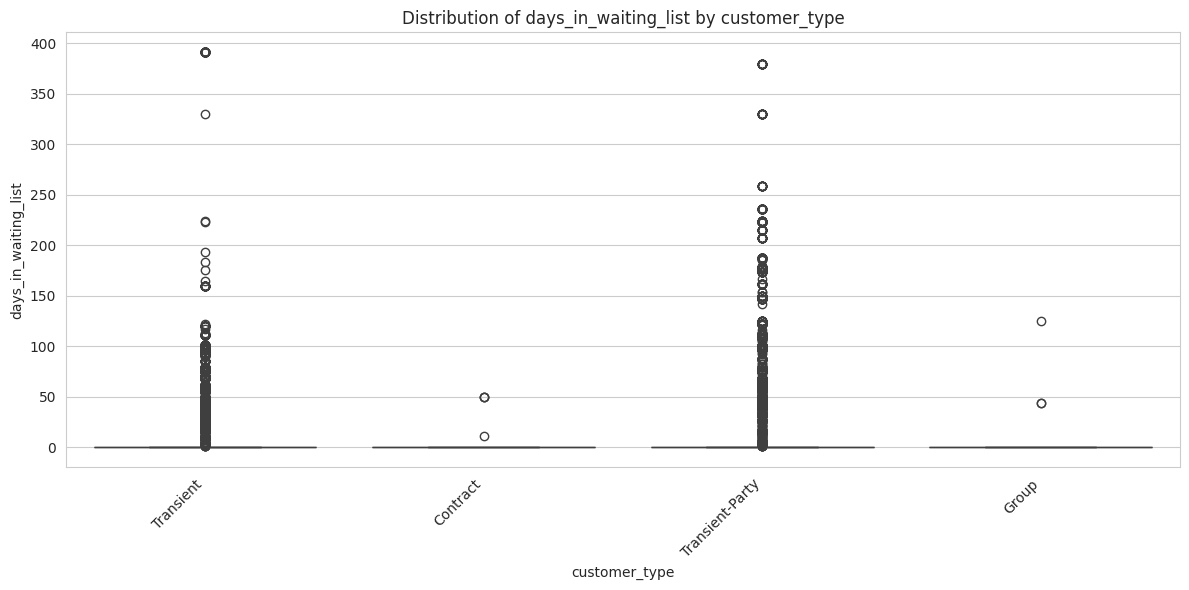

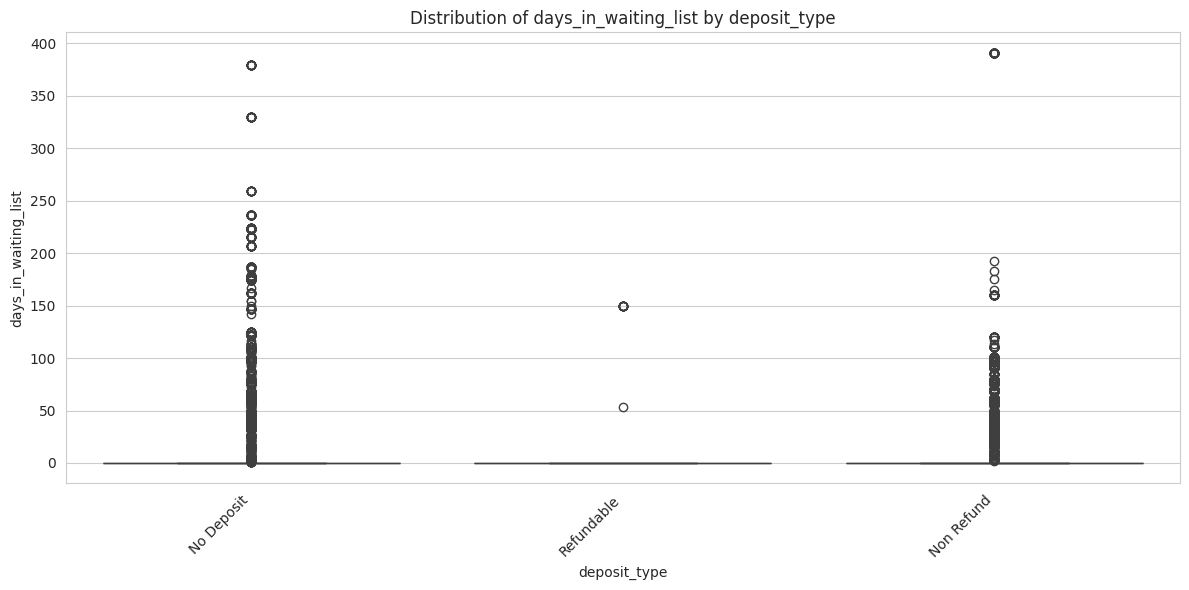

In [ ]:
# Select a few representative continuous and categorical columns
selected_continuous_cols = ['lead_time', 'adr', 'days_in_waiting_list']
selected_categorical_cols = ['hotel', 'customer_type', 'deposit_type']

# Iterate through selected continuous columns
for cont_col in selected_continuous_cols:
    # Iterate through selected categorical columns
    for cat_col in selected_categorical_cols:
        if cont_col in df.columns and cat_col in df.columns:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x=cat_col, y=cont_col)
            plt.title(f'Distribution of {cont_col} by {cat_col}')
            plt.xlabel(cat_col)
            plt.ylabel(cont_col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

## Categorical relationships




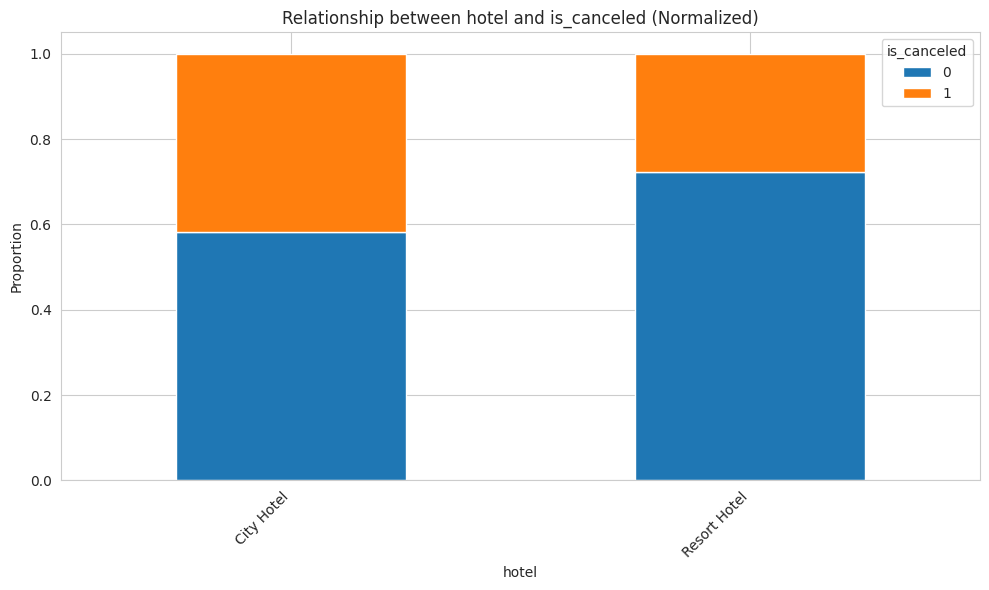

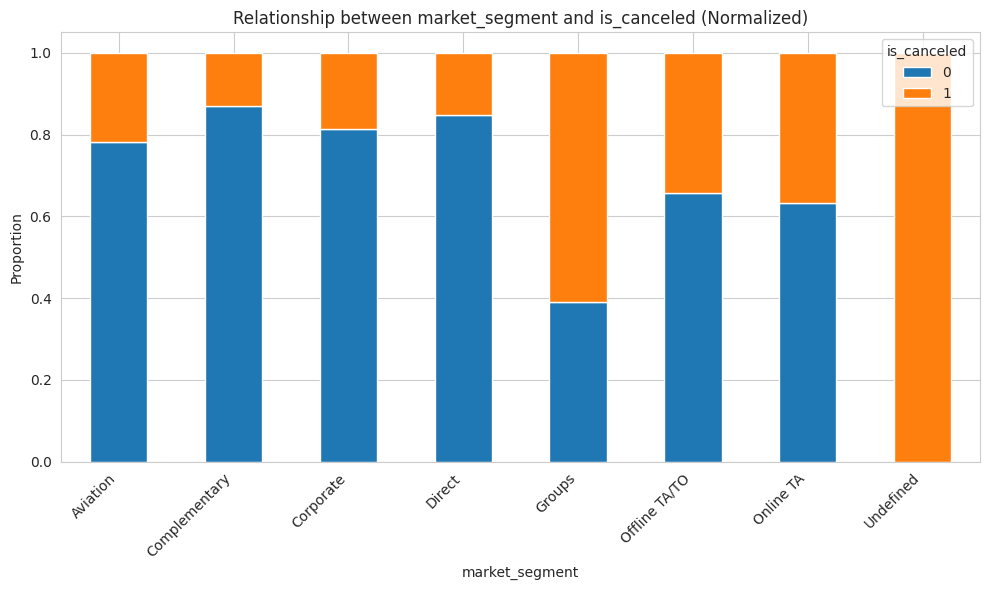

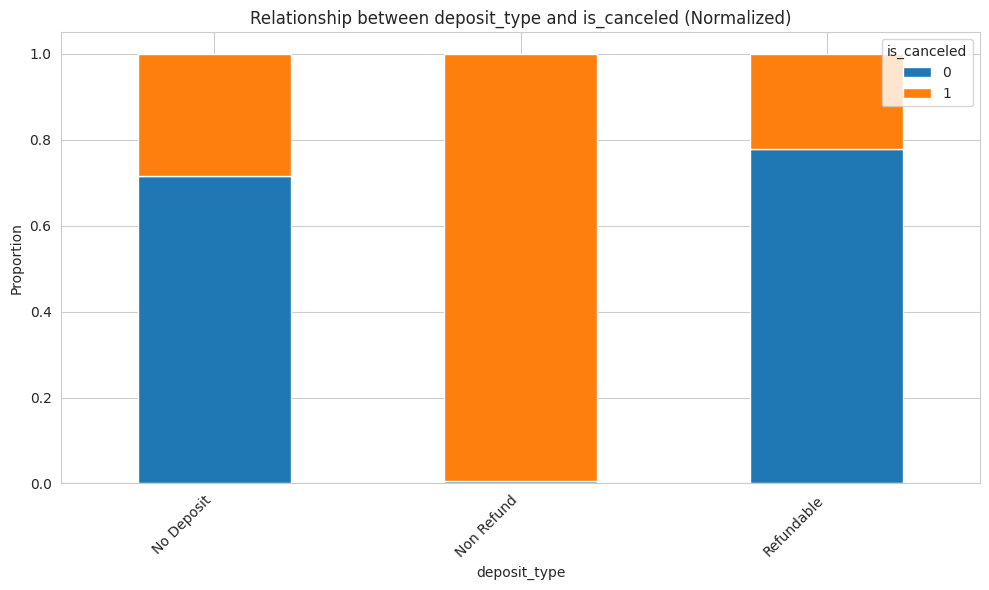

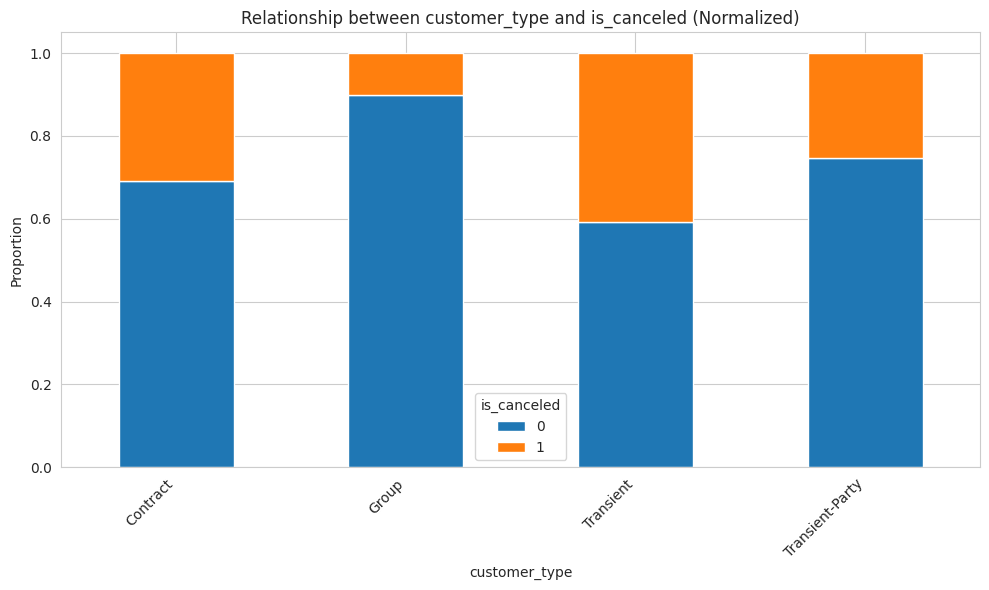

In [ ]:
# Select categorical columns to visualize relationships
selected_categorical_pairs = [
    ('hotel', 'is_canceled'),
    ('market_segment', 'is_canceled'),
    ('deposit_type', 'is_canceled'),
    ('customer_type', 'is_canceled')
]

for cat1, cat2 in selected_categorical_pairs:
    if cat1 in df.columns and cat2 in df.columns:
        # Create a cross-tabulation
        contingency_table = pd.crosstab(df[cat1], df[cat2])

        # Normalize the cross-tabulation by rows to show proportions
        normalized_contingency_table = contingency_table.apply(lambda r: r / r.sum(), axis=1)

        # Plot normalized stacked bar chart
        normalized_contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Relationship between {cat1} and {cat2} (Normalized)')
        plt.xlabel(cat1)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Target variable analysis (if 'is canceled' exists)



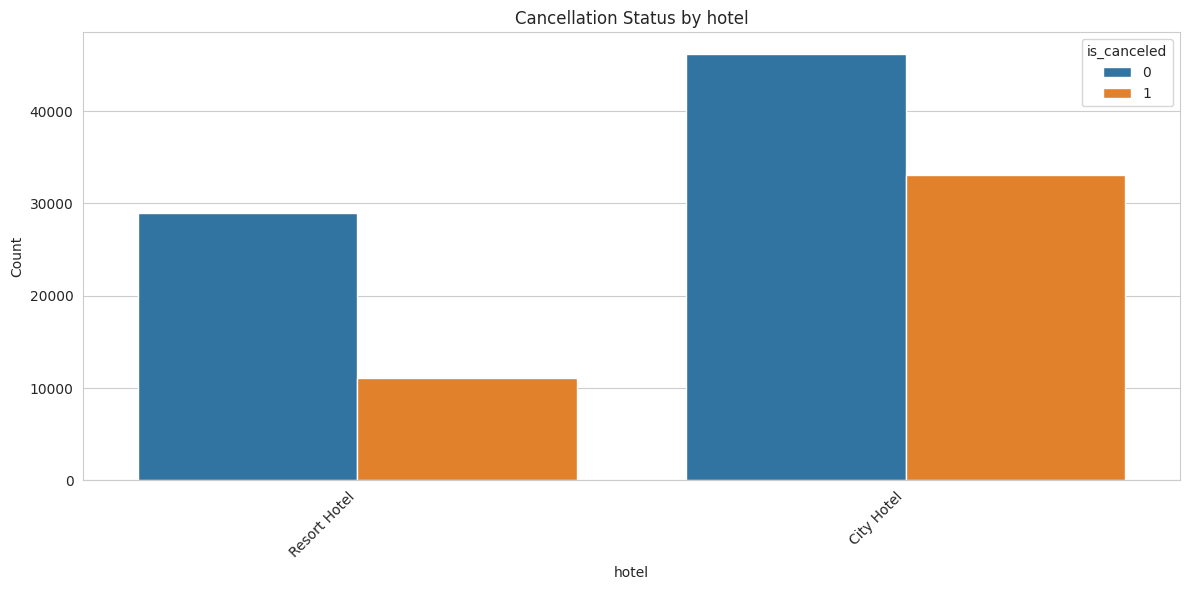

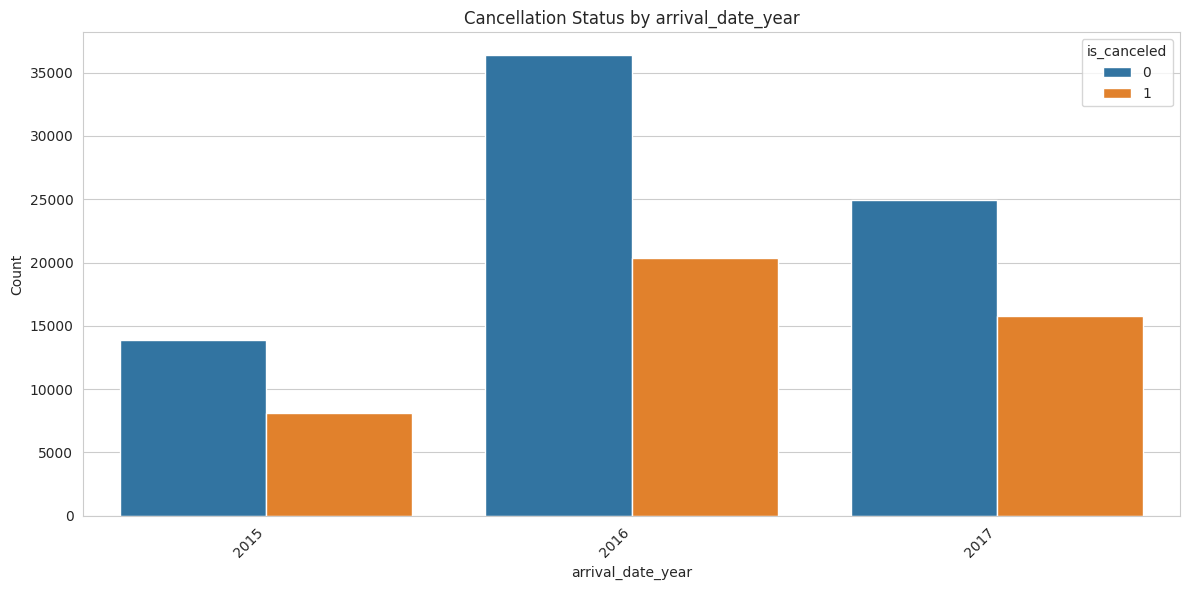

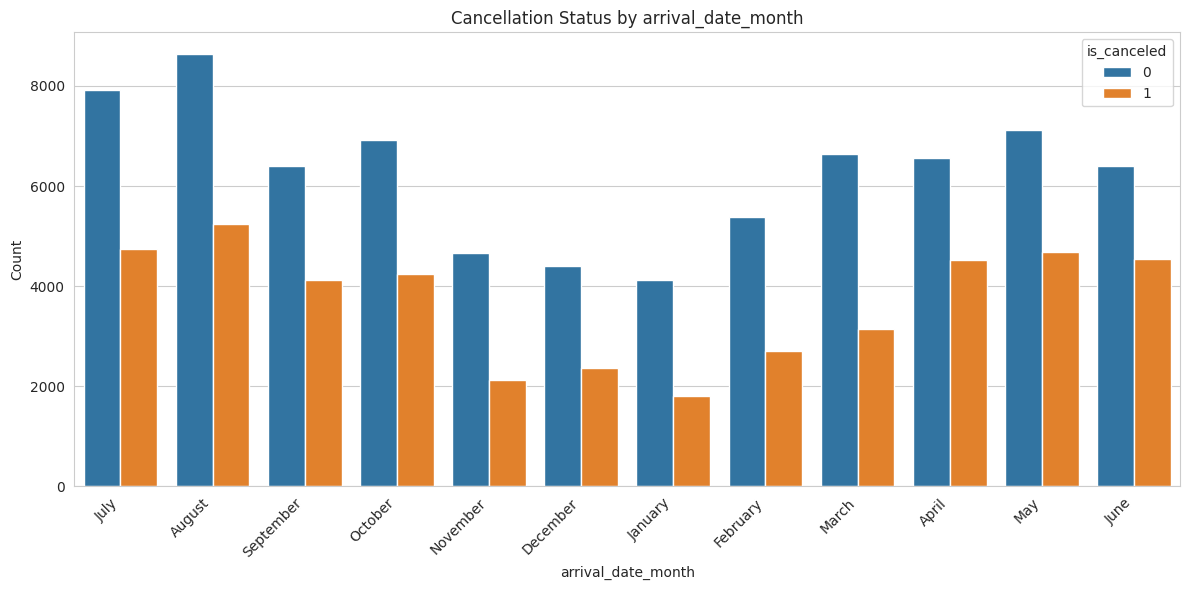

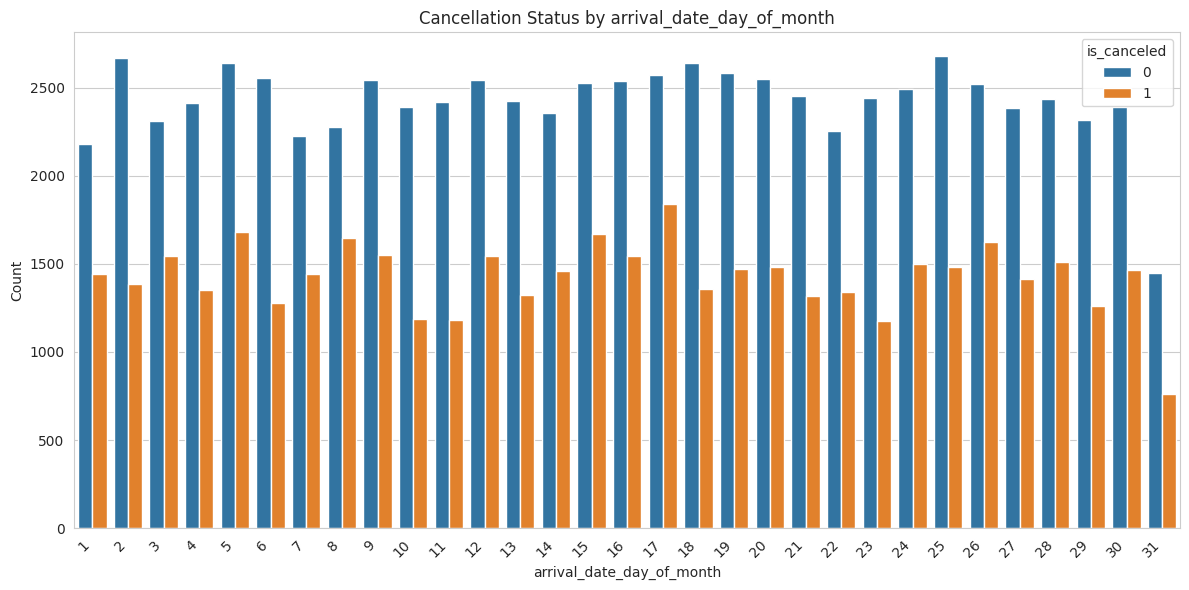

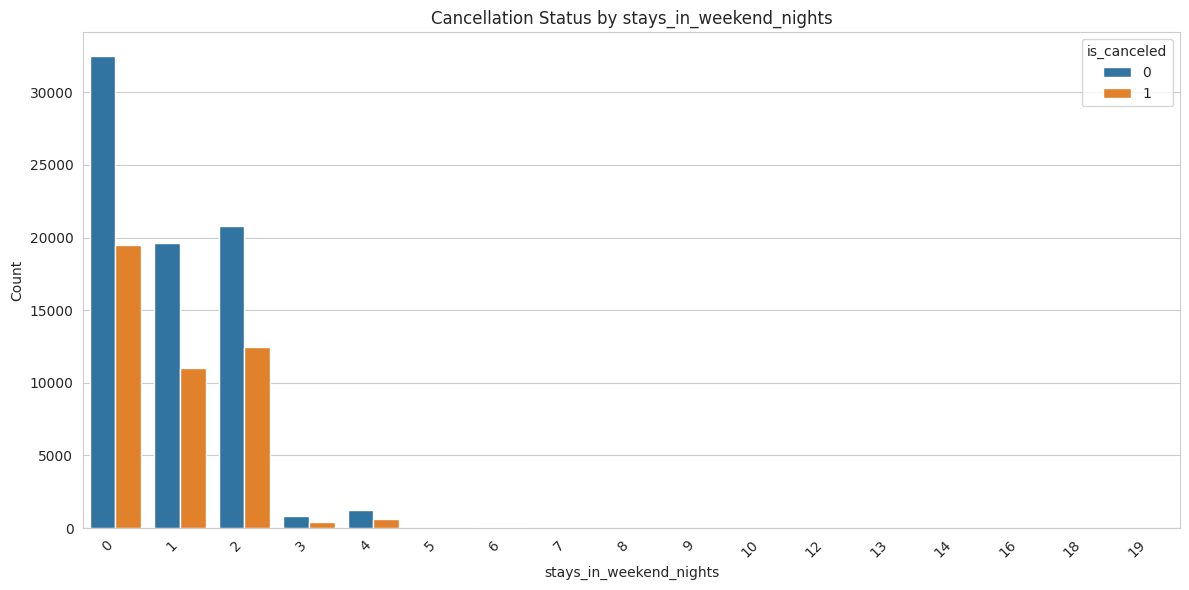

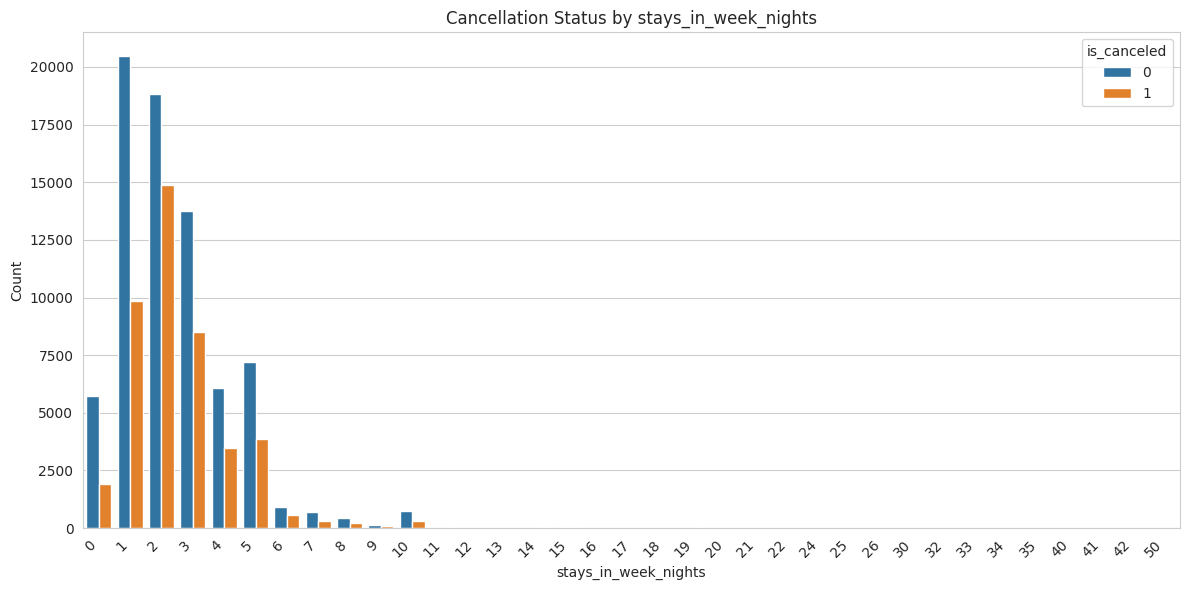

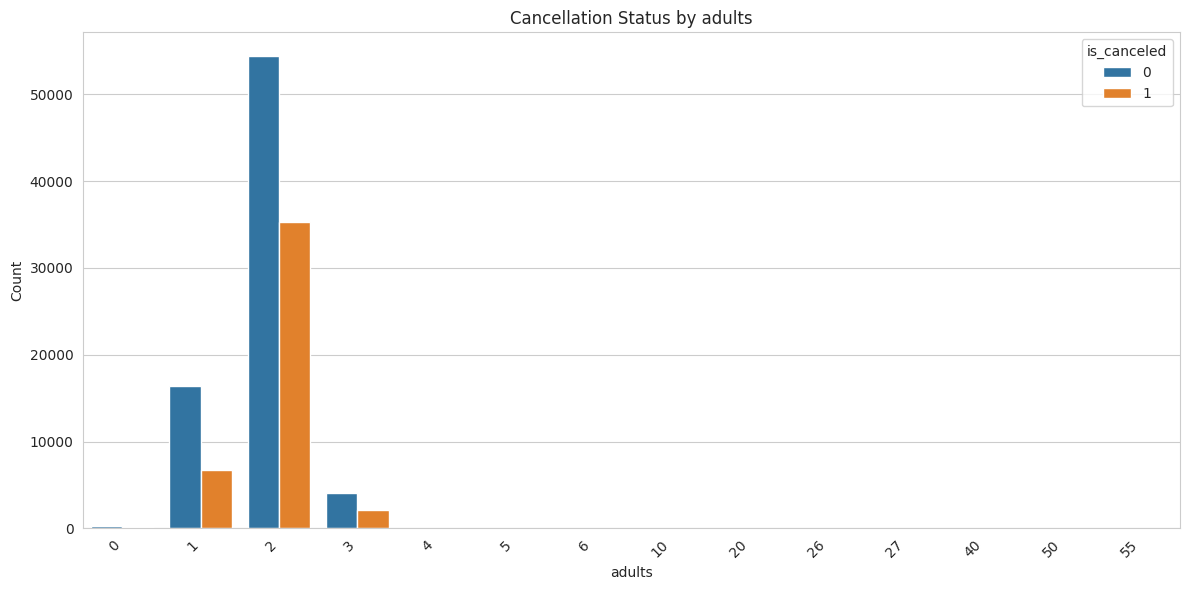

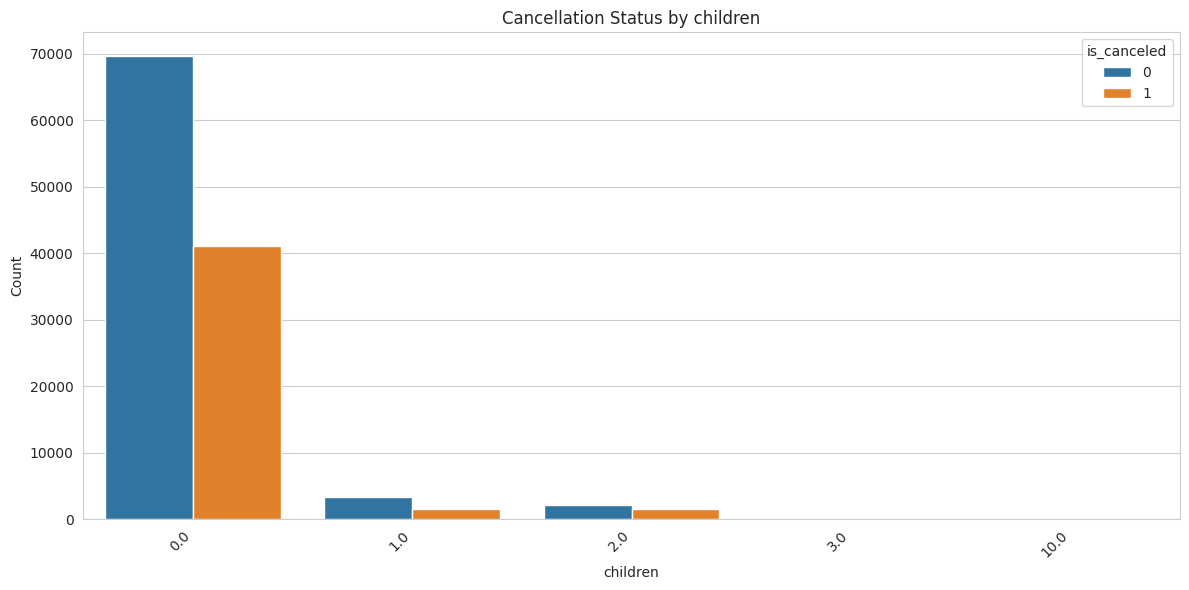

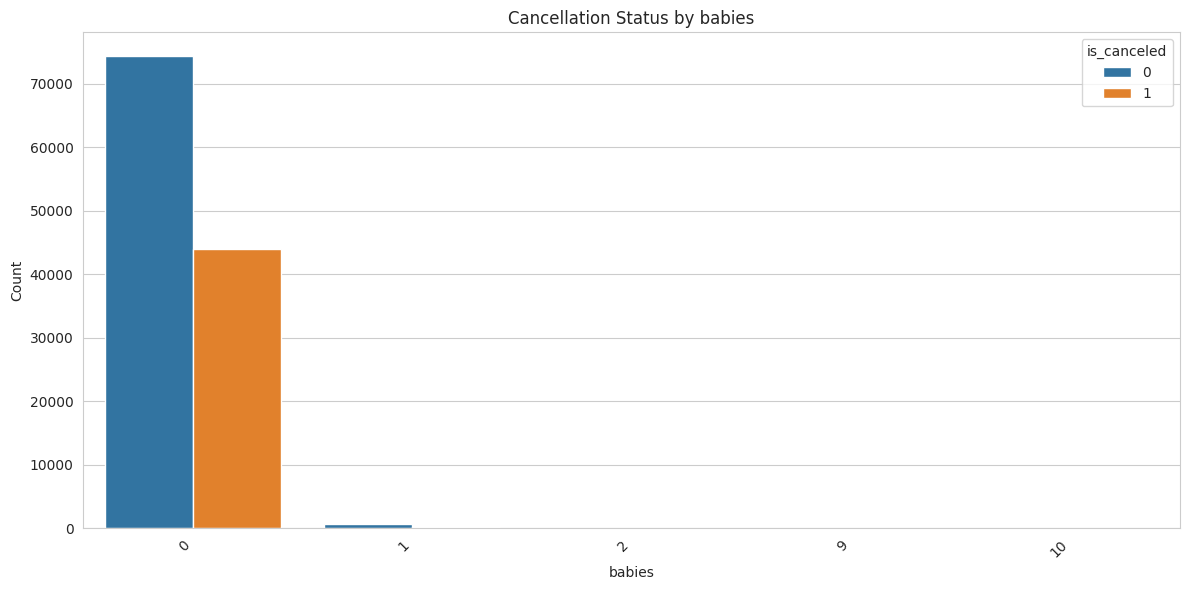

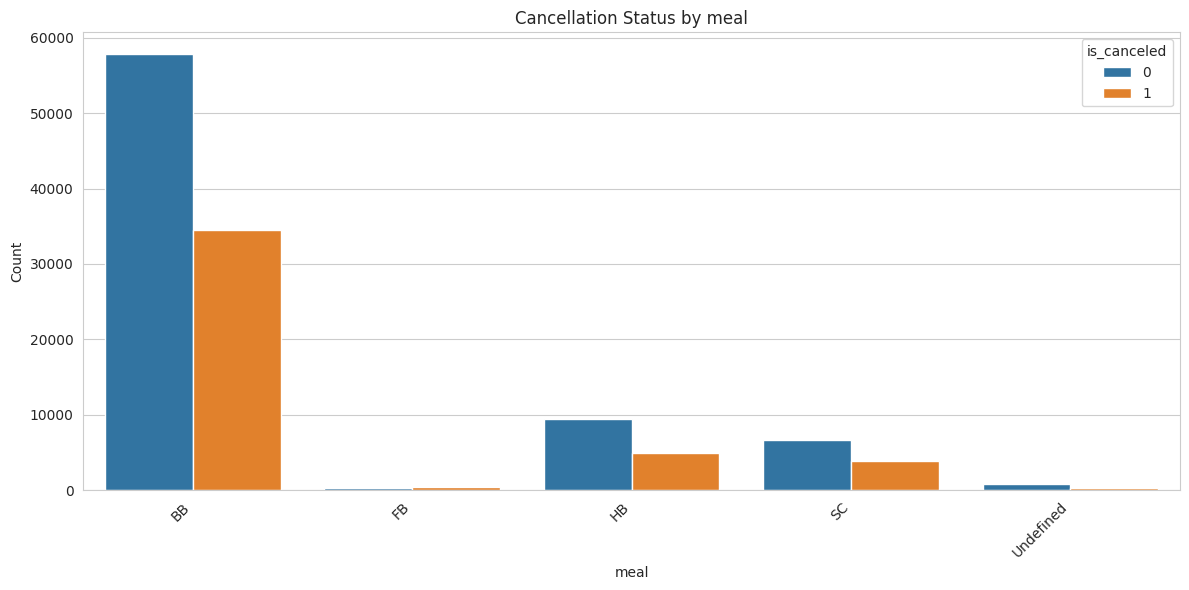

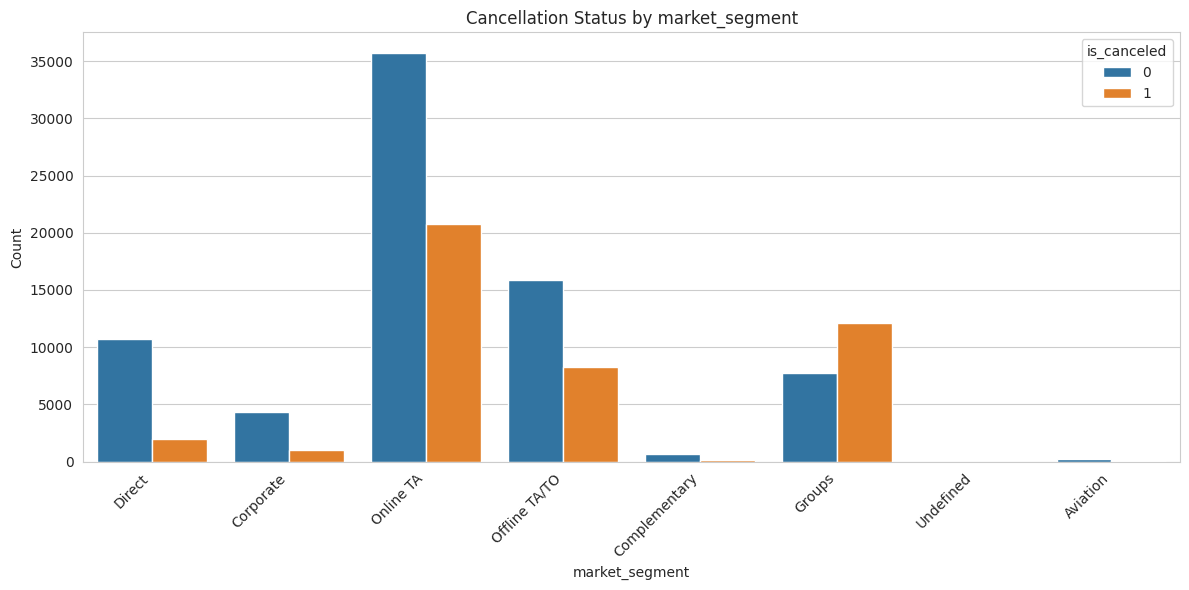

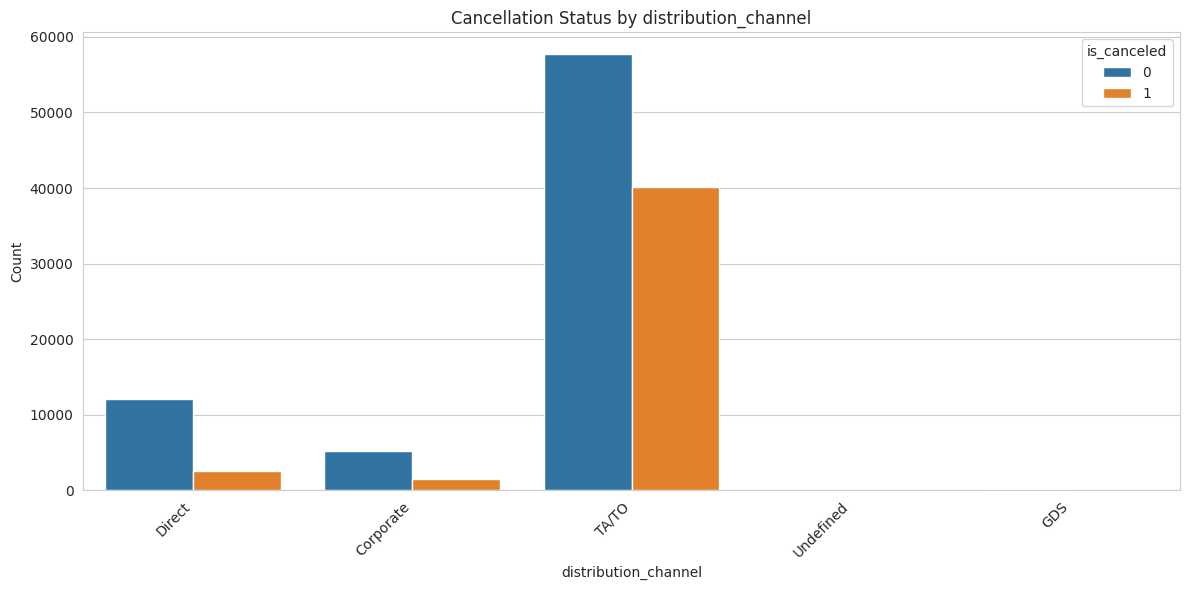

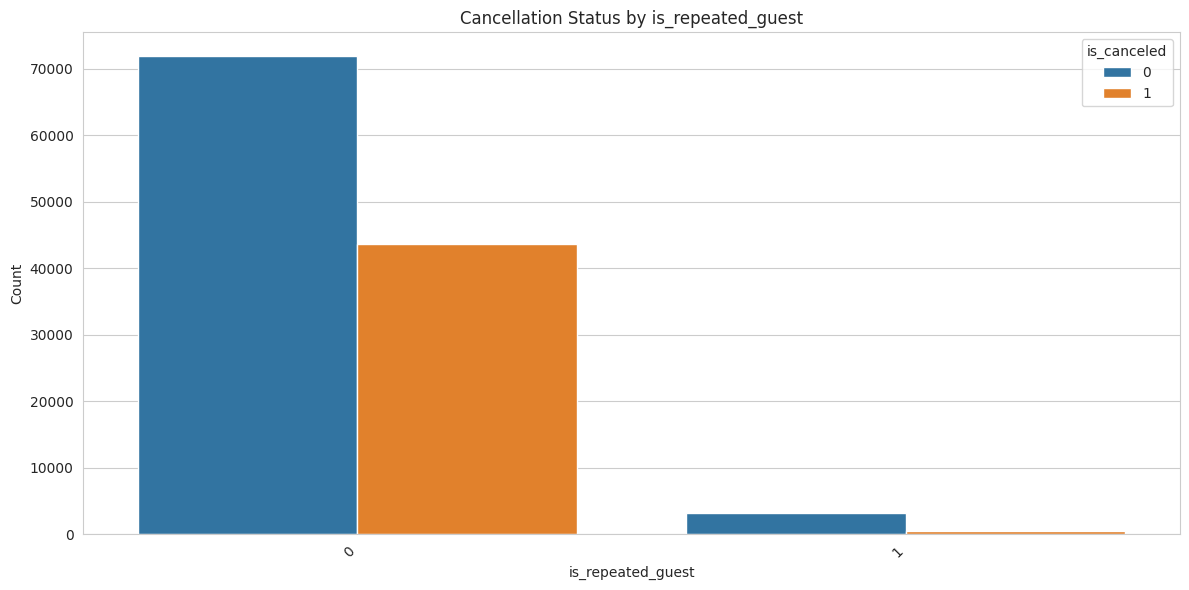

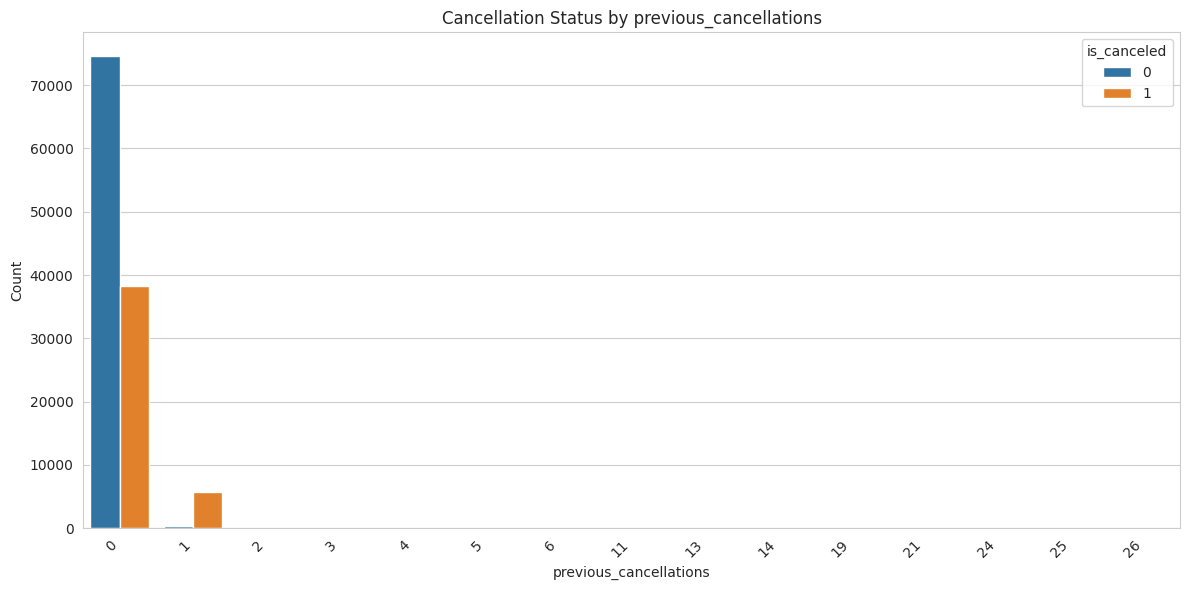

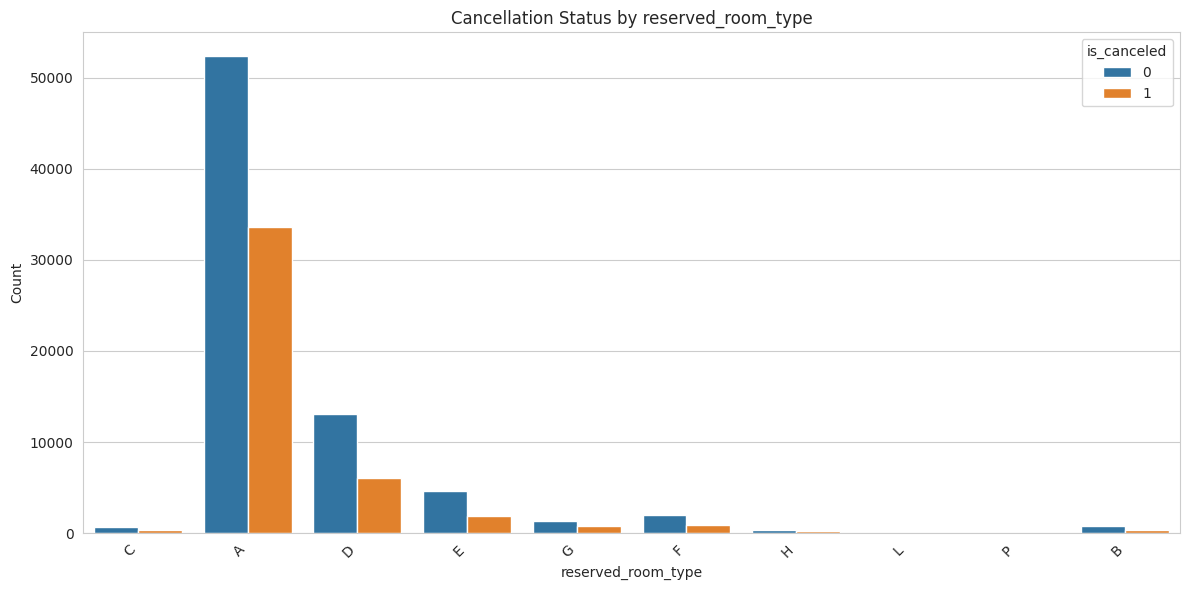

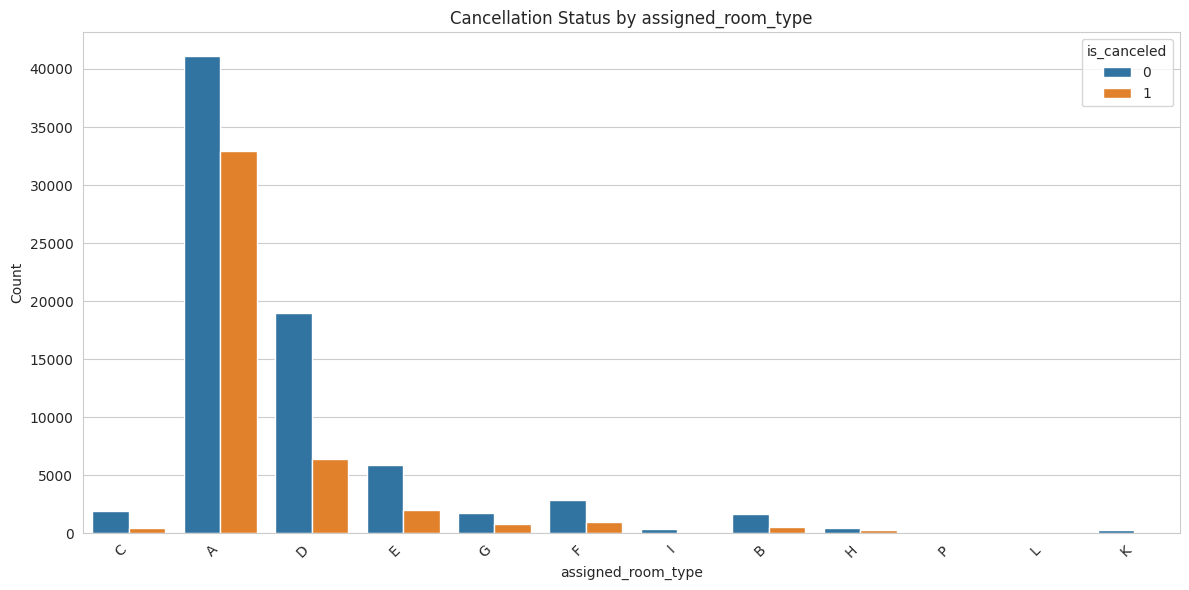

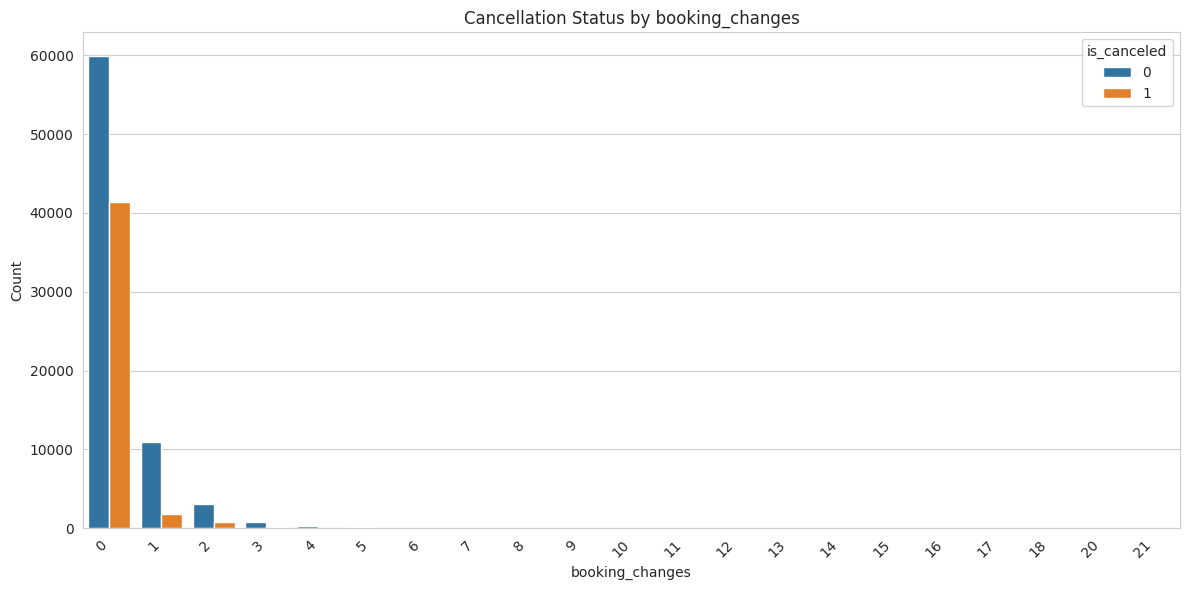

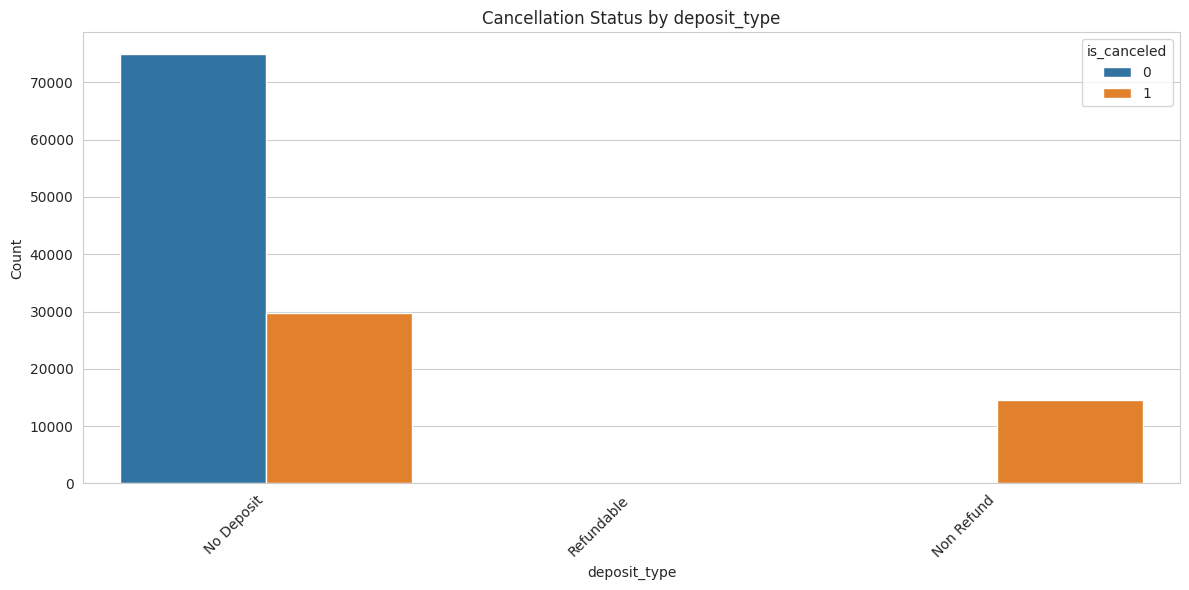

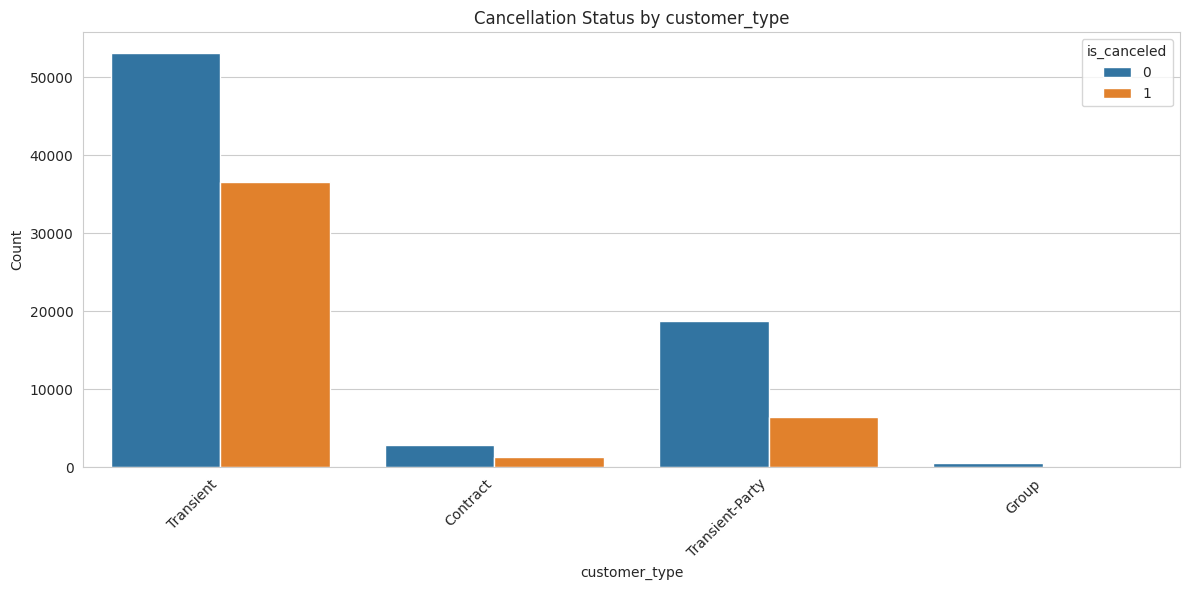

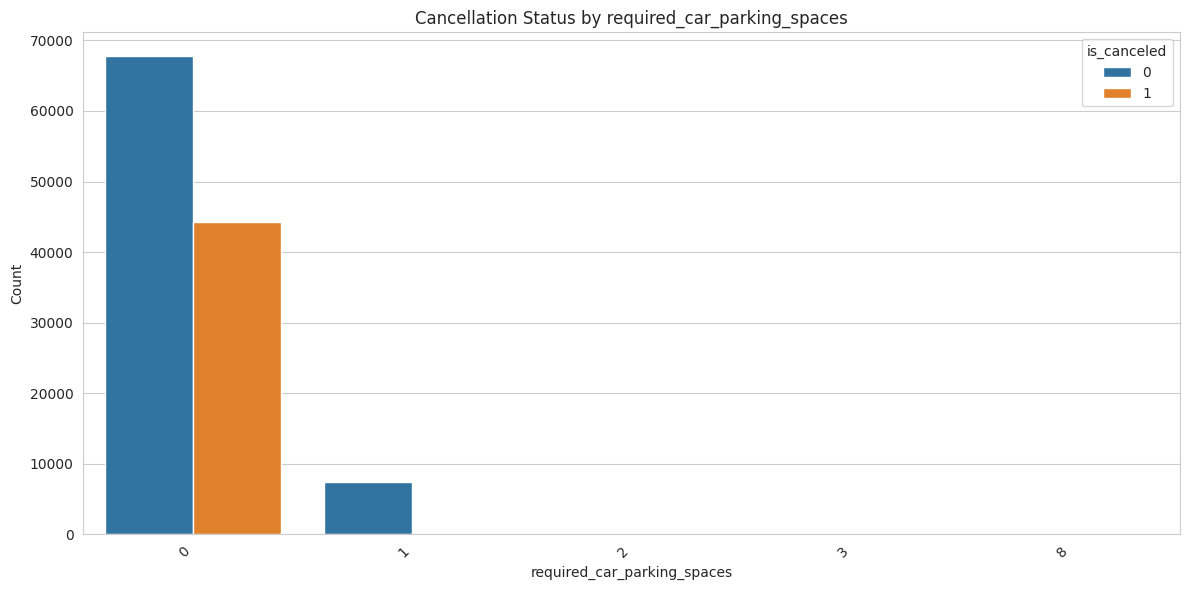

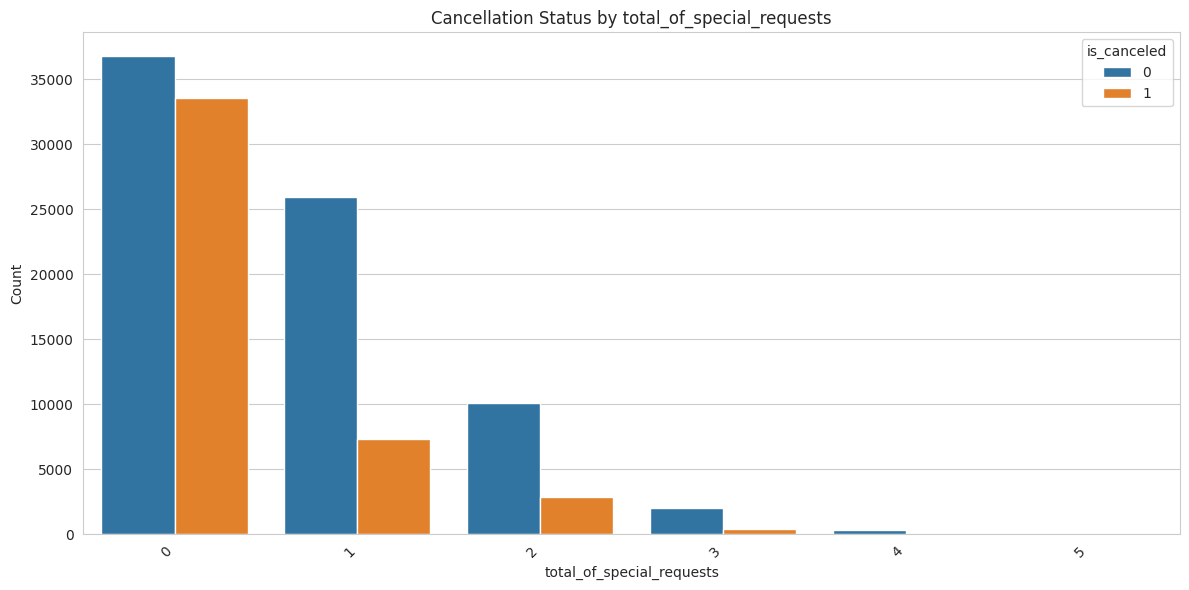

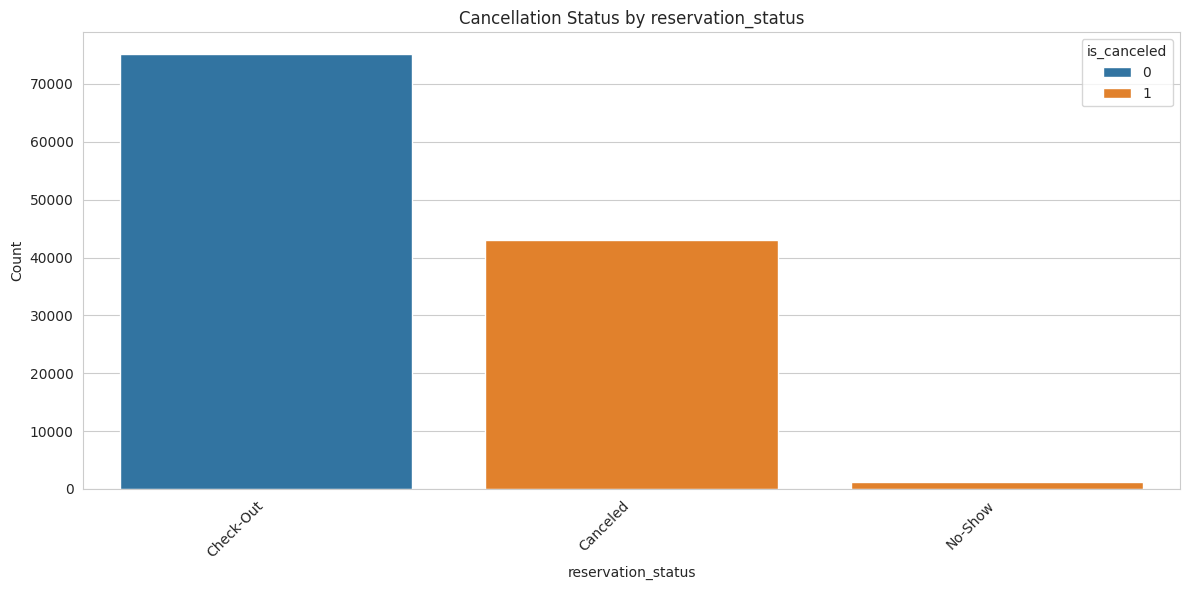

In [ ]:
for col in categorical_cols:
    if col != 'is_canceled':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=col, hue='is_canceled')
        plt.title(f'Cancellation Status by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Target variable analysis (if 'is canceled' exists)




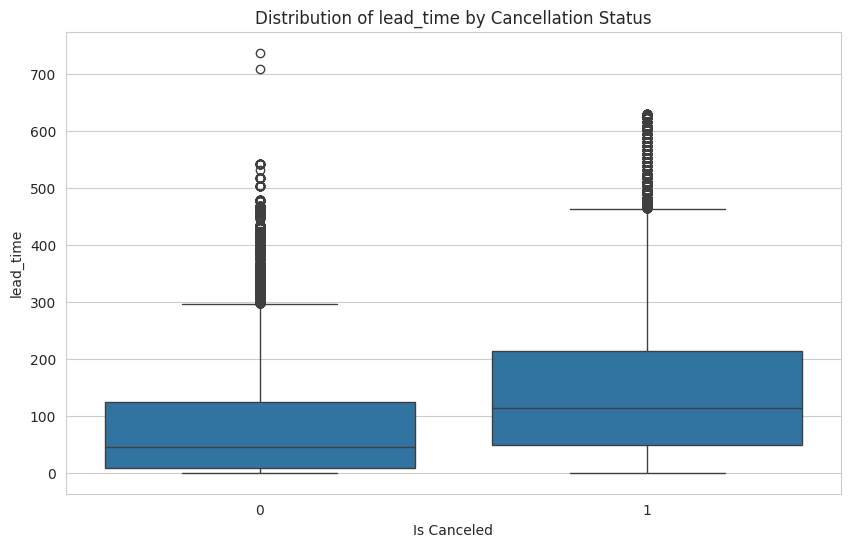

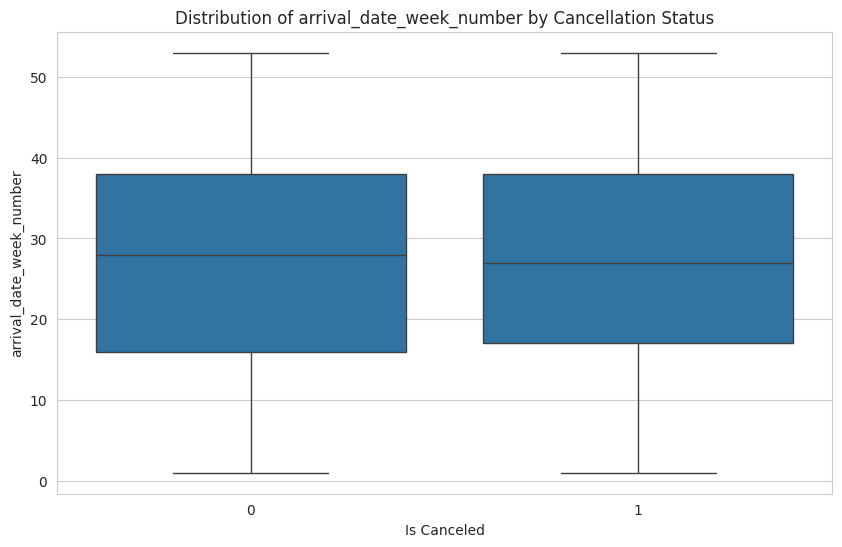

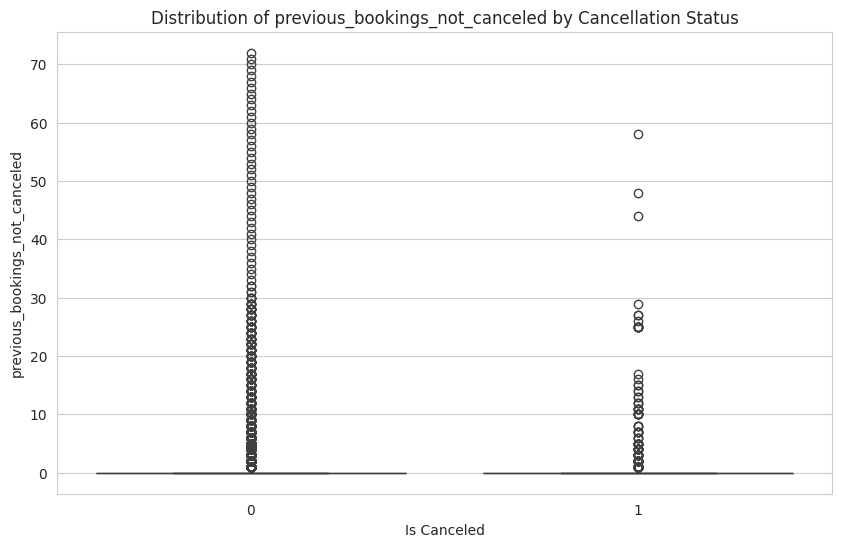

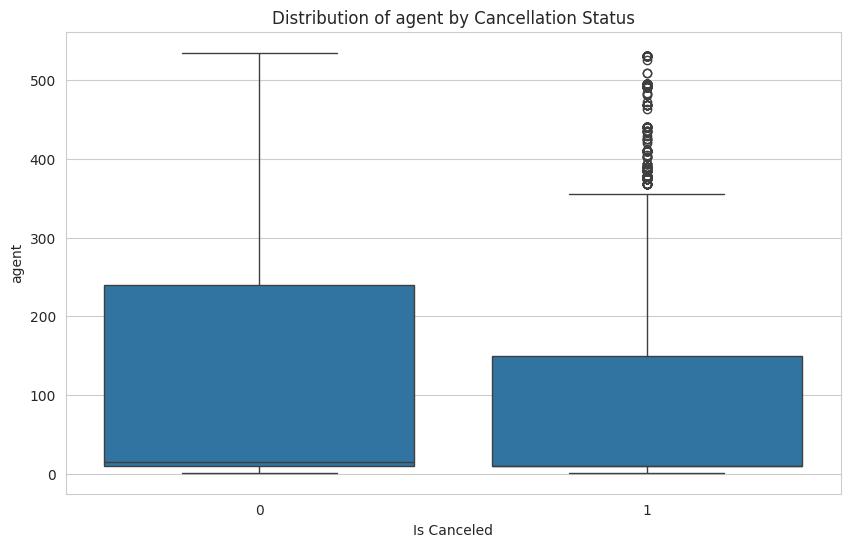

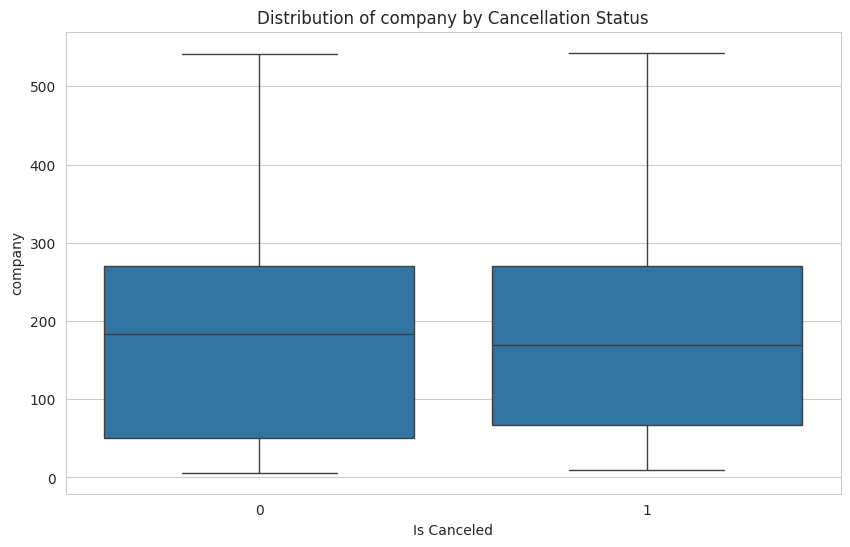

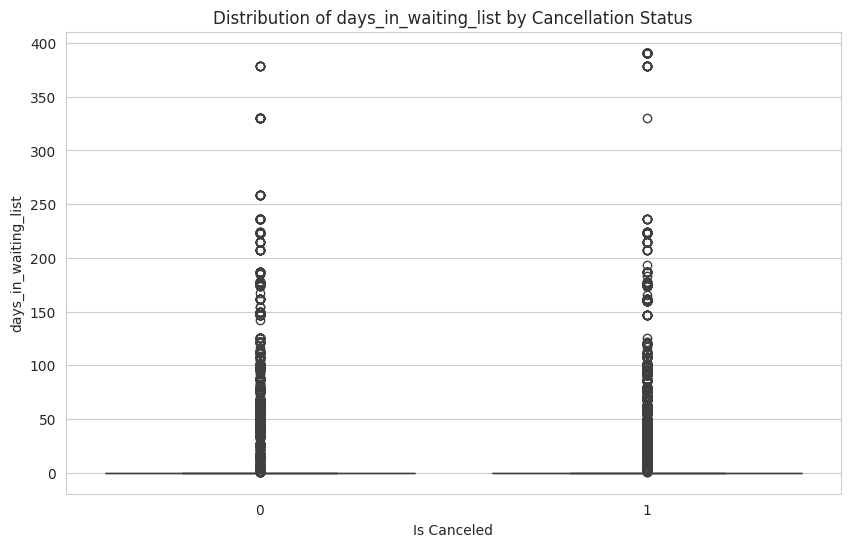

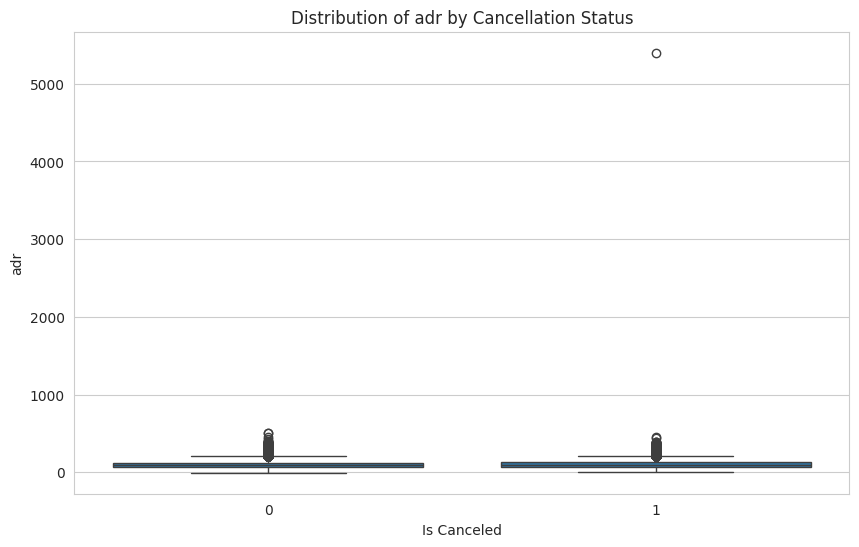

In [ ]:
for col in continuous_cols:
    # Exclude non-numeric columns and the target variable itself
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'is_canceled':
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='is_canceled', y=col)
        plt.title(f'Distribution of {col} by Cancellation Status')
        plt.xlabel('Is Canceled')
        plt.ylabel(col)
        plt.show()

## Target variable analysis (if 'is canceled' exists)



In [ ]:
from scipy.stats import chi2_contingency

print("Chi-square tests for Categorical Columns vs is_canceled:")
for col in categorical_cols:
    if col != 'is_canceled':
        contingency_table = pd.crosstab(df[col], df['is_canceled'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"- {col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")

Chi-square tests for Categorical Columns vs is_canceled:
- hotel: Chi2 = 2224.92, p-value = 0.0000
- arrival_date_year: Chi2 = 81.63, p-value = 0.0000
- arrival_date_month: Chi2 = 588.69, p-value = 0.0000
- arrival_date_day_of_month: Chi2 = 323.08, p-value = 0.0000
- stays_in_weekend_nights: Chi2 = 108.72, p-value = 0.0000
- stays_in_week_nights: Chi2 = 1702.47, p-value = 0.0000
- adults: Chi2 = 902.59, p-value = 0.0000
- children: Chi2 = 98.57, p-value = 0.0000
- babies: Chi2 = 140.94, p-value = 0.0000
- meal: Chi2 = 304.24, p-value = 0.0000
- market_segment: Chi2 = 8497.22, p-value = 0.0000
- distribution_channel: Chi2 = 3745.79, p-value = 0.0000
- is_repeated_guest: Chi2 = 857.41, p-value = 0.0000
- previous_cancellations: Chi2 = 9274.83, p-value = 0.0000
- reserved_room_type: Chi2 = 647.84, p-value = 0.0000
- assigned_room_type: Chi2 = 4918.69, p-value = 0.0000
- booking_changes: Chi2 = 4223.78, p-value = 0.0000
- deposit_type: Chi2 = 27677.33, p-value = 0.0000
- customer_type: Chi

## Target variable analysis (if 'is canceled' exists)


In [ ]:
from scipy.stats import f_oneway

print("ANOVA tests for Continuous Columns vs is_canceled:")
# Ensure the target variable is treated correctly for grouping
canceled_group = df[df['is_canceled'] == 1]
not_canceled_group = df[df['is_canceled'] == 0]

for col in continuous_cols:
    # Check if the column is numeric before performing ANOVA and is not the target variable
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'is_canceled':
        # Drop NaN values to avoid errors in ANOVA
        canceled_data = canceled_group[col].dropna()
        not_canceled_data = not_canceled_group[col].dropna()

        # Perform ANOVA only if both groups have data
        if len(canceled_data) > 0 and len(not_canceled_data) > 0:
            f_statistic, p_value = f_oneway(canceled_data, not_canceled_data)
            print(f"- {col}: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")
        else:
            print(f"- {col}: ANOVA skipped due to insufficient data in one or both groups.")

ANOVA tests for Continuous Columns vs is_canceled:
- lead_time: F-statistic = 11222.20, p-value = 0.0000
- arrival_date_week_number: F-statistic = 7.93, p-value = 0.0049
- previous_bookings_not_canceled: F-statistic = 394.07, p-value = 0.0000
- agent: F-statistic = 716.80, p-value = 0.0000
- company: F-statistic = 2.90, p-value = 0.0888
- days_in_waiting_list: F-statistic = 351.57, p-value = 0.0000
- adr: F-statistic = 270.62, p-value = 0.0000


## Summary:

### Data Analysis Key Findings

*   A strong positive correlation was observed between 'lead\_time' and 'days\_in\_waiting\_list' (0.40).
*   'total\_of\_special\_requests' has a moderate negative correlation with 'is\_canceled' (-0.23), suggesting bookings with more special requests are less likely to be canceled.
*   Box plots indicate that bookings with longer 'lead\_time' and those that spent time on the 'days\_in\_waiting\_list' appear to have a higher cancellation rate.
*   Box plots show distinct patterns in 'lead\_time' and 'adr' between 'Resort Hotel' and 'City Hotel', and variations based on 'customer\_type' and 'deposit\_type'.
*   Normalized bar charts reveal that 'Resort Hotel' seems to have a lower cancellation rate compared to 'City Hotel'.
*   Bookings with a non-refundable 'deposit\_type' have a significantly higher cancellation rate than those with no deposit or a refundable deposit.
*   'Transient' 'customer\_type' appears to have a higher cancellation rate than other customer types.
*   There are clear differences in cancellation rates across different 'country', 'market\_segment', and 'distribution\_channel' categories.
*   Chi-square tests for all tested categorical columns (excluding 'is\_canceled') resulted in p-values of 0.0000, indicating a statistically significant association with 'is\_canceled'.
*   ANOVA tests for 'lead\_time', 'arrival\_date\_week\_number', 'previous\_bookings\_not\_canceled', 'agent', 'days\_in\_waiting\_list', and 'adr' showed very low p-values (close to 0.0000), indicating a statistically significant difference in the means of these features between the canceled and not-canceled groups.
*   The 'company' column showed a higher ANOVA p-value (0.0888), suggesting a less significant relationship with 'is\_canceled' compared to other tested numeric features.

### Insights or Next Steps

*   Focus on high-impact features like 'deposit\_type', 'hotel', 'customer\_type', 'country', 'market\_segment', 'distribution\_channel', and 'lead\_time' for further modeling and strategy development to reduce cancellations.
*   Investigate the relationship between 'total\_of\_special\_requests' and cancellations further to understand if encouraging special requests could be a strategy to decrease cancellations.


## Immediate leakage removal




In [ ]:
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   assigned_room_type  booking_changes deposit_type  agent company  \
0                   C                3   No Deposit    NaN     NaN   
1                   C                4   No Deposit    NaN     NaN   
2                   C                0   No Deposit    NaN     NaN   
3                   A                0   No Deposit  304.0     NaN   
4                   A                0   No Deposit  240.0     NaN   

  days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                    0      Transient   0.0                            0   
1                    0      Transient   0.0                            0   
2                    0      Transient  75.0                            0   
3                    0      Transient  75.0                            0   
4                    0      Transient  98.0                            0   

  total_of_special_requests  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1  

[5 rows x 30 columns]

## Handle missing values (Company and Agent)



In [45]:
# Drop the 'company' column due to high missing percentage
df = df.drop('company', axis=1)

# Fill missing values in 'agent' with 0
df['agent'] = df['agent'].fillna(0)

print("Missing values after handling 'company' and 'agent':")
print(df[['agent']].isnull().sum())

Missing values after handling 'company' and 'agent':
agent    0
dtype: int64


## Handle missing values (Country)



In [ ]:
# Calculate the mode and its frequency
country_mode = df['country'].mode()[0]
country_mode_freq = df['country'].value_counts(normalize=True).max()

# Define a threshold for mode frequency
mode_freq_threshold = 0.40

if country_mode_freq >= mode_freq_threshold:
    # Fill missing values with the mode
    df['country'] = df['country'].fillna(country_mode)
    print(f"Missing values in 'country' filled with mode: {country_mode}")
else:
    # Option 1: Fill with 'Unknown'
    df['country'] = df['country'].fillna('Unknown')
    print("Missing values in 'country' filled with 'Unknown'")

    # Option 2: Group low-frequency countries (This is an alternative approach if you don't fill with 'Unknown')
    # For this example, we'll stick with filling with 'Unknown' based on the condition.
    # If you prefer grouping, you would add that logic here.

print("\nMissing values after handling 'country':")
print(df['country'].isnull().sum())

Missing values in 'country' filled with mode: PRT

Missing values after handling 'country':
0


## Handle missing values (Children)



In [ ]:
# Impute missing values in 'children' with the median
children_median = df['children'].median()
df['children'] = df['children'].fillna(children_median)

print("Missing values after handling 'children':")
print(df['children'].isnull().sum())

Missing values after handling 'children':
0


## Remove Duplicates



In [ ]:
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping = len(df)

print(f"Number of duplicate rows removed: {initial_rows - rows_after_dropping}")
print(f"Number of rows after removing duplicates: {rows_after_dropping}")

Number of duplicate rows removed: 32271
Number of rows after removing duplicates: 87119


## Parse and Fix Date Columns



In [ ]:
# Create a dictionary to map month names to numbers
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# Map month names to numbers
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_map)

# Create a combined date string
df['arrival_date_date'] = df['arrival_date_year'].astype(str) + '-' + \
                          df['arrival_date_month_num'].astype(str) + '-' + \
                          df['arrival_date_day_of_month'].astype(str)

# Convert to datetime object, coercing errors
df['arrival_date'] = pd.to_datetime(df['arrival_date_date'], errors='coerce')

# Drop the intermediate columns
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
              'arrival_date_month_num', 'arrival_date_date'], axis=1)

print("DataFrame after parsing date columns:")
display(df.head())

DataFrame after parsing date columns:


hotel  is_canceled  lead_time  arrival_date_week_number  \
0  Resort Hotel            0        342                        27   
1  Resort Hotel            0        737                        27   
2  Resort Hotel            0          7                        27   
3  Resort Hotel            0         13                        27   
4  Resort Hotel            0         14                        27   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal  ... booking_changes deposit_type  agent  company  \
0   BB  ...               3   No Deposit    0.0      0.0   
1   BB  ...               4   No Deposit    0.0      0.0   
2   BB  ...               0   No Deposit    0.0      0.0   
3   BB  ...               0   No Deposit  304.0      0.0   
4   BB  ...               0   No Deposit  240.0      0.0   

   days_in_waiting_list  customer_type   adr required_car_parking_spaces  \
0                     0      Transient   0.0                           0   
1                     0      Transient   0.0                           0   
2                     0      Transient  75.0                           0   
3                     0      Transient  75.0                           0   
4                     0      Transient  98.0                           0   

   total_of_special_requests arrival_date  
0                          0   2015-07-01  
1                          0   2015-07-01  
2                          0   2015-07-01  
3                          0   2015-07-01  
4                          1   2015-07-01  

[5 rows x 28 columns]

## Ensure Numeric Dtypes



In [ ]:
# Inspect current data types
print("Data types before numeric conversion:")
print(df.dtypes)


print("\nData types after checking numeric conversion:")
print(df.dtypes)

Data types before numeric conversion:
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_week_number                   int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                   

## Cap ADR Outliers



In [ ]:
print("Descriptive statistics of 'adr' before capping:")
display(df['adr'].describe())

# Cap the 'adr' column at 1000
df['adr'] = df['adr'].clip(upper=1000)

print("\nDescriptive statistics of 'adr' after capping at 1000:")
display(df['adr'].describe())


Descriptive statistics of 'adr' before capping:


count    87119.000000
mean       106.370389
std         55.035930
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


Descriptive statistics of 'adr' after capping at 1000:


count    87119.000000
mean       106.319883
std         52.119632
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       1000.000000
Name: adr, dtype: float64

## Validate and Fix Impossible Values

In [ ]:
# Check for negative values in relevant columns
impossible_values_check = df[['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']] < 0
print("Check for negative values in relevant columns:")
print(impossible_values_check.sum())

# Fix impossible values (replace negative values with 0)
cols_to_fix = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
for col in cols_to_fix:
    df[col] = df[col].apply(lambda x: x if x >= 0 else 0)

print("\nCheck for negative values after fixing:")
print((df[['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']] < 0).sum())

Check for negative values in relevant columns:
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
dtype: int64

Check for negative values after fixing:
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
dtype: int64


## Phase 3: Feature Engineering & Preprocessing


In [ ]:
# Create new features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] > 0) | (df['babies'] > 0)).astype(int)

print("DataFrame after creating new features:")
display(df[['total_guests', 'total_nights', 'is_family']].head())

DataFrame after creating new features:


total_guests  total_nights  is_family
0           2.0             0          0
1           2.0             0          0
2           1.0             1          0
3           1.0             1          0
4           2.0             2          0

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Handle high-cardinality 'country' column by grouping infrequent categories
country_counts = df['country'].value_counts()
# Choose a threshold for infrequent countries (e.g., less than 1% of the data)
country_threshold = len(df) * 0.01
infrequent_countries = country_counts[country_counts < country_threshold].index.tolist()
df['country'] = df['country'].replace(infrequent_countries, 'Other')

# Apply One-Hot Encoding to all remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

print("DataFrame after encoding categorical variables:")
display(df.head())

DataFrame after encoding categorical variables:


is_canceled  lead_time  arrival_date_week_number  stays_in_weekend_nights  \
0            0        342                        27                        0   
1            0        737                        27                        0   
2            0          7                        27                        0   
3            0         13                        27                        0   
4            0         14                        27                        0   

   stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                     0       2       0.0       0                  0   
1                     0       2       0.0       0                  0   
2                     1       1       0.0       0                  0   
3                     1       1       0.0       0                  0   
4                     2       2       0.0       0                  0   

   previous_cancellations  ...  assigned_room_type_K  assigned_room_type_L  \
0                       0  ...                 False                 False   
1                       0  ...                 False                 False   
2                       0  ...                 False                 False   
3                       0  ...                 False                 False   
4                       0  ...                 False                 False   

   assigned_room_type_P  deposit_type_No Deposit  deposit_type_Non Refund  \
0                 False                     True                    False   
1                 False                     True                    False   
2                 False                     True                    False   
3                 False                     True                    False   
4                 False                     True                    False   

   deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
0                    False                   False                False   
1                    False                   False                False   
2                    False                   False                False   
3                    False                   False                False   
4                    False                   False                False   

  customer_type_Transient  customer_type_Transient-Party  
0                    True                          False  
1                    True                          False  
2                    True                          False  
3                    True                          False  
4                    True                          False  

[5 rows x 86 columns]

In [ ]:
# Remove data leakage columns
df = df.drop(['reservation_status', 'reservation_status_date'], axis=1, errors='ignore')

print("DataFrame after removing data leakage columns:")
display(df.head())

DataFrame after removing data leakage columns:


is_canceled  lead_time  arrival_date_week_number  stays_in_weekend_nights  \
0            0        342                        27                        0   
1            0        737                        27                        0   
2            0          7                        27                        0   
3            0         13                        27                        0   
4            0         14                        27                        0   

   stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                     0       2       0.0       0                  0   
1                     0       2       0.0       0                  0   
2                     1       1       0.0       0                  0   
3                     1       1       0.0       0                  0   
4                     2       2       0.0       0                  0   

   previous_cancellations  ...  assigned_room_type_K  assigned_room_type_L  \
0                       0  ...                 False                 False   
1                       0  ...                 False                 False   
2                       0  ...                 False                 False   
3                       0  ...                 False                 False   
4                       0  ...                 False                 False   

   assigned_room_type_P  deposit_type_No Deposit  deposit_type_Non Refund  \
0                 False                     True                    False   
1                 False                     True                    False   
2                 False                     True                    False   
3                 False                     True                    False   
4                 False                     True                    False   

   deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
0                    False                   False                False   
1                    False                   False                False   
2                    False                   False                False   
3                    False                   False                False   
4                    False                   False                False   

  customer_type_Transient  customer_type_Transient-Party  
0                    True                          False  
1                    True                          False  
2                    True                          False  
3                    True                          False  
4                    True                          False  

[5 rows x 86 columns]


## Split the dataset into training and testing sets.

In [44]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (69695, 85)
y_train: (69695,)

Testing set shapes:
X_test: (17424, 85)
y_test: (17424,)
